---

<h2>DETECCIÓN DE DESPLAZAMIENTOS ANÓMALOS MEDIANTE REDES NEURONALES USANDO TRANSFER LEARNING

Alex Chaume García</h2>

---

### 1. IMPORTACIÓN DE LIBRERÍAS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import pickle

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score,roc_curve,auc
import seaborn as sns
from sklearn.metrics import precision_recall_curve, f1_score, average_precision_score

from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input, TimeDistributed, GRU,Flatten, Dense, LSTM, GlobalAveragePooling2D, Dropout
from sklearn.metrics import auc as sklearn_auc

# Generadores de datos
from tensorflow.keras.utils import Sequence
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os

# Salida de los chunks
from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')

#Limpieza de mempria de GPU
import gc
from numba import cuda

# Anomalib
from typing import Any

import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from torchvision.transforms import ToPILImage

Liberar memoria GPU

In [64]:
# Llamar al recolector de basura de Python

gc.collect()

# Liberar memoria GPU (si estás usando GPU)
cuda.select_device(0)
cuda.close()

# Reiniciar la sesión de TensorFlow
tf.keras.backend.clear_session()

### 2. CARGA DE IMAGENES



#### 2.1 Creación de carpeta de datos

Cargarlo desde google collab

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!unzip /content/drive/MyDrive/datos_listos.zip

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: datos_listos/train/anomalas_laboral/El_Valle_de_Cofrentes-Ayora_2023-11-09T05_00_00.png  
  inflating: datos_listos/train/anomalas_laboral/El_Valle_de_Cofrentes-Ayora_2023-11-09T06_00_00.png  
  inflating: datos_listos/train/anomalas_laboral/El_Valle_de_Cofrentes-Ayora_2023-11-09T08_00_00.png  
  inflating: datos_listos/train/anomalas_laboral/El_Valle_de_Cofrentes-Ayora_2023-11-09T09_00_00.png  
  inflating: datos_listos/train/anomalas_laboral/El_Valle_de_Cofrentes-Ayora_2023-11-10T04_00_00.png  
  inflating: datos_listos/train/anomalas_laboral/El_Valle_de_Cofrentes-Ayora_2023-11-10T05_00_00.png  
  inflating: datos_listos/train/anomalas_laboral/El_Valle_de_Cofrentes-Ayora_2023-11-10T15_00_00.png  
  inflating: datos_listos/train/anomalas_laboral/El_Valle_de_Cofrentes-Ayora_2023-11-10T17_00_00.png  
  inflating: datos_listos/train/anomalas_laboral/El_Valle_de_Cofrentes-Ayora_2023-11-10T19_00_00.png  
  inflating:

Crearlo desde zero

In [10]:
# Cargamos los mapas de las 4 clases:

# Imágenes de la clase anomalas rural:
anomalias_rural_noviembre = os.listdir('mapas/datos_noviembre/anomalas_rural')
anomalias_rural_noviembre = [f'mapas/datos_noviembre/anomalas_rural/{x}' for x in anomalias_rural_noviembre]

# Imágenes de la clase anomalas laboral:
anomalias_laboral_noviembre = os.listdir('mapas/datos_noviembre/anomalas_laboral')
anomalias_laboral_noviembre = [f'mapas/datos_noviembre/anomalas_laboral/{x}' for x in anomalias_laboral_noviembre]

# Imágenes de la clase anomalas tiempo:
anomalias_tiempo_noviembre = os.listdir('mapas/datos_noviembre/anomalas_tiempo')
anomalias_tiempo_noviembre = [f'anomalas_tiempo/{x}' for x in anomalias_tiempo_noviembre]

# Imágenes de la clase normal:
normales_noviembre = os.listdir('mapas/datos_noviembre/normales')
normales_noviembre = [f'mapas/datos_noviembre/normales/{x}' for x in normales_noviembre]

In [4]:
# Imágenes de la clase anomalas rural:
anomalias_rural_diciembre_sem1 = os.listdir('mapas/datos_diciembre/anomalas/anomalas_rural')
anomalias_rural_diciembre_sem1 = [f'mapas/datos_diciembre/anomalas/anomalas_rural/{x}' for x in anomalias_rural_diciembre_sem1]

# Imágenes de la clase anomalas laboral:
anomalias_laboral_diciembre_sem1 = os.listdir('mapas/datos_diciembre/anomalas/anomalas_laboral')
anomalias_laboral_diciembre_sem1 = [f'mapas/datos_diciembre/anomalas/anomalas_laboral/{x}' for x in anomalias_laboral_diciembre_sem1]

# Imágenes de la clase anomalas tiempo:
anomalias_tiempo_diciembre_sem1 = os.listdir('mapas/datos_diciembre_v2/anomalas_tiempo')
anomalias_tiempo_diciembre_sem1 = [f'datos_diciembre/anomalas_tiempo/{x}' for x in anomalias_tiempo_diciembre_sem1]

# Imágenes de la clase normal:
normales_diciembre_sem1 = os.listdir('mapas/datos_diciembre/normales')
normales_diciembre_sem1 = [f'mapas/datos_diciembre/normales/{x}' for x in normales_diciembre_sem1]

In [5]:
# Imágenes de la clase anomalas rural:
anomalias_rural_diciembre_sem2 = os.listdir('mapas/datos_diciembre_v2/anomalas_rural')
anomalias_rural_diciembre_sem2 = [f'mapas/datos_diciembre_v2/anomalas_rural/{x}' for x in anomalias_rural_diciembre_sem2]

# Imágenes de la clase anomalas laboral:
anomalias_laboral_diciembre_sem2 = os.listdir('mapas/datos_diciembre_v2/anomalas_laboral')
anomalias_laboral_diciembre_sem2 = [f'mapas/datos_diciembre_v2/anomalas_laboral/{x}' for x in anomalias_laboral_diciembre_sem2]

# Imágenes de la clase anomalas tiempo:
anomalias_tiempo_diciembre_sem2 = os.listdir('mapas/datos_diciembre_v2/anomalas_tiempo')
anomalias_tiempo_diciembre_sem2 = [f'datos_diciembre/anomalas_tiempo/{x}' for x in anomalias_tiempo_diciembre_sem2]

# Imágenes de la clase normal:
normales_diciembre_sem2 = os.listdir('mapas/datos_diciembre_v2/normales')
normales_diciembre_sem2 = [f'mapas/datos_diciembre_v2/normales/{x}' for x in normales_diciembre_sem2]

In [11]:
#Unimos las de diciembre y las de noviembre

anomalias_rural = anomalias_laboral_noviembre #+ anomalias_rural_diciembre_sem1 + anomalias_rural_diciembre_sem2
anomalias_laboral = anomalias_laboral_noviembre #+ anomalias_laboral_diciembre_sem1 + anomalias_laboral_diciembre_sem2
anomalias_tiempo = anomalias_tiempo_noviembre #+ anomalias_tiempo_diciembre_sem1 + anomalias_tiempo_diciembre_sem2
normales = normales_noviembre #+ normales_diciembre_sem1 +  normales_diciembre_sem2

In [12]:
print("Número de mapas de desplazamientos anómalos rurales: ",len(anomalias_rural))
print("Número de mapas de desplazamientos anómalos laborales: ",len(anomalias_laboral))
print("Número de mapas de desplazamientos anómalos temporales: ",len(anomalias_tiempo))
print("Número de mapas de desplazamientos normales: ",len(normales))

Número de mapas de desplazamientos anómalos rurales:  1302
Número de mapas de desplazamientos anómalos laborales:  1302
Número de mapas de desplazamientos anómalos temporales:  1760
Número de mapas de desplazamientos normales:  2327


Separamos en train y validación y test:


In [13]:
# Separamos en train validacioón y test:

# Anómalas tiempo
train_anomalas_tiempo, val_test_anomalas_tiempo = train_test_split(anomalias_tiempo, test_size=0.3, random_state=42)
val_anomalas_tiempo, test_anomalas_tiempo = train_test_split(val_test_anomalas_tiempo, test_size=0.5, random_state=42)

# Anómalas laboral
train_anomalas_laboral, val_test_anomalas_laboral = train_test_split(anomalias_laboral, test_size=0.3, random_state=42)
val_anomalas_laboral, test_anomalas_laboral = train_test_split(val_test_anomalas_laboral, test_size=0.5, random_state=42)

# Anómalas rural
train_anomalas_rural, val_test_anomalas_rural = train_test_split(anomalias_rural, test_size=0.3, random_state=42)
val_anomalas_rural, test_anomalas_rural = train_test_split(val_test_anomalas_rural, test_size=0.5, random_state=42)

# Normales
train_normales, val_test_normales = train_test_split(normales, test_size=0.3, random_state=42)
val_normales, test_normales = train_test_split(val_test_normales, test_size=0.5, random_state=42)

print("-" * 50)
print("Número de mapas de desplazamientos anomalos rurales")
print(f"---------> Train: {len(train_anomalas_rural)}")
print(f"---------> Validación: {len(val_anomalas_rural)}")
print(f"---------> Test: {len(test_anomalas_rural)}\n")

print("Número de mapas de desplazamientos anomalos laborales")
print(f"---------> Train: {len(train_anomalas_laboral)}")
print(f"---------> Validación: {len(val_anomalas_laboral)}")
print(f"---------> Test: {len(test_anomalas_laboral)}\n")

print("Número de mapas de desplazamientos anomalos temporales")
print(f"---------> Train: {len(train_anomalas_tiempo)}")
print(f"---------> Validación: {len(val_anomalas_tiempo)}")
print(f"---------> Test: {len(test_anomalas_tiempo)}\n")

print("Número de mapas de desplazamientos normales")
print(f"---------> Train: {len(train_normales)}")
print(f"---------> Validación: {len(val_normales)}")
print(f"---------> Test: {len(test_normales)}")
print("-" * 50)

--------------------------------------------------
Número de mapas de desplazamientos anomalos rurales
---------> Train: 911
---------> Validación: 195
---------> Test: 196

Número de mapas de desplazamientos anomalos laborales
---------> Train: 911
---------> Validación: 195
---------> Test: 196

Número de mapas de desplazamientos anomalos temporales
---------> Train: 1232
---------> Validación: 264
---------> Test: 264

Número de mapas de desplazamientos normales
---------> Train: 1628
---------> Validación: 349
---------> Test: 350
--------------------------------------------------


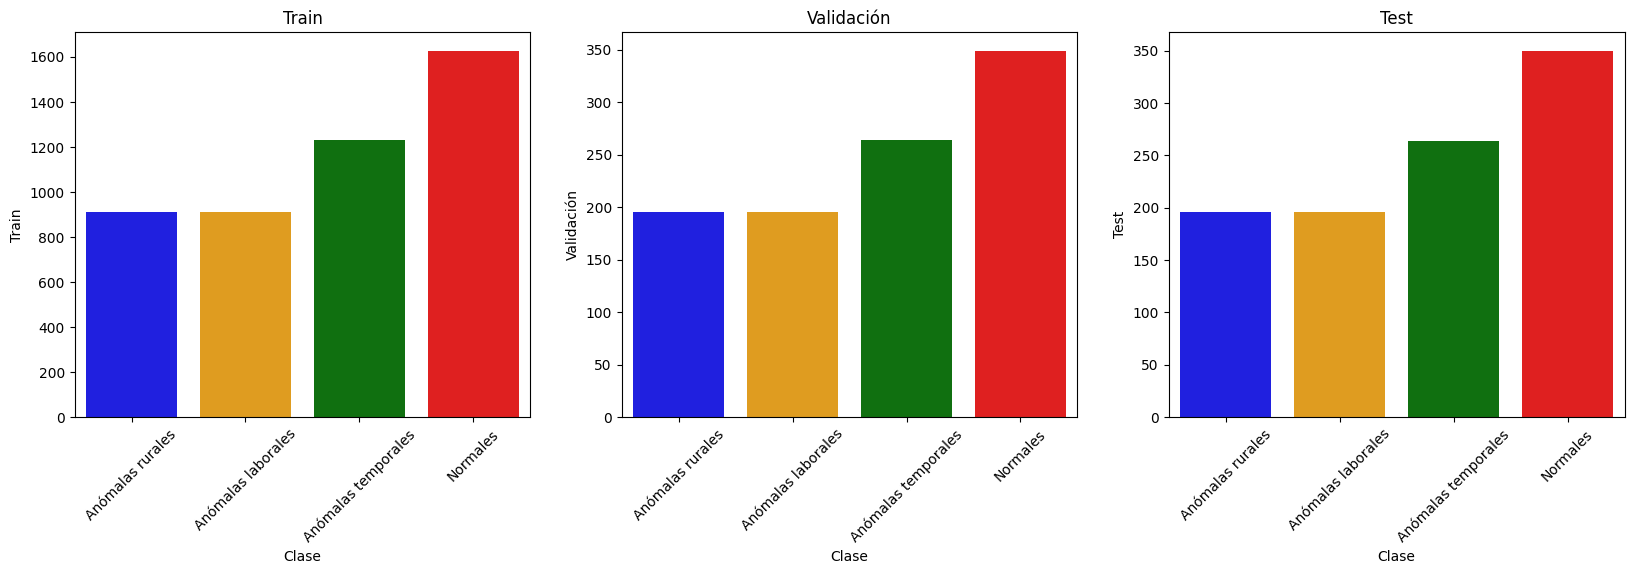

In [27]:
#grafico de barras para cada conjunto y para cada clase:

# Diccionario con los datos
datos = {
    "Clase": ["Anómalas rurales", "Anómalas laborales", "Anómalas temporales", "Normales"],
    "Train": [len(train_anomalas_rural), len(train_anomalas_laboral), len(train_anomalas_tiempo), len(train_normales)],
    "Validación": [len(val_anomalas_rural), len(val_anomalas_laboral), len(val_anomalas_tiempo), len(val_normales)],
    "Test": [len(test_anomalas_rural), len(test_anomalas_laboral), len(test_anomalas_tiempo), len(test_normales)]
}

# Creamos el DataFrame
df = pd.DataFrame(datos)

# Graficamos
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

# Gráfico de barras
sns.barplot(x="Clase", y="Train", data=df, ax=ax[0], palette = ["blue", "orange", "green", "red"])
ax[0].set_title("Train")
ax[0].tick_params(axis='x', rotation=45)
# Gráfico de barras
sns.barplot(x="Clase", y="Validación", data=df, ax=ax[1],palette = ["blue", "orange", "green", "red"])
ax[1].set_title("Validación")
ax[1].tick_params(axis='x', rotation=45)

# Gráfico de barras
sns.barplot(x="Clase", y="Test", data=df, ax=ax[2],palette = ["blue", "orange", "green", "red"])
ax[2].tick_params(axis='x', rotation=45)
ax[2].set_title("Test")

plt.show()

Guardamos los datasets creados en carpetas para poder crear los generadores de imágenes:

In [ ]:
# Cogemos los datasets de train:
import shutil

train_dfs = [train_anomalas_rural, train_anomalas_laboral, train_normales]
val_dfs = [val_anomalas_rural, val_anomalas_laboral, val_normales]
test_dfs = [test_anomalas_rural, test_anomalas_laboral, test_normales]

# Guardamos las imagenes de train en el directorio datos_listos/train/ teniendo en cuenta la clase a la que pertenecen:

clases = ["anomalas_rural", "anomalas_laboral","anomalas_tiempo", "normales"]

# Iteramos sobre cada conjunto de datos y clase, y copiamos las imágenes
for df_index, dfs in enumerate([train_dfs, val_dfs, test_dfs]):
    for clase_index, df in enumerate(dfs):
        clase = clases[clase_index]
        for img in df:
            img_path = os.path.abspath(img)
            destino = f"datos_listos/train" if df_index == 0 else f"datos_listos/val" if df_index == 1 else "datos_listos/test"
            os.makedirs(os.path.join(destino, clase), exist_ok=True)
            shutil.copy(img, os.path.join(destino, clase))


#### 2.2 Creación de datasets

In [2]:
train_dir = "mapas/datos_nov_dic/train"
val_dir = "mapas/datos_nov_dic/val"
test_dir = "mapas/datos_nov_dic/test"

HIPERPARÁMETROS PARA LOS MODELOS

In [3]:
SEED = 3456
IMG_HEIGHT = 256
IMG_WIDTH = 256
BATCH_SIZE = 8
LR =  0.1
NUM_CLASSES = 4
NUM_TIMESTEPS = 4

CLASS_LABELS = ["anomalas_rural", "anomalas_laboral", "anomalas_tiempo", "normales"]

GENERADORES DE DATOS PARA RECUCIR EL GASTO DE MEMORIA Y REALIZAR DATA AUGMENTATION

In [4]:
preprocess_fun = tf.keras.applications.vgg16.preprocess_input

train_datagen = ImageDataGenerator(horizontal_flip=True,
                                   width_shift_range=0.1,
                                   height_shift_range=0.05,
                                   rescale = 1./255,
                                   preprocessing_function=preprocess_fun
                                  )

val_datagen = ImageDataGenerator(rescale = 1./255,
                                 preprocessing_function=preprocess_fun
                                )


test_datagen = ImageDataGenerator(rescale = 1./255,
                                  preprocessing_function=preprocess_fun
                                 )

GENERADORES DE DATOS PARA TODOS LOS CONJUNTOS DE DATOS (TRAIN, VALIDACIÓN Y TEST)

In [5]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (IMG_HEIGHT ,IMG_WIDTH),
                                                    batch_size = BATCH_SIZE,
                                                    shuffle  = True ,
                                                    color_mode = "rgb",
                                                    class_mode = "categorical",
                                                    seed = SEED
                                                   )

val_generator = val_datagen.flow_from_directory(directory = val_dir,
                                                target_size = (IMG_HEIGHT ,IMG_WIDTH),
                                                batch_size = BATCH_SIZE,
                                                shuffle  = True ,
                                                color_mode = "rgb",
                                                class_mode = "categorical",
                                                seed = SEED
                                               )

test_generator = test_datagen.flow_from_directory(directory = test_dir,
                                                   target_size = (IMG_HEIGHT ,IMG_WIDTH),
                                                    batch_size = BATCH_SIZE,
                                                    shuffle  = False ,
                                                    color_mode = "rgb",
                                                    class_mode = "categorical",
                                                    seed = SEED
                                                  )

Found 4279 images belonging to 4 classes.
Found 917 images belonging to 4 classes.
Found 920 images belonging to 4 classes.


GENERADORES DE DATOS PARA CADA CLASE PARA ENTRENAR AUTOENCODERS

In [6]:
#AUTOENCODER
train_normal_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=True,
    color_mode="rgb",
    classes=["normales"],  # Solo tomar las imágenes normales
    seed=SEED
)

val_normal_generator = val_datagen.flow_from_directory(
    directory=val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=True,
    color_mode="rgb",
    classes=["normales"],  # Solo tomar las imágenes normales
    seed=SEED
)

anomalous_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=True,
    color_mode="rgb",
    classes=["anomalas_rural", "anomalas_laboral", "anomalas_tiempo"],  # Tomar las imágenes de las clases anómalas
    seed=SEED
)

test_normal_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=False,  # No es necesario barajar para el conjunto de prueba
    color_mode="rgb",
    classes=["normales"],  # Tomar imágenes de todas las clases
    seed=SEED
)

Found 1628 images belonging to 1 classes.
Found 349 images belonging to 1 classes.
Found 571 images belonging to 3 classes.
Found 349 images belonging to 1 classes.


In [ ]:
images, labels = next(train_normal_generator)
print('Image batch shape: ', images.shape)
print('Label batch shape: ', labels.shape)

Image batch shape:  (16, 256, 256, 3)
Label batch shape:  (16, 1)


GENERADORES DE DATOS PARA CADA CLASE PARA ENTRENAR REES RECURRENTES

In [12]:
class SequenceDataGenerator(Sequence):
    def __init__(self, image_generator, directory, batch_size, target_size, preprocess_fun, num_timesteps):
        self.image_generator = image_generator.flow_from_directory(directory,
                                                                   target_size=target_size,
                                                                   batch_size=1,  # Inicialmente 1, luego agrupar en secuencias
                                                                   shuffle=False,
                                                                   color_mode='rgb',
                                                                   class_mode='categorical')
        self.batch_size = batch_size
        self.num_timesteps = num_timesteps
        self.target_size = target_size
        self.preprocess_fun = preprocess_fun
        self.directory = directory
        self.class_indices = self.image_generator.class_indices

        # Indexando los archivos y etiquetas
        self.file_paths = []
        self.labels = []
        for class_dir in os.listdir(directory):
            class_path = os.path.join(directory, class_dir)
            if os.path.isdir(class_path):
                for fname in os.listdir(class_path):
                    self.file_paths.append(os.path.join(class_path, fname))
                    self.labels.append(self.class_indices[class_dir])

        # Asegúrate de que el número de imágenes es múltiplo de num_timesteps
        self.file_paths = self.file_paths[:len(self.file_paths) - len(self.file_paths) % self.num_timesteps]
        self.labels = self.labels[:len(self.labels) - len(self.labels) % self.num_timesteps]

        self.on_epoch_end()

    def __len__(self):
        return len(self.file_paths) // (self.batch_size * self.num_timesteps)

    def __getitem__(self, index):
        # Generar índices para el batch
        indices = self.indices[index * self.batch_size:(index + 1) * self.batch_size]

        # Generar datos
        X, y = self.__data_generation(indices)

        # Imprimir dimensiones de X e y
        #print(f'Batch index: {index}, X shape: {X.shape}, y shape: {y.shape}')

        return X, y

    def on_epoch_end(self):
        self.indices = np.arange(len(self.file_paths) // self.num_timesteps)
        np.random.shuffle(self.indices)

    def __data_generation(self, indices):
        # Generar datos para el batch
        X = np.empty((self.batch_size, self.num_timesteps, *self.target_size, 3))
        y = np.empty((self.batch_size), dtype=int)

        for i, idx in enumerate(indices):
            for t in range(self.num_timesteps):
                img_index = idx * self.num_timesteps + t
                if img_index < len(self.file_paths):  # Comprobar límites de índices
                    img_path = self.file_paths[img_index]
                    img = load_img(img_path, target_size=self.target_size)
                    img = img_to_array(img)
                    img = self.preprocess_fun(img)
                    X[i, t,] = img

            y[i] = self.labels[idx * self.num_timesteps]

        y = tf.keras.utils.to_categorical(y, num_classes=len(self.class_indices))

        # Imprimir las formas de los datos generados
        #print(f'Generated X shape: {X.shape}, y shape: {y.shape}')

        return X, y
# Parámetros
target_size = (IMG_HEIGHT, IMG_WIDTH)

train_seq_generator = SequenceDataGenerator(train_datagen, train_dir, BATCH_SIZE, target_size, preprocess_fun, NUM_TIMESTEPS)
val_seq_generator = SequenceDataGenerator(val_datagen, val_dir, BATCH_SIZE, target_size, preprocess_fun, NUM_TIMESTEPS)
test_seq_generator = SequenceDataGenerator(test_datagen, test_dir, BATCH_SIZE, target_size, preprocess_fun, NUM_TIMESTEPS)

Found 4279 images belonging to 4 classes.
Found 917 images belonging to 4 classes.
Found 920 images belonging to 4 classes.


### 3. MODELOS

#### 3.1 DENSENET

In [ ]:
def feature_extractor(inputs):
    densenet = tf.keras.applications.DenseNet121(input_shape=(IMG_HEIGHT,IMG_WIDTH, 3),
                                               include_top=False,
                                               weights="imagenet")

    densenet.trainable = False  # Congela los pesos del modelo preentrenado
    feature_extractor = densenet(inputs, training=False)  # Asegura que se usen los pesos preentrenados
    return feature_extractor

def classifier(inputs):
    x = tf.keras.layers.GlobalAveragePooling2D()(inputs)
    x = tf.keras.layers.Dense(NUM_CLASSES, activation="softmax", name="classification")(x)

    return x

def final_model(inputs):
    densenet_feature_extractor = feature_extractor(inputs)
    classification_output = classifier(densenet_feature_extractor)

    return classification_output

def define_compile_model():

    inputs = tf.keras.layers.Input(shape=(IMG_HEIGHT ,IMG_WIDTH,3))
    classification_output = final_model(inputs)
    model = tf.keras.Model(inputs=inputs, outputs = classification_output)

    model.compile(optimizer=tf.keras.optimizers.Adam(LR),
                loss='categorical_crossentropy',
                metrics = [tf.keras.metrics.AUC(), 'accuracy'])

    return model

model_densenet = define_compile_model()
clear_output()
model_densenet.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 densenet121 (Functional)    (None, 8, 8, 1024)        7037504   
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 classification (Dense)      (None, 4)                 4100      
                                                                 
Total params: 7,041,604
Trainable params: 4,100
Non-trainable params: 7,037,504
_________________________________________________________________


#### 3.2 VGG16

In [ ]:
def feature_extractor(inputs):
    vgg16 = tf.keras.applications.VGG16(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
                                        include_top=False,
                                        weights="imagenet")

    vgg16.trainable = False  # Congela los pesos del modelo preentrenado
    feature_extractor = vgg16(inputs, training=False)  # Asegura que se usen los pesos preentrenados
    return feature_extractor

def classifier(inputs):
    x = tf.keras.layers.GlobalAveragePooling2D()(inputs)
    x = tf.keras.layers.Dense(NUM_CLASSES, activation="softmax", name="classification")(x)

    return x

def final_model(inputs):
    vgg16_feature_extractor = feature_extractor(inputs)
    classification_output = classifier(vgg16_feature_extractor)

    return classification_output

def define_compile_model():

    inputs = tf.keras.layers.Input(shape=(IMG_HEIGHT ,IMG_WIDTH,3))
    classification_output = final_model(inputs)
    model = tf.keras.Model(inputs=inputs, outputs = classification_output)

    model.compile(optimizer=tf.keras.optimizers.Adam(LR),
                loss='categorical_crossentropy',
                metrics = [tf.keras.metrics.AUC(),"accuracy"])

    return model

model_vgg16 = define_compile_model()
clear_output()
model_vgg16.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 global_average_pooling2d_1   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 classification (Dense)      (None, 4)                 2052      
                                                                 
Total params: 14,716,740
Trainable params: 2,052
Non-trainable params: 14,714,688
_________________________________________________________________


#### 3.3 INCEPTION

In [ ]:
def feature_extractor(inputs):
    inception = tf.keras.applications.InceptionV3(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
                                        include_top=False,
                                        weights="imagenet")

    inception.trainable = False  # Congela los pesos del modelo preentrenado
    feature_extractor = inception(inputs, training=False)  # Asegura que se usen los pesos preentrenados
    return feature_extractor

def classifier(inputs):
    x = tf.keras.layers.GlobalAveragePooling2D()(inputs)
    x = tf.keras.layers.Dense(NUM_CLASSES, activation="softmax", name="classification")(x)

    return x

def final_model(inputs):
    inception_feature_extractor = feature_extractor(inputs)
    classification_output = classifier(inception_feature_extractor)

    return classification_output

def define_compile_model():

    inputs = tf.keras.layers.Input(shape=(IMG_HEIGHT ,IMG_WIDTH,3))
    classification_output = final_model(inputs)
    model = tf.keras.Model(inputs=inputs, outputs = classification_output)

    model.compile(optimizer=tf.keras.optimizers.Adam(LR),
                loss='categorical_crossentropy',
                metrics = [tf.keras.metrics.AUC(),"accuracy"])

    return model

model_inception = define_compile_model()
clear_output()
model_inception.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 classification (Dense)      (None, 4)                 8196      
                                                                 
Total params: 21,810,980
Trainable params: 8,196
Non-trainable params: 21,802,784
_________________________________________________________________


#### 3.4 VGG16 + LSTM

In [9]:
NUM_TIMESTEPS = 4  # Number of frames per sequence
from tensorflow.keras.regularizers import l2

def create_cnn_lstm_model(input_shape, num_classes):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
    base_model.trainable = False

    inputs = Input(shape=input_shape)
    x = TimeDistributed(base_model)(inputs)
    x = TimeDistributed(GlobalAveragePooling2D())(x)

    x = LSTM(64,kernel_regularizer=l2(0.01))(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs, outputs)

    model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                  loss='categorical_crossentropy',
                  metrics=[tf.keras.metrics.AUC(name='auroc'), tf.keras.metrics.AUC(name='auprc'), 'accuracy'])
    return model

model_vgg16_LSTM = create_cnn_lstm_model((NUM_TIMESTEPS, IMG_HEIGHT, IMG_WIDTH, 3), NUM_CLASSES)
model_vgg16_LSTM.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 4, 256, 256, 3)]  0         
                                                                 
 time_distributed_6 (TimeDis  (None, 4, 8, 8, 512)     14714688  
 tributed)                                                       
                                                                 
 time_distributed_7 (TimeDis  (None, 4, 512)           0         
 tributed)                                                       
                                                                 
 lstm (LSTM)                 (None, 64)                147712    
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 4)                 260 

In [ ]:
NUM_TIMESTEPS = 4  # Number of frames per sequence
from tensorflow.keras.regularizers import l2

def create_cnn_2lstm_model(input_shape, num_classes):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
    base_model.trainable = False

    inputs = Input(shape=input_shape)
    x = TimeDistributed(base_model)(inputs)
    x = TimeDistributed(GlobalAveragePooling2D())(x)

    x = LSTM(8,return_sequences=True,kernel_regularizer=l2(0.01))(x)
    x = Dropout(0.5)(x)
    x = LSTM(8,kernel_regularizer=l2(0.01))(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs, outputs)

    model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                  loss='categorical_crossentropy',
                  metrics=[tf.keras.metrics.AUC(name='auroc'), tf.keras.metrics.AUC(name='auprc'), 'accuracy'])
    return model

model_vgg16_2LSTM = create_cnn_2lstm_model((NUM_TIMESTEPS, IMG_HEIGHT, IMG_WIDTH, 3), NUM_CLASSES)
model_vgg16_2LSTM.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 4, 256, 256, 3)]  0         
                                                                 
 time_distributed_8 (TimeDis  (None, 4, 8, 8, 512)     14714688  
 tributed)                                                       
                                                                 
 time_distributed_9 (TimeDis  (None, 4, 512)           0         
 tributed)                                                       
                                                                 
 lstm_8 (LSTM)               (None, 4, 8)              16672     
                                                                 
 dropout_4 (Dropout)         (None, 4, 8)              0         
                                                                 
 lstm_9 (LSTM)               (None, 8)                 544 

#### 3.5 VGG16 + GRU

In [8]:
from tensorflow.keras.regularizers import l2

def create_cnn_gru_model(input_shape, num_classes):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
    base_model.trainable = False

    inputs = Input(shape=input_shape)
    x = TimeDistributed(base_model)(inputs)
    #x = TimeDistributed(Flatten())(x)
    x = TimeDistributed(GlobalAveragePooling2D())(x)

    x = GRU(64, return_sequences=True, kernel_regularizer=l2(0.001))(x)
    x = Dropout(0.5)(x)
    x = GRU(64, kernel_regularizer=l2(0.001))(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax', kernel_regularizer=l2(0.001))(x)

    model = tf.keras.Model(inputs, outputs)

    model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
                  loss='categorical_crossentropy',
                  metrics=[tf.keras.metrics.AUC(name='auroc'), 'accuracy'])
    return model

model_vgg16_gru = create_cnn_gru_model((NUM_TIMESTEPS,IMG_HEIGHT, IMG_WIDTH, 3), NUM_CLASSES)
model_vgg16_gru.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 4, 256, 256, 3)]  0         
                                                                 
 time_distributed_4 (TimeDis  (None, 4, 8, 8, 512)     14714688  
 tributed)                                                       
                                                                 
 time_distributed_5 (TimeDis  (None, 4, 512)           0         
 tributed)                                                       
                                                                 
 gru (GRU)                   (None, 4, 64)             110976    
                                                                 
 dropout (Dropout)           (None, 4, 64)             0         
                                                                 
 gru_1 (GRU)                 (None, 64)                24960 

In [ ]:
NUM_TIMESTEPS = 4  # Number of frames per sequence

def create_cnn_gru_model(input_shape, num_classes):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
    base_model.trainable = False

    inputs = Input(shape=input_shape)
    x = TimeDistributed(base_model)(inputs)
    #x = TimeDistributed(Flatten())(x)
    x = TimeDistributed(GlobalAveragePooling2D())(x)

    x = GRU(64, return_sequences=True, kernel_regularizer=l2(0.001))(x)
    x = Dropout(0.5)(x)
    x = GRU(64, kernel_regularizer=l2(0.001))(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax', kernel_regularizer=l2(0.001))(x)

    model = tf.keras.Model(inputs, outputs)

    model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
                  loss='categorical_crossentropy',
                  metrics=[tf.keras.metrics.AUC(name='auroc'), 'accuracy'])
    return model

model_vgg16_gru = create_cnn_gru_model((NUM_TIMESTEPS, IMG_HEIGHT, IMG_WIDTH, 3), NUM_CLASSES)
model_vgg16_gru.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 4, 128, 128, 3)]  0         
                                                                 
 time_distributed_29 (TimeDi  (None, 4, 4, 4, 512)     14714688  
 stributed)                                                      
                                                                 
 time_distributed_30 (TimeDi  (None, 4, 512)           0         
 stributed)                                                      
                                                                 
 gru_12 (GRU)                (None, 4, 64)             110976    
                                                                 
 dropout_9 (Dropout)         (None, 4, 64)             0         
                                                                 
 gru_13 (GRU)                (None, 64)                2496

#### 3.6 AUTOENCODERS

##### 3.6.1 AUTOENCODER 5k

In [24]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Model
import tensorflow as tf

def create_simple_autoencoder(input_shape, learning_rate=1e-3):
    input_img = Input(shape=input_shape)

    # Codificador Simplificado
    x = Conv2D(8, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(1e-4))(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Dropout(0.1)(x)  # Menor dropout
    x = Conv2D(16, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(1e-4))(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)

    # Decodificador Simplificado
    x = Conv2D(16, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(1e-4))(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Dropout(0.1)(x)  # Menor dropout
    x = Conv2D(8, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(1e-4))(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    # Autoencoder
    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss='mean_squared_error', metrics=["mean_absolute_error", "accuracy"])

    return autoencoder

input_shape = (IMG_HEIGHT, IMG_WIDTH, 3)
autoencoder_simple = create_simple_autoencoder(input_shape, learning_rate=LR)
autoencoder_simple.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_10 (Conv2D)          (None, 256, 256, 8)       224       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 128, 128, 8)      0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 128, 128, 8)       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 128, 128, 16)      1168      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                       

##### 3.6.2 AUTOENCODER 300k

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

def create_autoencoder(input_shape):
    input_img = Input(shape=input_shape)

    # Encoder
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')

    return autoencoder

input_shape = (IMG_HEIGHT, IMG_WIDTH, 3)
autoencoder = create_autoencoder(input_shape)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856 

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.regularizers import l2

# Definimos las dimensiones de entrada
input_img = Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3))  # Cambia IMG_HEIGHT y IMG_WIDTH por las dimensiones de tus imágenes

print("DIM DE ENTRADA: ",input_img.shape)
# Codificador
x = Conv2D(16, (3, 3), activation='relu', padding='same',kernel_regularizer=l2(1e-4))(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same',kernel_regularizer=l2(1e-4))(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decodificador
x = Conv2D(32, (3, 3), activation='relu', padding='same',kernel_regularizer=l2(1e-4))(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same',kernel_regularizer=l2(1e-4))(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (2,2), activation='sigmoid', padding='same')(x)
print("DIM DE SALIDA: ",decoded.shape)
# Autoencoder
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss='mean_squared_error',metrics=["mean_absolute_error"])

autoencoder.summary()

DIM DE ENTRADA:  (None, 256, 256, 3)
DIM DE SALIDA:  (None, 256, 256, 3)
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_5 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 128, 128, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                    

#### 3.7 UNET

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate

def unet_autoencoder(input_size=(IMG_HEIGHT, IMG_WIDTH, 3)):
    inputs = Input(input_size)

    # Encoder
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool2)
    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(pool4)
    conv5 = Conv2D(1024, (3, 3), activation='relu', padding='same')(conv5)

    # Decoder
    up6 = concatenate([UpSampling2D(size=(2, 2))(conv5), conv4], axis=-1)
    conv6 = Conv2D(512, (3, 3), activation='relu', padding='same')(up6)
    conv6 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv6)

    up7 = concatenate([UpSampling2D(size=(2, 2))(conv6), conv3], axis=-1)
    conv7 = Conv2D(256, (3, 3), activation='relu', padding='same')(up7)
    conv7 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv7)

    up8 = concatenate([UpSampling2D(size=(2, 2))(conv7), conv2], axis=-1)
    conv8 = Conv2D(128, (3, 3), activation='relu', padding='same')(up8)
    conv8 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv8)

    up9 = concatenate([UpSampling2D(size=(2, 2))(conv8), conv1], axis=-1)
    conv9 = Conv2D(64, (3, 3), activation='relu', padding='same')(up9)
    conv9 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv9)

    conv10 = Conv2D(3, 1, activation='sigmoid')(conv9)

    model = Model(inputs, conv10)

    return model

unet = unet_autoencoder((IMG_HEIGHT,IMG_WIDTH,3))
unet.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss='mean_squared_error',metrics=["mean_absolute_error"])

unet.summary()

Model: "model_14"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_19 (InputLayer)       [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_226 (Conv2D)         (None, 256, 256, 64)         1792      ['input_19[0][0]']            
                                                                                                  
 conv2d_227 (Conv2D)         (None, 256, 256, 64)         36928     ['conv2d_226[0][0]']          
                                                                                                  
 max_pooling2d_51 (MaxPooli  (None, 128, 128, 64)         0         ['conv2d_227[0][0]']          
 ng2D)                                                                                     

#### 3.8 LSTM

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Reshape, TimeDistributed
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2

def create_gru_model(input_shape, num_classes):
    model = Sequential()
    model.add(TimeDistributed(Conv2D(16, (3, 3), activation='relu'), input_shape=input_shape))  # Apply Conv2D to each frame
    model.add(TimeDistributed(MaxPooling2D((2, 2))))  # Apply MaxPooling2D to each frame
    model.add(TimeDistributed(Reshape((-1,))))  # Reshape each frame
    model.add(LSTM(64, kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.5))
    # model.add(LSTM(64, kernel_regularizer=l2(0.001)))
    # model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=[tf.keras.metrics.AUC(name='auroc'), tf.keras.metrics.AUC(name='auprc'), 'accuracy'])
    return model

model_lstm = create_gru_model((NUM_TIMESTEPS, IMG_HEIGHT, IMG_WIDTH, 3), NUM_CLASSES)
model_lstm.summary()

### ENTRENAMIENTO

In [25]:
epochs = 100

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-9)
stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('/modelos_trained/autoencoder_5k_256res_32b.h5', save_best_only=True, monitor='val_loss')

def autoencoder_generator(generator):
    for batch in generator:
        # For an autoencoder, the input images and the target images are the same
        yield (batch[0], batch[0])

train_autoencoder_generator = autoencoder_generator(train_normal_generator)
val_autoencoder_generator = autoencoder_generator(val_normal_generator)

history = autoencoder_simple.fit(
    train_autoencoder_generator,
    steps_per_epoch = 60,
    epochs=epochs,
    validation_data=val_autoencoder_generator,
    validation_steps = 20,
    callbacks= [stop, reduce_lr,model_checkpoint]
)

Epoch 1/100
60/60 [==============================] - 183s 3s/step - loss: 0.1165 - mean_absolute_error: 0.2748 - accuracy: 0.7338 - val_loss: 0.0519 - val_mean_absolute_error: 0.0952 - val_accuracy: 0.7898 - lr: 0.1000
Epoch 2/100
60/60 [==============================] - 181s 3s/step - loss: 0.0400 - mean_absolute_error: 0.0805 - accuracy: 0.7497 - val_loss: 0.0428 - val_mean_absolute_error: 0.0905 - val_accuracy: 0.7901 - lr: 0.1000
Epoch 3/100
60/60 [==============================] - 179s 3s/step - loss: 0.0317 - mean_absolute_error: 0.0794 - accuracy: 0.7506 - val_loss: 0.0322 - val_mean_absolute_error: 0.0906 - val_accuracy: 0.7902 - lr: 0.1000
Epoch 4/100
60/60 [==============================] - 179s 3s/step - loss: 0.0248 - mean_absolute_error: 0.0793 - accuracy: 0.7504 - val_loss: 0.0284 - val_mean_absolute_error: 0.0903 - val_accuracy: 0.7901 - lr: 0.1000
Epoch 5/100
60/60 [==============================] - 183s 3s/step - loss: 0.0432 - mean_absolute_error: 0.0916 - accuracy: 0

In [26]:
autoencoder_simple.save("modelos_trained/autoencoder_5k_256dim.h5")

with open("modelos_trained/autoencoder_5k_256dim.pkl", "wb") as f:
    pickle.dump(history.history, f)

In [13]:
epochs = 100

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, min_lr=1e-9)
stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

def autoencoder_generator(generator):
    for batch in generator:
        # For an autoencoder, the input images and the target images are the same
        yield (batch[0], batch[0])

train_autoencoder_generator = autoencoder_generator(train_normal_generator)
val_autoencoder_generator = autoencoder_generator(val_normal_generator)

history = autoencoder.fit(
    train_autoencoder_generator,
    steps_per_epoch = 60,
    epochs=epochs,
    validation_data=val_autoencoder_generator,
    validation_steps = 20,
    callbacks= [stop, reduce_lr]
)

Epoch 1/100
60/60 [==============================] - 44s 657ms/step - loss: 0.0152 - mean_absolute_error: 0.0645 - val_loss: 0.0167 - val_mean_absolute_error: 0.0692 - lr: 0.0010
Epoch 2/100
60/60 [==============================] - 37s 633ms/step - loss: 0.0092 - mean_absolute_error: 0.0449 - val_loss: 0.0143 - val_mean_absolute_error: 0.0618 - lr: 0.0010
Epoch 3/100
60/60 [==============================] - 35s 595ms/step - loss: 0.0077 - mean_absolute_error: 0.0408 - val_loss: 0.0131 - val_mean_absolute_error: 0.0554 - lr: 0.0010
Epoch 4/100
60/60 [==============================] - 33s 564ms/step - loss: 0.0072 - mean_absolute_error: 0.0392 - val_loss: 0.0126 - val_mean_absolute_error: 0.0567 - lr: 0.0010
Epoch 5/100
60/60 [==============================] - 34s 570ms/step - loss: 0.0068 - mean_absolute_error: 0.0385 - val_loss: 0.0122 - val_mean_absolute_error: 0.0530 - lr: 0.0010
Epoch 6/100
60/60 [==============================] - 32s 539ms/step - loss: 0.0065 - mean_absolute_error:

In [30]:
autoencoder.save("modelos_trained/autoencoder_regulalizerL2_16batch_256dim.h5")

with open("modelos_trained/autoencoder_regulalizerL2_16batch_256dim.pkl", "wb") as f:
    pickle.dump(history.history, f)

In [ ]:
epochs = 100

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, min_lr=1e-9)
stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

def autoencoder_generator(generator):
    for batch in generator:
        # For an autoencoder, the input images and the target images are the same
        yield (batch[0], batch[0])

train_autoencoder_generator = autoencoder_generator(train_normal_generator)
val_autoencoder_generator = autoencoder_generator(val_normal_generator)

history = autoencoder.fit(
    train_autoencoder_generator,
    steps_per_epoch = 60,
    epochs=epochs,
    validation_data=val_autoencoder_generator,
    validation_steps = 20,
    callbacks= [stop, reduce_lr]
)

Epoch 1/100
25/25 [==============================] - 80s 1s/step - loss: 0.0182 - mean_absolute_error: 0.0947 - val_loss: 0.0120 - val_mean_absolute_error: 0.0662 - lr: 0.0010
Epoch 2/100
25/25 [==============================] - 38s 2s/step - loss: 0.0049 - mean_absolute_error: 0.0420 - val_loss: 0.0089 - val_mean_absolute_error: 0.0501 - lr: 0.0010
Epoch 3/100
25/25 [==============================] - 32s 1s/step - loss: 0.0031 - mean_absolute_error: 0.0309 - val_loss: 0.0067 - val_mean_absolute_error: 0.0440 - lr: 0.0010
Epoch 4/100
25/25 [==============================] - 32s 1s/step - loss: 0.0020 - mean_absolute_error: 0.0230 - val_loss: 0.0049 - val_mean_absolute_error: 0.0365 - lr: 0.0010
Epoch 5/100
25/25 [==============================] - 63s 1s/step - loss: 0.0014 - mean_absolute_error: 0.0183 - val_loss: 0.0040 - val_mean_absolute_error: 0.0311 - lr: 0.0010
Epoch 6/100
25/25 [==============================] - 33s 1s/step - loss: 0.0011 - mean_absolute_error: 0.0163 - val_loss

In [ ]:
unet.save("modelos_trained/unet_16batch_256dim.h5")

with open("modelos_trained/unet_16batch_256dim.pkl", "wb") as f:
    pickle.dump(history.history, f)

In [ ]:
EPOCHS = 50

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=1e-9)
stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, min_delta=0.0025)

history = model_lstm.fit(train_seq_generator,
                    validation_data=val_seq_generator,
                    epochs = EPOCHS,
                    callbacks= [stop, reduce_lr]
                    # steps_per_epoch=steps_per_epoch,
                    # validation_steps=validation_steps,
                    )

Epoch 1/50


ResourceExhaustedError: Graph execution error:

Detected at node 'gradient_tape/lstm_7/lstm_cell_7/kernel/Regularizer/mul' defined at (most recent call last):
    File "c:\Users\Alex\miniconda3\envs\py310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\Alex\miniconda3\envs\py310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
      app.launch_new_instance()
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
      app.start()
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\ipykernel\kernelapp.py", line 739, in start
      self.io_loop.start()
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\Alex\miniconda3\envs\py310\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "c:\Users\Alex\miniconda3\envs\py310\lib\asyncio\base_events.py", line 1909, in _run_once
      handle._run()
    File "c:\Users\Alex\miniconda3\envs\py310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue
      await self.process_one()
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\ipykernel\kernelbase.py", line 534, in process_one
      await dispatch(*args)
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell
      await result
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\ipykernel\ipkernel.py", line 359, in execute_request
      await super().execute_request(stream, ident, parent)
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\ipykernel\kernelbase.py", line 778, in execute_request
      reply_content = await reply_content
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\ipykernel\ipkernel.py", line 446, in do_execute
      res = shell.run_cell(
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell
      result = self._run_cell(
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell
      result = runner(coro)
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Alex\AppData\Local\Temp\ipykernel_1140\3050591066.py", line 6, in <module>
      history = model_lstm.fit(train_seq_generator,
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\keras\engine\training.py", line 997, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 576, in minimize
      grads_and_vars = self._compute_gradients(
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 634, in _compute_gradients
      grads_and_vars = self._get_gradients(
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 510, in _get_gradients
      grads = tape.gradient(loss, var_list, grad_loss)
Node: 'gradient_tape/lstm_7/lstm_cell_7/kernel/Regularizer/mul'
failed to allocate memory
	 [[{{node gradient_tape/lstm_7/lstm_cell_7/kernel/Regularizer/mul}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_96473]

In [ ]:
model_gru.save("modelos_trained/gru.h5")

with open("modelos_trained/gru.pkl", "wb") as f:
    pickle.dump(history.history, f)

In [ ]:
EPOCHS = 50

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='accuracy', factor=0.1, patience=2, min_lr=1e-9)
stop = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5, min_delta=0.0025)

history = model_vgg16_LSTM.fit(train_seq_generator,
                    validation_data=val_seq_generator,
                    epochs = EPOCHS,
                    callbacks= [stop, reduce_lr]
                    # steps_per_epoch=steps_per_epoch,
                    # validation_steps=validation_steps,
                    )

Epoch 1/50
201/201 [==============================] - 273s 1s/step - loss: 1.3713 - auroc: 0.5776 - auprc: 0.5776 - accuracy: 0.3165 - val_loss: 1.3504 - val_auroc: 0.6304 - val_auprc: 0.6304 - val_accuracy: 0.3314 - lr: 0.0010
Epoch 2/50
201/201 [==============================] - 268s 1s/step - loss: 1.3161 - auroc: 0.6422 - auprc: 0.6422 - accuracy: 0.3607 - val_loss: 1.2471 - val_auroc: 0.7328 - val_auprc: 0.7328 - val_accuracy: 0.4709 - lr: 0.0010
Epoch 3/50
201/201 [==============================] - 267s 1s/step - loss: 1.2581 - auroc: 0.6901 - auprc: 0.6901 - accuracy: 0.4173 - val_loss: 1.2500 - val_auroc: 0.7100 - val_auprc: 0.7100 - val_accuracy: 0.3953 - lr: 0.0010
Epoch 4/50
201/201 [==============================] - 264s 1s/step - loss: 1.1869 - auroc: 0.7295 - auprc: 0.7295 - accuracy: 0.4422 - val_loss: 0.9921 - val_auroc: 0.8329 - val_auprc: 0.8329 - val_accuracy: 0.5727 - lr: 0.0010
Epoch 5/50
201/201 [==============================] - 263s 1s/step - loss: 1.0546 - auro

In [ ]:
model_vgg16_LSTM.save("modelos_trained/model_vgg16_2lstm_4clases_8num_timesteps_8batch_size.h5")

with open("modelos_trained/model_vgg16_2lstm_4clases_8num_timesteps_8batch_size.pkl", "wb") as f:
    pickle.dump(history.history, f)

In [ ]:
EPOCHS = 50

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='accuracy', factor=0.1, patience=2, min_lr=1e-9)
stop = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5, min_delta=0.0025)

history = model_vgg16_LSTM.fit(train_seq_generator,
                    validation_data=val_seq_generator,
                    epochs = EPOCHS,
                    callbacks= [stop, reduce_lr]
                    # steps_per_epoch=steps_per_epoch,
                    # validation_steps=validation_steps,
                    )

Epoch 1/50
402/402 [==============================] - 437s 1s/step - loss: 1.3581 - auroc: 0.5952 - auprc: 0.5952 - accuracy: 0.3383 - val_loss: 1.3262 - val_auroc: 0.6445 - val_auprc: 0.6445 - val_accuracy: 0.3081 - lr: 0.0010
Epoch 2/50
402/402 [==============================] - 429s 1s/step - loss: 1.3457 - auroc: 0.6098 - auprc: 0.6098 - accuracy: 0.3389 - val_loss: 1.3438 - val_auroc: 0.6254 - val_auprc: 0.6254 - val_accuracy: 0.3605 - lr: 0.0010
Epoch 3/50
402/402 [==============================] - 429s 1s/step - loss: 1.2997 - auroc: 0.6606 - auprc: 0.6606 - accuracy: 0.3924 - val_loss: 1.2983 - val_auroc: 0.6653 - val_auprc: 0.6653 - val_accuracy: 0.4070 - lr: 0.0010
Epoch 4/50
402/402 [==============================] - 435s 1s/step - loss: 1.2351 - auroc: 0.7169 - auprc: 0.7169 - accuracy: 0.4372 - val_loss: 1.2034 - val_auroc: 0.7408 - val_auprc: 0.7408 - val_accuracy: 0.4680 - lr: 0.0010
Epoch 5/50
402/402 [==============================] - 433s 1s/step - loss: 1.1482 - auro

In [ ]:
model_vgg16_LSTM.save("modelos_trained/model_vgg16_lstm.h5")

with open("modelos_trained/model_vgg16_lstm.pkl", "wb") as f:
    pickle.dump(history.history, f)

In [ ]:
EPOCHS = 50

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='accuracy', factor=0.1, patience=2, min_lr=1e-9)
stop = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5, min_delta=0.0025)

history = model_vgg16_gru.fit(train_seq_generator,
                    validation_data=val_seq_generator,
                    epochs = EPOCHS,
                    callbacks= [stop, reduce_lr]
                    # steps_per_epoch=steps_per_epoch,
                    # validation_steps=validation_steps,
                    )

Epoch 1/50
402/402 [==============================] - 435s 1s/step - loss: 1.3395 - auroc: 0.6129 - auprc: 0.6129 - accuracy: 0.3489 - val_loss: 1.3564 - val_auroc: 0.6465 - val_auprc: 0.6465 - val_accuracy: 0.3285 - lr: 0.0010
Epoch 2/50
402/402 [==============================] - 424s 1s/step - loss: 1.3189 - auroc: 0.6244 - auprc: 0.6244 - accuracy: 0.3520 - val_loss: 1.2750 - val_auroc: 0.7439 - val_auprc: 0.7439 - val_accuracy: 0.4884 - lr: 0.0010
Epoch 3/50
402/402 [==============================] - 423s 1s/step - loss: 1.2908 - auroc: 0.6639 - auprc: 0.6639 - accuracy: 0.4005 - val_loss: 1.2491 - val_auroc: 0.7490 - val_auprc: 0.7490 - val_accuracy: 0.4709 - lr: 0.0010
Epoch 4/50
402/402 [==============================] - 423s 1s/step - loss: 1.2610 - auroc: 0.6963 - auprc: 0.6963 - accuracy: 0.4123 - val_loss: 1.3194 - val_auroc: 0.6609 - val_auprc: 0.6609 - val_accuracy: 0.3837 - lr: 0.0010
Epoch 5/50
402/402 [==============================] - 427s 1s/step - loss: 1.2062 - auro

In [ ]:
model_vgg16_gru.save("modelos_trained/model_vgg16_gru_final.h5")

with open("modelos_trained/model_vgg16_gru_final.pkl", "wb") as f:
    pickle.dump(history.history, f)

In [ ]:
EPOCHS = 20

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.1, patience=2, min_lr=1e-9)
stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=4)

history = model_vgg16.fit(train_generator,
                    validation_data=val_generator,
                    epochs = EPOCHS,
                    callbacks= [stop, reduce_lr]
                    # steps_per_epoch=steps_per_epoch,
                    # validation_steps=validation_steps,
                    )

Epoch 1/20
134/134 [==============================] - 391s 3s/step - loss: 1.8183 - auc_1: 0.6503 - accuracy: 0.3699 - val_loss: 1.1788 - val_auc_1: 0.7199 - val_accuracy: 0.3675 - lr: 0.1000
Epoch 2/20
134/134 [==============================] - 371s 3s/step - loss: 1.2068 - auc_1: 0.7464 - accuracy: 0.4772 - val_loss: 1.1051 - val_auc_1: 0.7840 - val_accuracy: 0.5867 - lr: 0.1000
Epoch 3/20
134/134 [==============================] - 372s 3s/step - loss: 1.2396 - auc_1: 0.7544 - accuracy: 0.4838 - val_loss: 1.4072 - val_auc_1: 0.7316 - val_accuracy: 0.4089 - lr: 0.1000
Epoch 4/20
134/134 [==============================] - 370s 3s/step - loss: 1.1052 - auc_1: 0.7947 - accuracy: 0.5277 - val_loss: 1.2821 - val_auc_1: 0.7697 - val_accuracy: 0.4951 - lr: 0.1000
Epoch 5/20
134/134 [==============================] - 371s 3s/step - loss: 1.1155 - auc_1: 0.7981 - accuracy: 0.5319 - val_loss: 0.9705 - val_auc_1: 0.8306 - val_accuracy: 0.6140 - lr: 0.1000
Epoch 6/20
134/134 [====================

In [ ]:
model_vgg16.save("modelos_trained/model_vgg16_v2.h5")

with open("modelos_trained/model_vgg16_history_v2.pkl", "wb") as f:
    pickle.dump(history.history, f)

In [ ]:
EPOCHS = 10

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.1, patience=2, min_lr=1e-9)
stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=4)

history = model_inception.fit(train_generator,
                    validation_data=val_generator,
                    epochs = EPOCHS,
                    callbacks= [stop, reduce_lr]
                    # steps_per_epoch=steps_per_epoch,
                    # validation_steps=validation_steps,
                    )

Epoch 1/10
34/34 [==============================] - 1096s 32s/step - loss: 1.4478 - auc_2: 0.8340 - val_loss: 1.2840 - val_auc_2: 0.8518 - lr: 0.0100
Epoch 2/10
34/34 [==============================] - 1083s 32s/step - loss: 1.3874 - auc_2: 0.8341 - val_loss: 1.2844 - val_auc_2: 0.8433 - lr: 0.0100
Epoch 3/10
34/34 [==============================] - 1050s 31s/step - loss: 1.3282 - auc_2: 0.8389 - val_loss: 1.1768 - val_auc_2: 0.8571 - lr: 0.0100
Epoch 4/10
34/34 [==============================] - 1056s 32s/step - loss: 1.2348 - auc_2: 0.8448 - val_loss: 1.3140 - val_auc_2: 0.8600 - lr: 0.0100
Epoch 5/10
34/34 [==============================] - 1074s 31s/step - loss: 1.3258 - auc_2: 0.8323 - val_loss: 1.2112 - val_auc_2: 0.8511 - lr: 0.0100
Epoch 6/10
34/34 [==============================] - 1082s 32s/step - loss: 1.1659 - auc_2: 0.8490 - val_loss: 1.1767 - val_auc_2: 0.8576 - lr: 0.0100
Epoch 7/10
34/34 [==============================] - 1051s 31s/step - loss: 1.1846 - auc_2: 0.8463 - 

In [ ]:
model_inception.save("modelos_trained/model_inception_v2.h5")

# Guarda el historial de entrenamiento en un archivo pickle
with open("modelos_trained/model_vgg16_history.pkl", "wb") as f:
    pickle.dump(history.history, f)

### 4- MÉTRICAS

#### 4.1 INCEPTION

In [8]:
model_inception = tf.keras.models.load_model("modelos_trained/model_inception.h5")

In [ ]:
# store results
auc = history.history['auc_2']
val_auc = history.history['val_auc_2']
loss = history.history['loss']
val_loss = history.history['val_loss']

# plot results
plt.figure(figsize=(10, 12))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(auc, label='Training AUC')
plt.plot(val_auc, label='Validation AUC')
plt.legend(loc='lower right')
plt.ylabel('AUC')
plt.title(f'\nTraining and Validation Loss')

Text(0.5, 1.0, '\nTraining and Validation Loss')

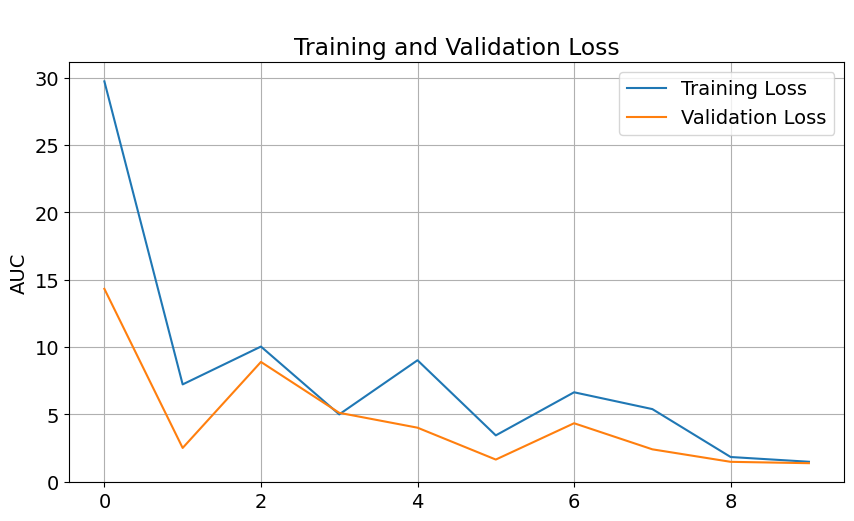

In [ ]:
plt.figure(figsize=(10, 12))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('AUC')
plt.title(f'\nTraining and Validation Loss')

#### 4.2  DenseNet

In [17]:
#load model:

model_densenet = tf.keras.models.load_model("modelos_trained/model_densenet_v2.h5")

with open("modelos_trained/model_densenet_v2.pkl", "rb") as f:
    history = pickle.load(f)

history.keys()

dict_keys(['loss', 'auc', 'accuracy', 'val_loss', 'val_auc', 'val_accuracy', 'lr'])

Text(0.5, 1.0, '\nAUC para el modelo DenseNet121')

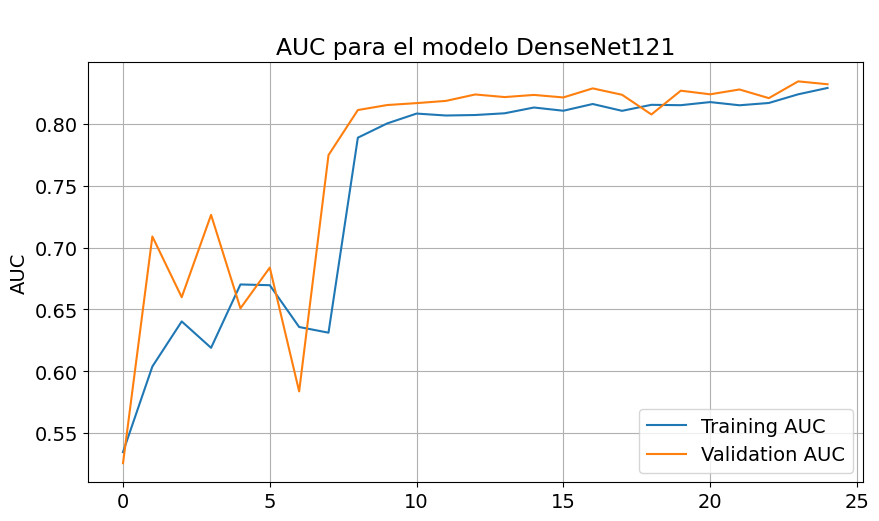

In [ ]:
# store results
auc = history['auc']
val_auc = history['val_auc']
loss = history['loss']
val_loss = history['val_loss']
accuracy = history['accuracy']
val_accuracy = history['val_accuracy']


# plot results
plt.figure(figsize=(10, 12))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(auc, label='Training AUC')
plt.plot(val_auc, label='Validation AUC')
plt.legend(loc='lower right')
plt.ylabel('AUC')
plt.title(f'\nAUC para el modelo DenseNet121')

Text(0.5, 1.0, '\nLoss para el modelo DenseNet121')

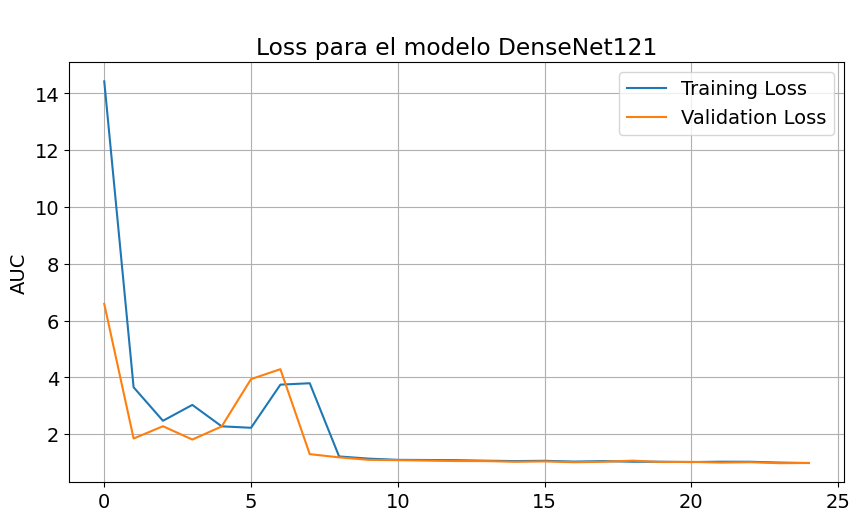

In [ ]:
plt.figure(figsize=(10, 12))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('AUC')
plt.title(f'\nLoss para el modelo DenseNet121')

Text(0.5, 1.0, '\nAccuracy para el modelo DenseNet121')

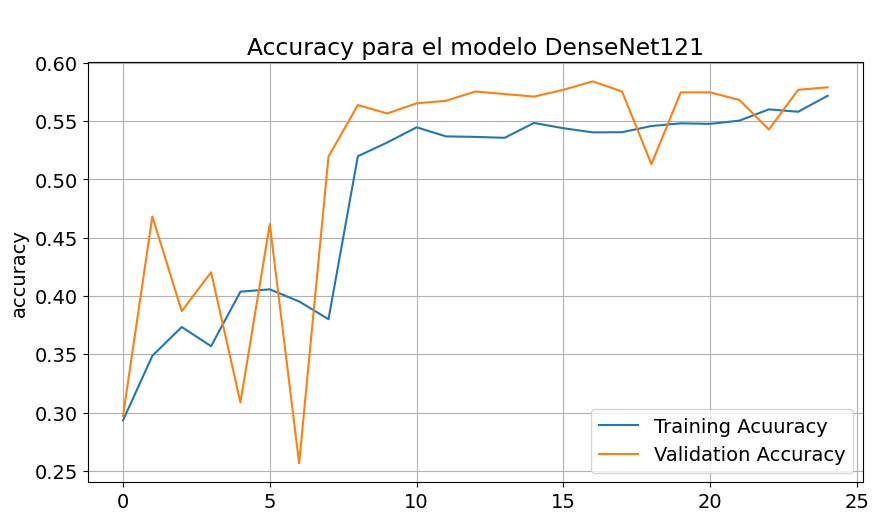

In [ ]:
plt.figure(figsize=(10, 12))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(accuracy, label='Training Acuuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('accuracy')
plt.title(f'\nAccuracy para el modelo DenseNet121')

#### 4.3 VGG16

In [6]:
model_vgg = tf.keras.models.load_model("modelos_trained/model_vgg16_v2.h5")

with open("modelos_trained/model_vgg16_history_v2.pkl", "rb") as f:
    history = pickle.load(f)

In [ ]:
history.keys()

dict_keys(['loss', 'auc_1', 'accuracy', 'val_loss', 'val_auc_1', 'val_accuracy', 'lr'])

Text(0.5, 1.0, '\nTraining and Validation AUC')

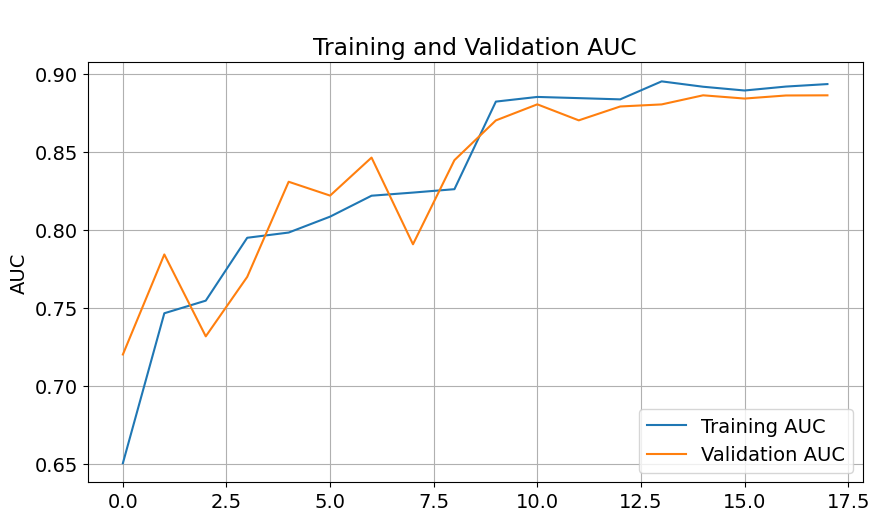

In [ ]:
#store results
auc = history['auc_1']
val_auc = history['val_auc_1']
loss = history['loss']
val_loss = history['val_loss']
accuracy = history['accuracy']
val_accuracy = history['val_accuracy']


# plot results
plt.figure(figsize=(10, 12))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(auc, label='Training AUC')
plt.plot(val_auc, label='Validation AUC')
plt.legend(loc='lower right')
plt.ylabel('AUC')
plt.title(f'\nTraining and Validation AUC')

Text(0.5, 1.0, '\nTraining and Validation Loss')

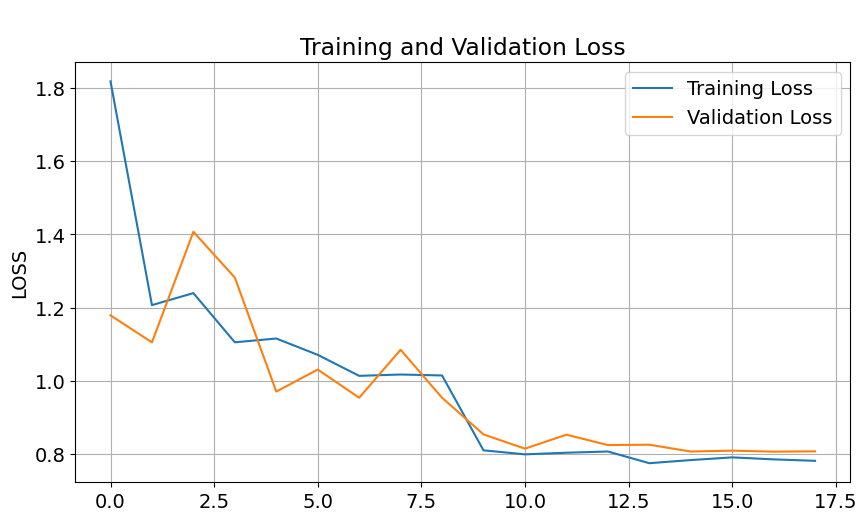

In [ ]:
plt.figure(figsize=(10, 12))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('LOSS')
plt.title(f'\nTraining and Validation Loss')

Text(0.5, 1.0, '\nTraining and Validation Accuracy')

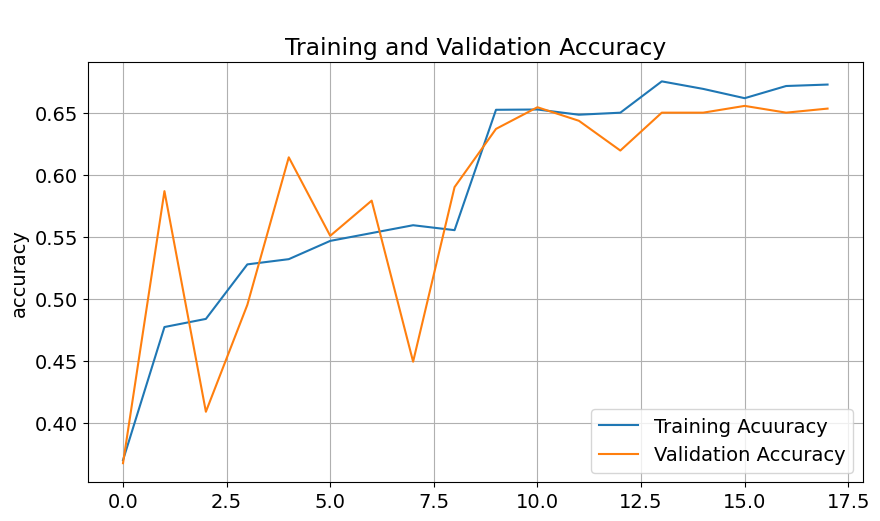

In [ ]:
plt.figure(figsize=(10, 12))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(accuracy, label='Training Acuuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('accuracy')
plt.title(f'\nTraining and Validation Accuracy')

#### 4.4 VGG16 + GRU

In [ ]:
model_vgg16_gru_final = tf.keras.models.load_model("modelos_trained/model_vgg16_gru_final.h5")

with open("modelos_trained/model_vgg16_gru_final.pkl", "rb") as f:
    history = pickle.load(f)

In [ ]:
history.keys()

dict_keys(['loss', 'auroc', 'auprc', 'accuracy', 'val_loss', 'val_auroc', 'val_auprc', 'val_accuracy', 'lr'])

Text(0.5, 1.0, '\nTraining and Validation AUC para el modelo VGG16 + GRU')

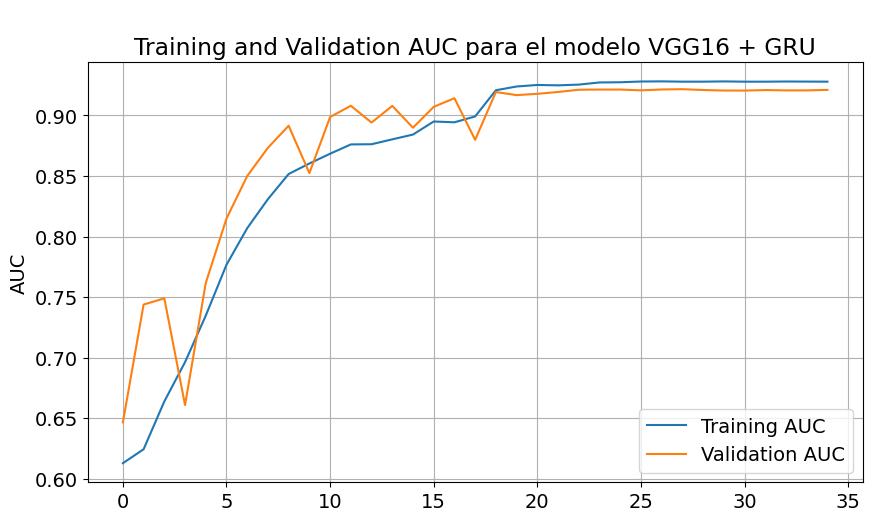

In [ ]:
#store results
auc = history['auroc']
val_auc = history['val_auroc']


# plot results
plt.figure(figsize=(10, 12))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(auc, label='Training AUC')
plt.plot(val_auc, label='Validation AUC')
plt.legend(loc='lower right')
plt.ylabel('AUC')
plt.title(f'\nTraining and Validation AUC para el modelo VGG16 + GRU')

Text(0.5, 1.0, '\nTraining and Validation LOSS para el modelo VGG16 + GRU')

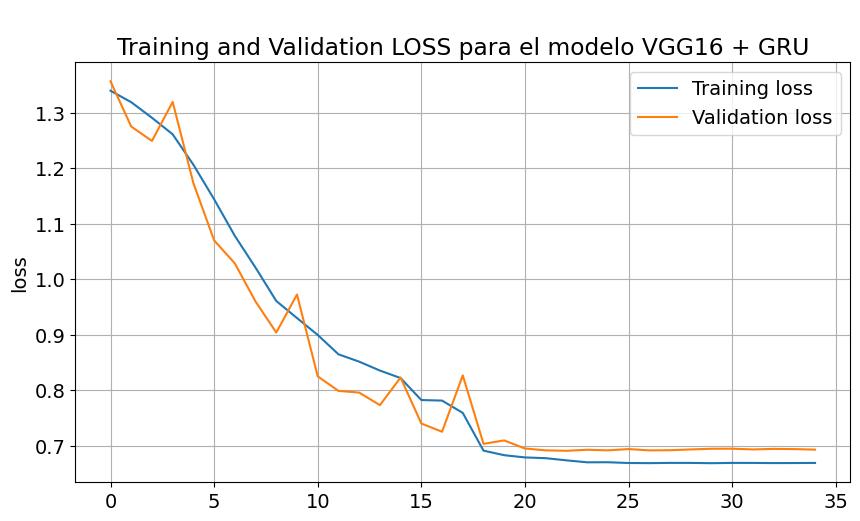

In [ ]:
loss = history['loss']
val_loss = history['val_loss']

# plot results
plt.figure(figsize=(10, 12))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.legend(loc='upper right')
plt.ylabel('loss')
plt.title(f'\nTraining and Validation LOSS para el modelo VGG16 + GRU')

Text(0.5, 1.0, '\nTraining and Validation ACCURACY para el modelo VGG16 + GRU')

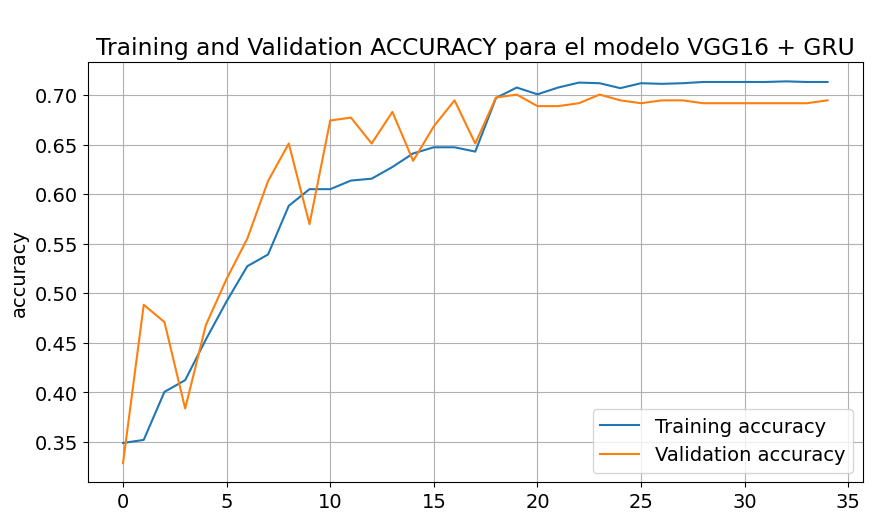

In [ ]:
accuracy = history['accuracy']
val_accuracy = history['val_accuracy']

# plot results
plt.figure(figsize=(10, 12))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(accuracy, label='Training accuracy')
plt.plot(val_accuracy, label='Validation accuracy')
plt.legend(loc='lower right')
plt.ylabel('accuracy')
plt.title(f'\nTraining and Validation ACCURACY para el modelo VGG16 + GRU')

Text(0.5, 1.0, '\nTraining and Validation AUCPR para el modelo VGG16 + GRU')

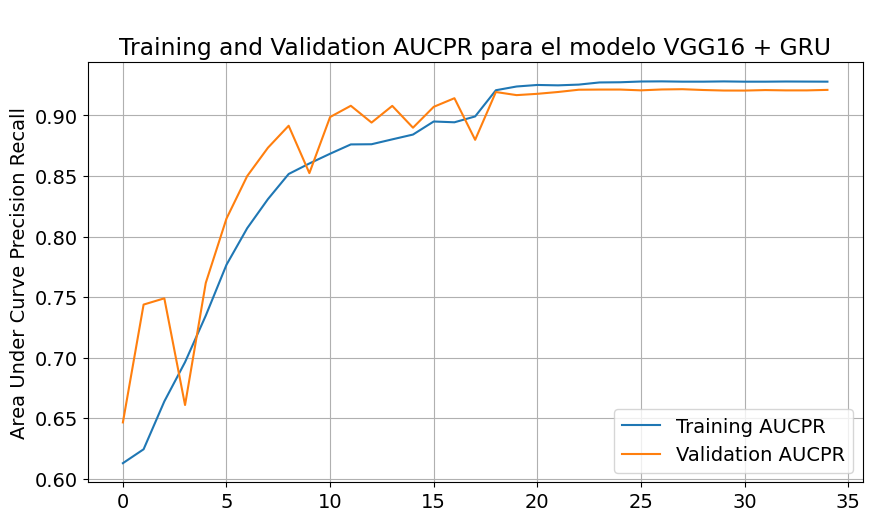

In [ ]:
aucpr = history['auprc']
val_aucpr = history['val_auprc']

# plot results
plt.figure(figsize=(10, 12))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(aucpr, label='Training AUCPR')
plt.plot(val_aucpr, label='Validation AUCPR')
plt.legend(loc='lower right')
plt.ylabel('Area Under Curve Precision Recall')
plt.title(f'\nTraining and Validation AUCPR para el modelo VGG16 + GRU')

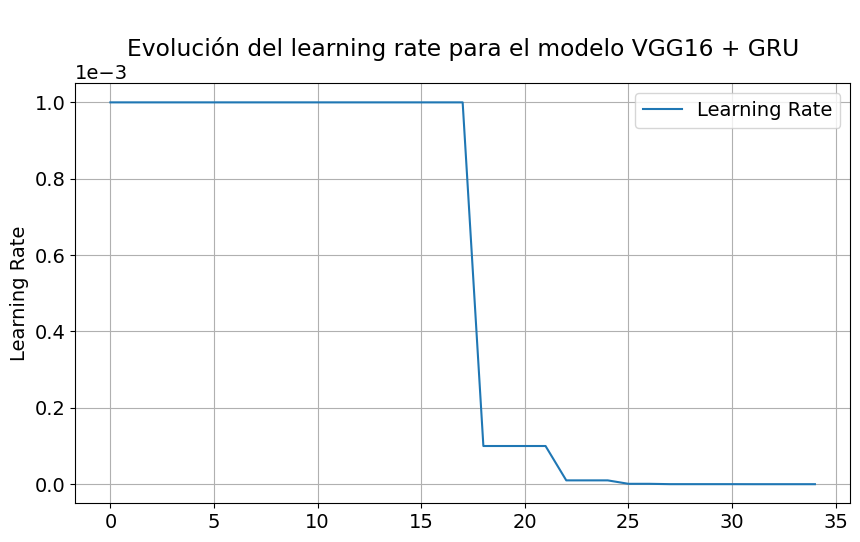

In [ ]:
lr_hist = history['lr']

plt.figure(figsize=(10, 12))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(lr_hist, label='Learning Rate')
plt.legend(loc='upper right')
plt.ylabel('Learning Rate')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.title(f'\nEvolución del learning rate para el modelo VGG16 + GRU')

plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))


#### 4.5 VGG16 + LSTM

In [ ]:
model_vgg16_lstm = tf.keras.models.load_model("modelos_trained/model_vgg16_lstm.h5")

with open("modelos_trained/model_vgg16_lstm.pkl", "rb") as f:
    history = pickle.load(f)

Text(0.5, 1.0, '\nTraining and Validation AUC para el modelo VGG16 + LSTM')

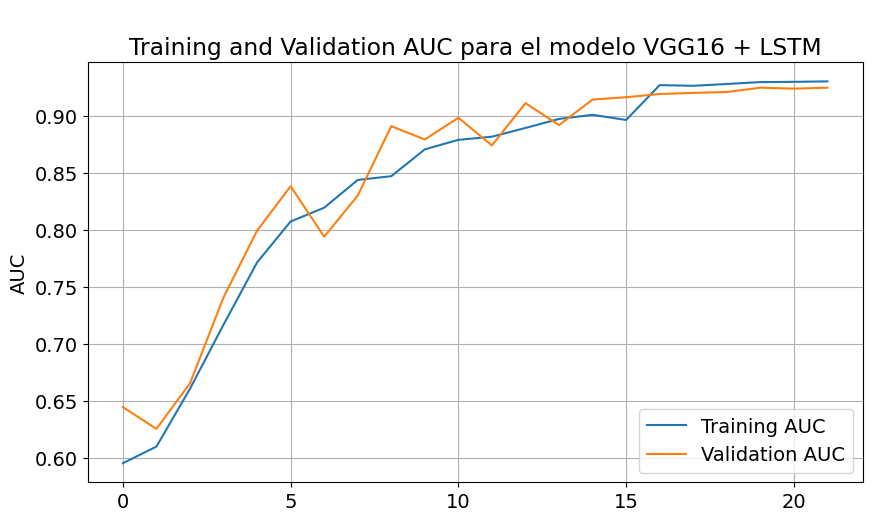

In [ ]:
#store results
auc = history['auroc']
val_auc = history['val_auroc']


# plot results
plt.figure(figsize=(10, 12))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(auc, label='Training AUC')
plt.plot(val_auc, label='Validation AUC')
plt.legend(loc='lower right')
plt.ylabel('AUC')
plt.title(f'\nTraining and Validation AUC para el modelo VGG16 + LSTM')

Text(0.5, 1.0, '\nTraining and Validation LOSS para el modelo VGG16 + LSTM')

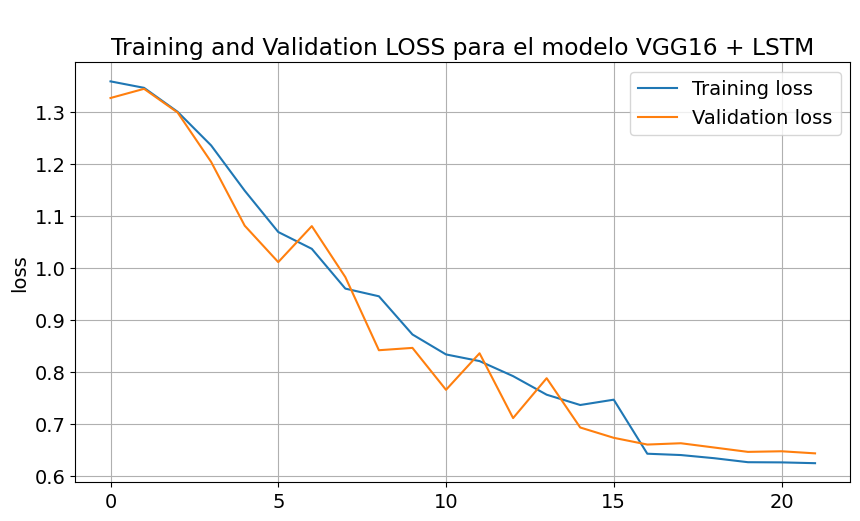

In [ ]:
loss = history['loss']
val_loss = history['val_loss']

# plot results
plt.figure(figsize=(10, 12))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.legend(loc='upper right')
plt.ylabel('loss')
plt.title(f'\nTraining and Validation LOSS para el modelo VGG16 + LSTM')

Text(0.5, 1.0, '\nTraining and Validation ACCURACY para el modelo VGG16 + LSTM')

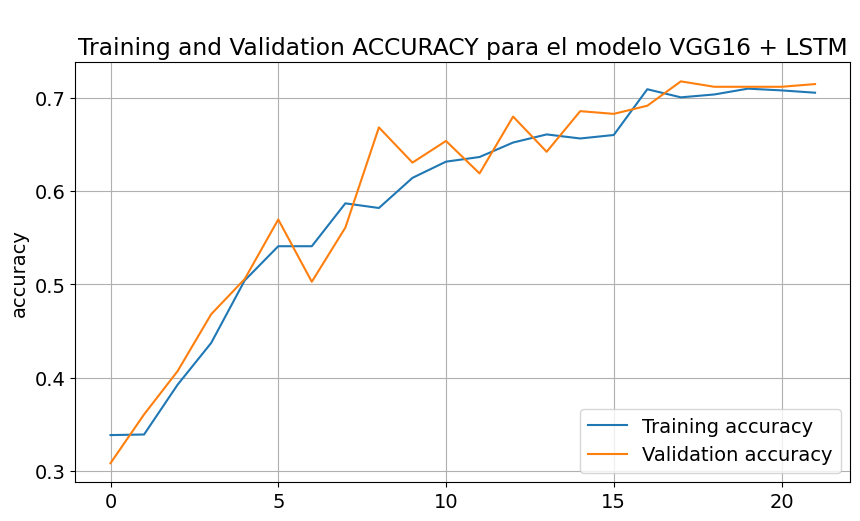

In [ ]:
accuracy = history['accuracy']
val_accuracy = history['val_accuracy']

# plot results
plt.figure(figsize=(10, 12))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(accuracy, label='Training accuracy')
plt.plot(val_accuracy, label='Validation accuracy')
plt.legend(loc='lower right')
plt.ylabel('accuracy')
plt.title(f'\nTraining and Validation ACCURACY para el modelo VGG16 + LSTM')

Text(0.5, 1.0, '\nTraining and Validation AUCPR para el modelo VGG16 + LSTM')

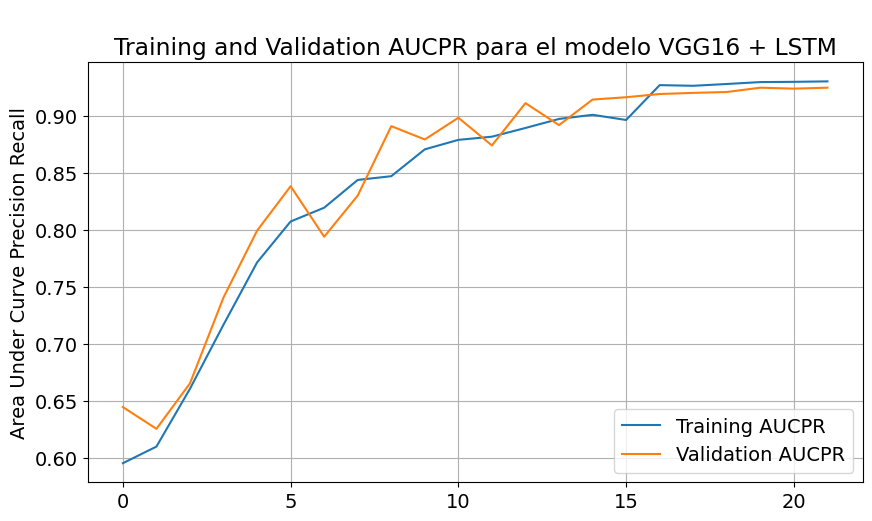

In [ ]:
aucpr = history['auprc']
val_aucpr = history['val_auprc']

# plot results
plt.figure(figsize=(10, 12))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(aucpr, label='Training AUCPR')
plt.plot(val_aucpr, label='Validation AUCPR')
plt.legend(loc='lower right')
plt.ylabel('Area Under Curve Precision Recall')
plt.title(f'\nTraining and Validation AUCPR para el modelo VGG16 + LSTM')

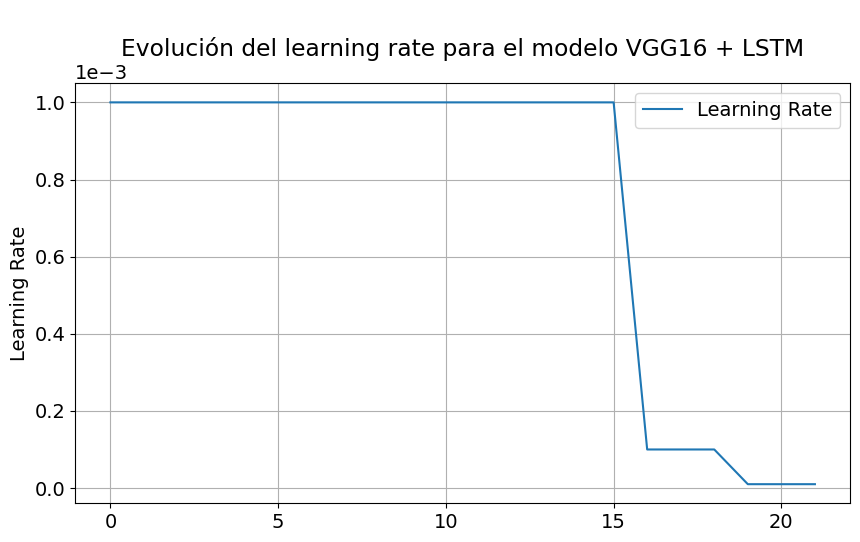

In [ ]:
lr_hist = history['lr']

plt.figure(figsize=(10, 12))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(lr_hist, label='Learning Rate')
plt.legend(loc='upper right')
plt.ylabel('Learning Rate')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.title(f'\nEvolución del learning rate para el modelo VGG16 + LSTM')

plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

#### 4.6 VGG16 + 2 LSTM

In [ ]:
model_vgg16_2lstm = tf.keras.models.load_model("modelos_trained/model_vgg16_2lstm_4clases_8num_timesteps_8batch_size.h5")

with open("modelos_trained/model_vgg16_2lstm_4clases_8num_timesteps_8batch_size.pkl", "rb") as f:
    history = pickle.load(f)

Text(0.5, 1.0, '\nTraining and Validation AUC para el modelo VGG16 + 2 LSTM')

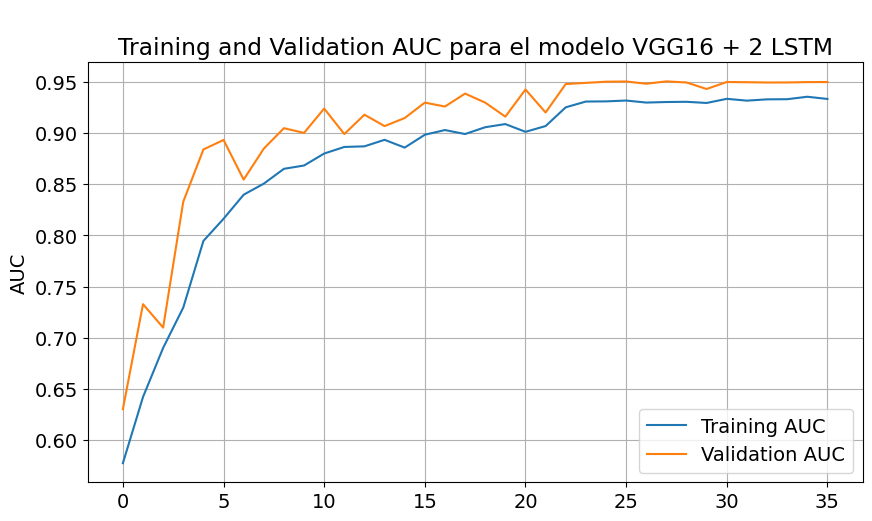

In [ ]:
#store results
auc = history['auroc']
val_auc = history['val_auroc']


# plot results
plt.figure(figsize=(10, 12))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(auc, label='Training AUC')
plt.plot(val_auc, label='Validation AUC')
plt.legend(loc='lower right')
plt.ylabel('AUC')
plt.title(f'\nTraining and Validation AUC para el modelo VGG16 + 2 LSTM')

Text(0.5, 1.0, '\nTraining and Validation LOSS para el modelo VGG16 + 2 LSTM')

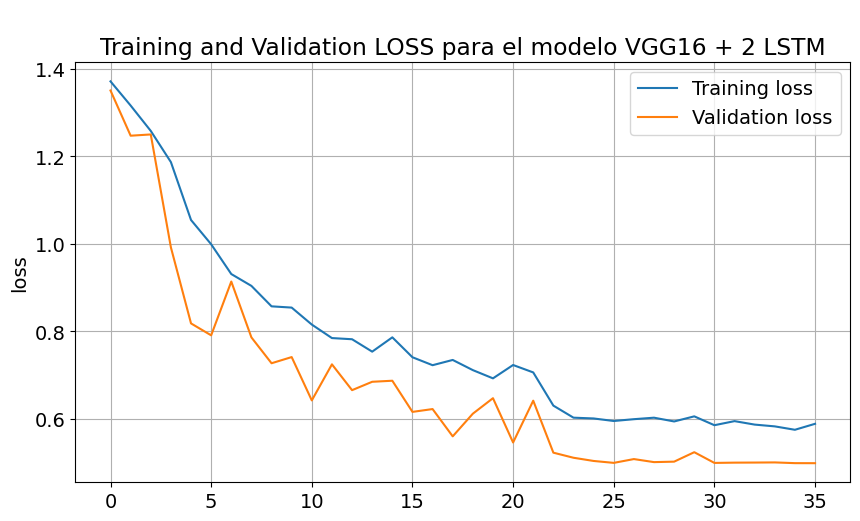

In [ ]:
loss = history['loss']
val_loss = history['val_loss']

# plot results
plt.figure(figsize=(10, 12))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.legend(loc='upper right')
plt.ylabel('loss')
plt.title(f'\nTraining and Validation LOSS para el modelo VGG16 + 2 LSTM')

Text(0.5, 1.0, '\nTraining and Validation ACCURACY para el modelo VGG16 + 2 LSTM')

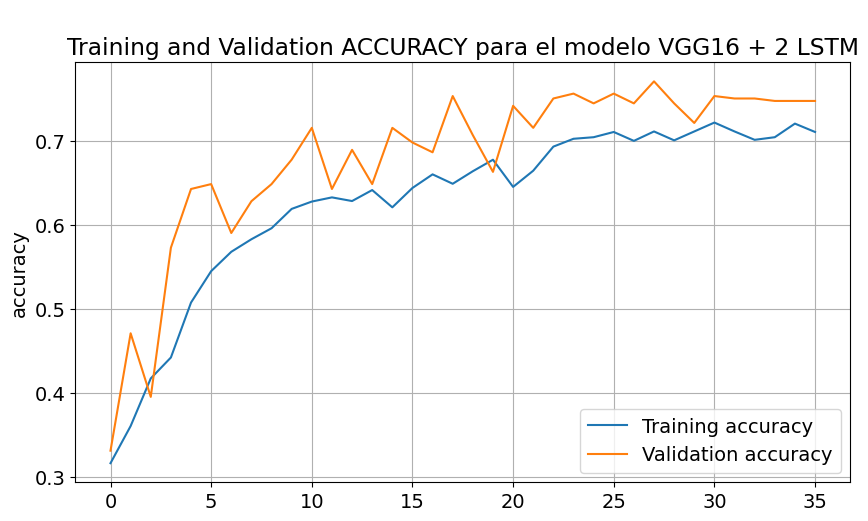

In [ ]:
accuracy = history['accuracy']
val_accuracy = history['val_accuracy']

# plot results
plt.figure(figsize=(10, 12))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(accuracy, label='Training accuracy')
plt.plot(val_accuracy, label='Validation accuracy')
plt.legend(loc='lower right')
plt.ylabel('accuracy')
plt.title(f'\nTraining and Validation ACCURACY para el modelo VGG16 + 2 LSTM')

Text(0.5, 1.0, '\nTraining and Validation AUCPR para el modelo VGG16 + 2 LSTM')

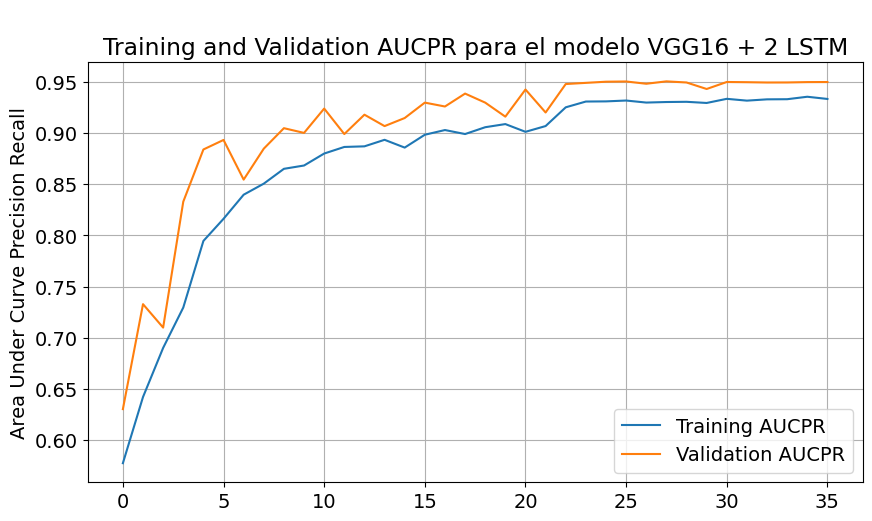

In [ ]:
aucpr = history['auprc']
val_aucpr = history['val_auprc']

# plot results
plt.figure(figsize=(10, 12))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(aucpr, label='Training AUCPR')
plt.plot(val_aucpr, label='Validation AUCPR')
plt.legend(loc='lower right')
plt.ylabel('Area Under Curve Precision Recall')
plt.title(f'\nTraining and Validation AUCPR para el modelo VGG16 + 2 LSTM')

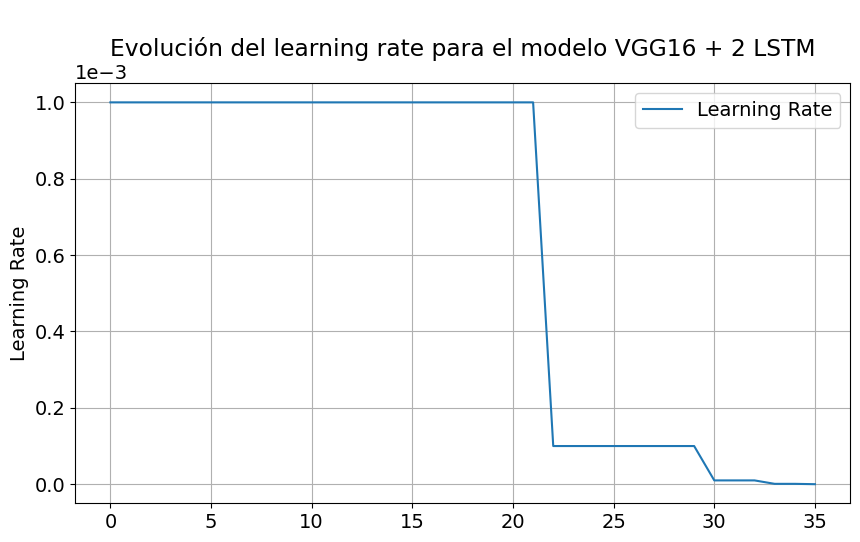

In [ ]:
lr_hist = history['lr']

plt.figure(figsize=(10, 12))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(lr_hist, label='Learning Rate')
plt.legend(loc='upper right')
plt.ylabel('Learning Rate')
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.title(f'\nEvolución del learning rate para el modelo VGG16 + 2 LSTM')

plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

#### 4.7 AUTOENCODERS

##### 4.7.1 AUTOENCODER 5k

In [16]:
with open("modelos_trained/autoencoder_5k_256dim.pkl", "rb") as f:
    history = pickle.load(f)

In [17]:
history.keys()

dict_keys(['loss', 'mean_absolute_error', 'accuracy', 'val_loss', 'val_mean_absolute_error', 'val_accuracy', 'lr'])

Text(0.5, 1.0, '\nLOSS en entrenamiento y validación para el modelo AUTOENCODER DE 5k parámetros')

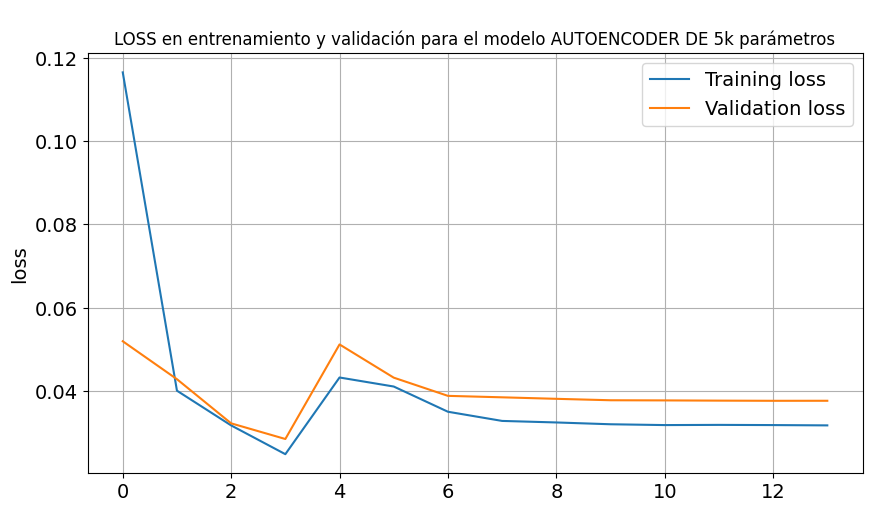

In [18]:
loss = history['loss']
val_loss = history['val_loss']

# plot results
plt.figure(figsize=(10, 12))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.legend(loc='upper right')
plt.ylabel('loss')
plt.title(f'\nLOSS en entrenamiento y validación para el modelo AUTOENCODER DE 5k parámetros',size=12)

Text(0.5, 1.0, '\nMAE en entrenamiento y validación para el modelo AUTOENCODER DE 5k parámetros')

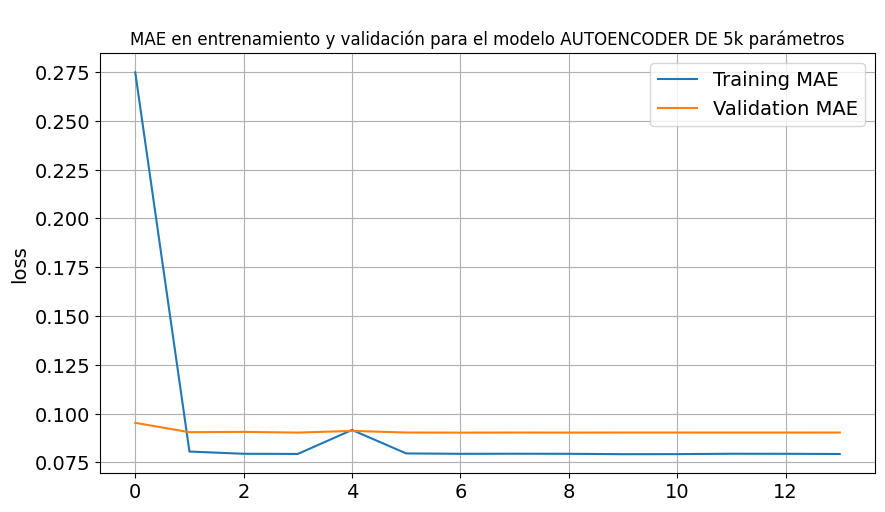

In [19]:
loss = history['mean_absolute_error']
val_loss = history['val_mean_absolute_error']

# plot results
plt.figure(figsize=(10, 12))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(loss, label='Training MAE')
plt.plot(val_loss, label='Validation MAE')
plt.legend(loc='upper right')
plt.ylabel('loss')
plt.title(f'\nMAE en entrenamiento y validación para el modelo AUTOENCODER DE 5k parámetros',size=12)

Text(0.5, 1.0, '\nACCURACY en entrenamiento y validación para el modelo AUTOENCODER DE 5k parámetros')

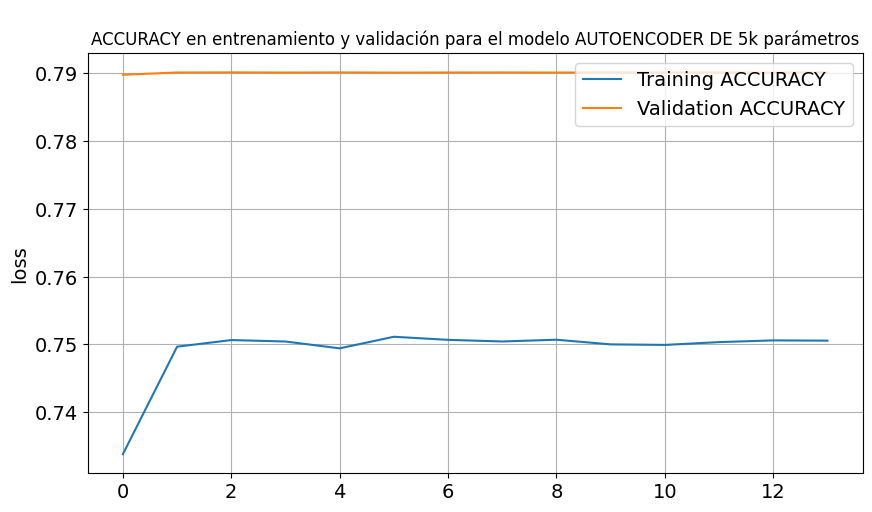

In [20]:
loss = history['accuracy']
val_loss = history['val_accuracy']

# plot results
plt.figure(figsize=(10, 12))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(loss, label='Training ACCURACY')
plt.plot(val_loss, label='Validation ACCURACY')
plt.legend(loc='upper right')
plt.ylabel('loss')
plt.title(f'\nACCURACY en entrenamiento y validación para el modelo AUTOENCODER DE 5k parámetros',size=12)

##### 4.7.2 AUTOENCODER 300k

In [ ]:
model_autoencoder = tf.keras.models.load_model("/content/autoencoder_300kparams_64batch.h5")

with open("/content/autoencoder_300kparams_64batch.pkl", "rb") as f:
    history = pickle.load(f)

In [ ]:
history.keys()

In [ ]:
loss = history['loss']
val_loss = history['val_loss']

# plot results
plt.figure(figsize=(10, 12))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.legend(loc='upper right')
plt.ylabel('loss')
plt.title(f'\nLOSS en entrenamiento y validación para el modelo AUTOENCODER DE 300k parámetros',size=12)

#### 4.8 UNET

In [24]:
unet = tf.keras.models.load_model("modelos_trained/unet_16batch_256dim.h5",compile=False)

with open("modelos_trained/unet_16batch_256dim.pkl", "rb") as f:
    history = pickle.load(f)

In [25]:
history.keys()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error', 'lr'])

Text(0.5, 1.0, '\nLOSS en entrenamiento y validación para el modelo UNET')

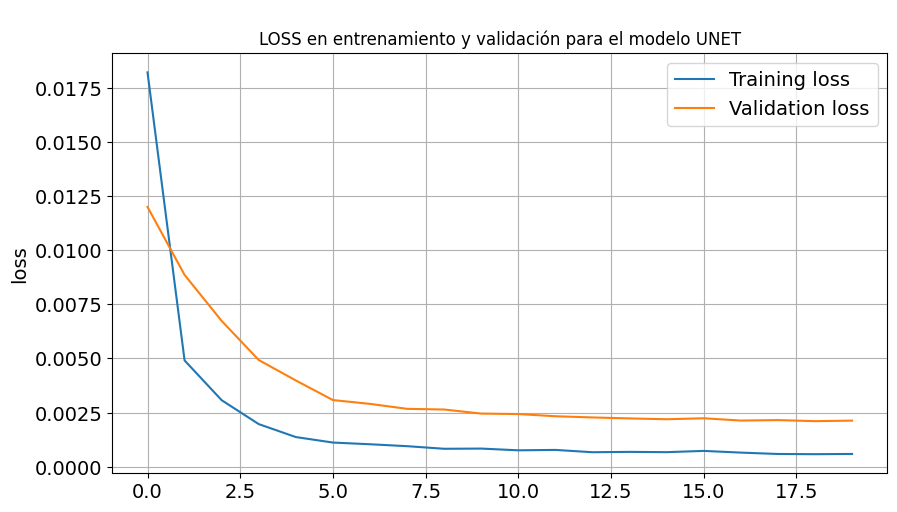

In [26]:
loss = history['loss']
val_loss = history['val_loss']

# plot results
plt.figure(figsize=(10, 12))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.legend(loc='upper right')
plt.ylabel('loss')
plt.title(f'\nLOSS en entrenamiento y validación para el modelo UNET',size=12)

Text(0.5, 1.0, '\nMAE en entrenamiento y validación para el modelo UNET')

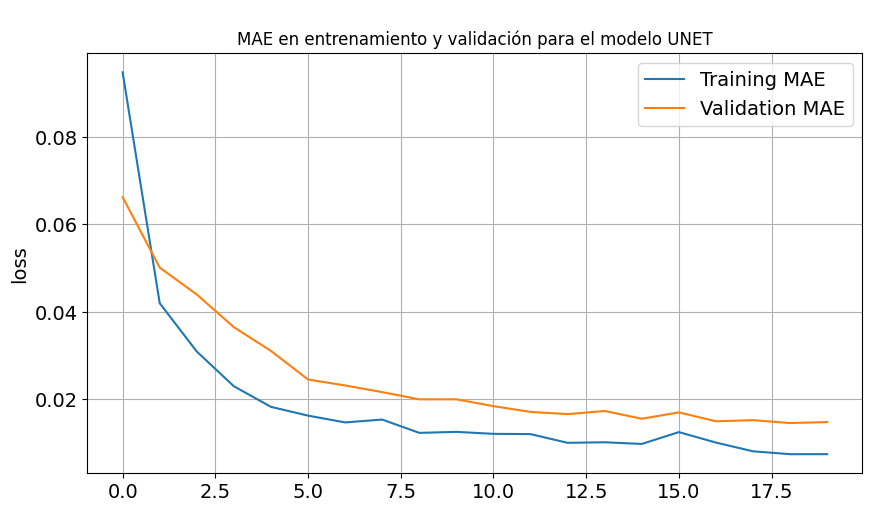

In [27]:
loss = history['mean_absolute_error']
val_loss = history['val_mean_absolute_error']

# plot results
plt.figure(figsize=(10, 12))
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.facecolor'] = 'white'
plt.subplot(2, 1, 1)
plt.plot(loss, label='Training MAE')
plt.plot(val_loss, label='Validation MAE')
plt.legend(loc='upper right')
plt.ylabel('loss')
plt.title(f'\nMAE en entrenamiento y validación para el modelo UNET',size=12)

### 5. PREDICCIONES

Las curvas ROC se utilizan normalmente en la clasificación binaria, donde el TPR y el FPR puede definirse sin ambigüedades. En el caso de la clasificación multiclase, una noción de TPR o FPR se obtiene solo después de binarizar la salida. Lo haremos de la siguiente forma:

- Esquema de Uno contra Resto compara cada clase con todas las demás (asumido como uno);

Diferencias entre micro y macro promediado

- Micro AUC: Trata el problema multiclase como un problema de clasificación binaria, donde cada instancia se considera como un punto para alguna de las clases. Se calcula considerando cada predicción como una única contribución independientemente de la clase a la que pertenece.

- Macro AUC: Se calcula el AUC para cada clase y luego se toma el promedio de estos AUCs.

Ventajas del Micro Promedio respecto a Macro Promedio:

- Incorpora Imbalance: Da más peso a las clases con más muestras.
Adecuado para Desequilibrios: Es útil cuando hay un desequilibrio significativo entre las clases.

#### 5.1 INCEPTION

8/8 [==============================] - 213s 23s/step
ROC AUC score: 0.8598259294265912


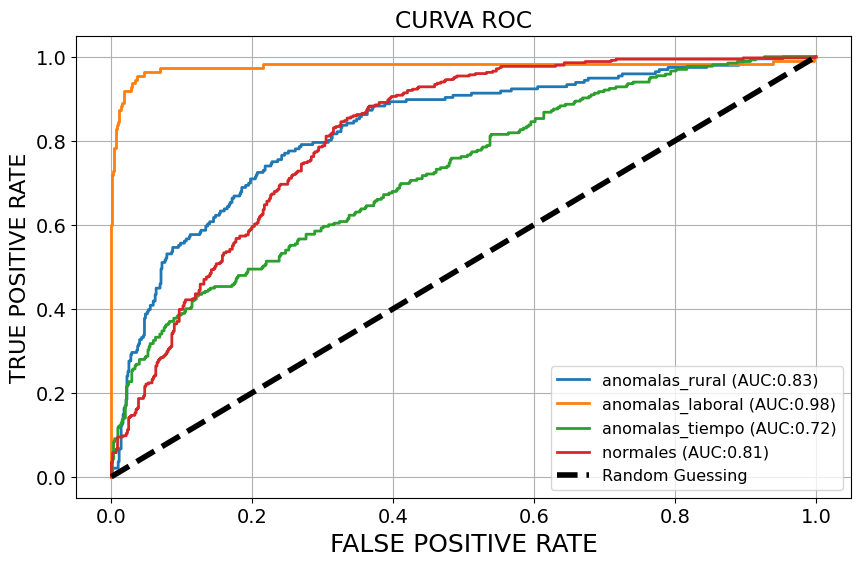

In [ ]:
preds = model_inception.predict(test_generator)
y_test = test_generator.classes
fig, c_ax = plt.subplots(1,1, figsize = (10,6))

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    for (idx, c_label) in enumerate(CLASS_LABELS):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr,lw=2, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'black',linestyle='dashed', lw=4, label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)

print('ROC AUC score:', multiclass_roc_auc_score(y_test , preds  , average = "micro"))
plt.xlabel('FALSE POSITIVE RATE', fontsize=18)
plt.ylabel('TRUE POSITIVE RATE', fontsize=16)
plt.legend(fontsize = 11.5)
plt.title("CURVA ROC INCEPTION")
plt.show()

In [ ]:
micro_roc_auc_ovr = roc_auc_score(
    y_test,
    preds,
    multi_class="ovr",
    average="micro",
)

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{micro_roc_auc_ovr:.2f}")

Micro-averaged One-vs-Rest ROC AUC score:
0.86


In [ ]:
print(y_test.shape)

print(preds.shape)

(920,)
(920, 4)


Matriz de confusión

115/115 [==============================] - 77s 646ms/step


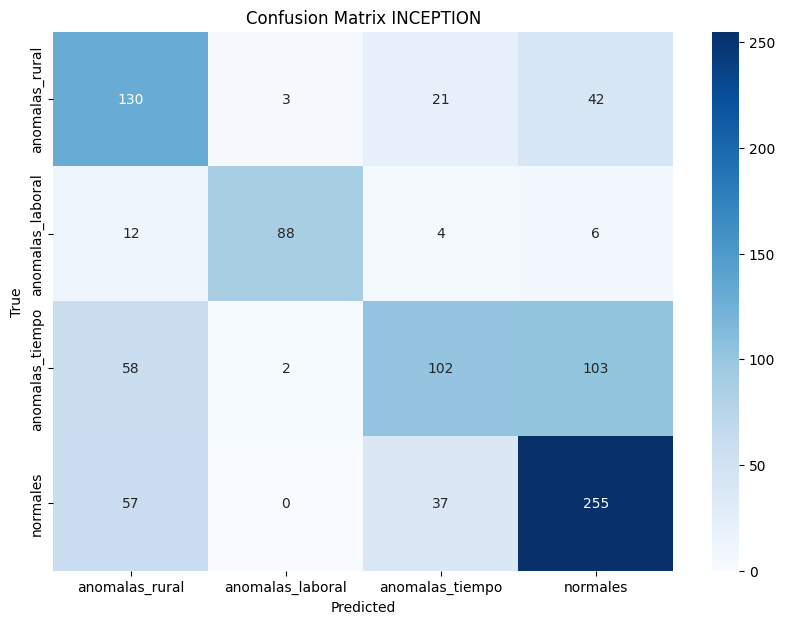

In [9]:
# Calcular la matriz de confusión
preds = model_inception.predict(test_generator)
y_test = test_generator.classes
y_pred = np.argmax(preds, axis=1)

cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión usando seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=CLASS_LABELS, yticklabels=CLASS_LABELS,linewidths=0)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix INCEPTION')
plt.show()

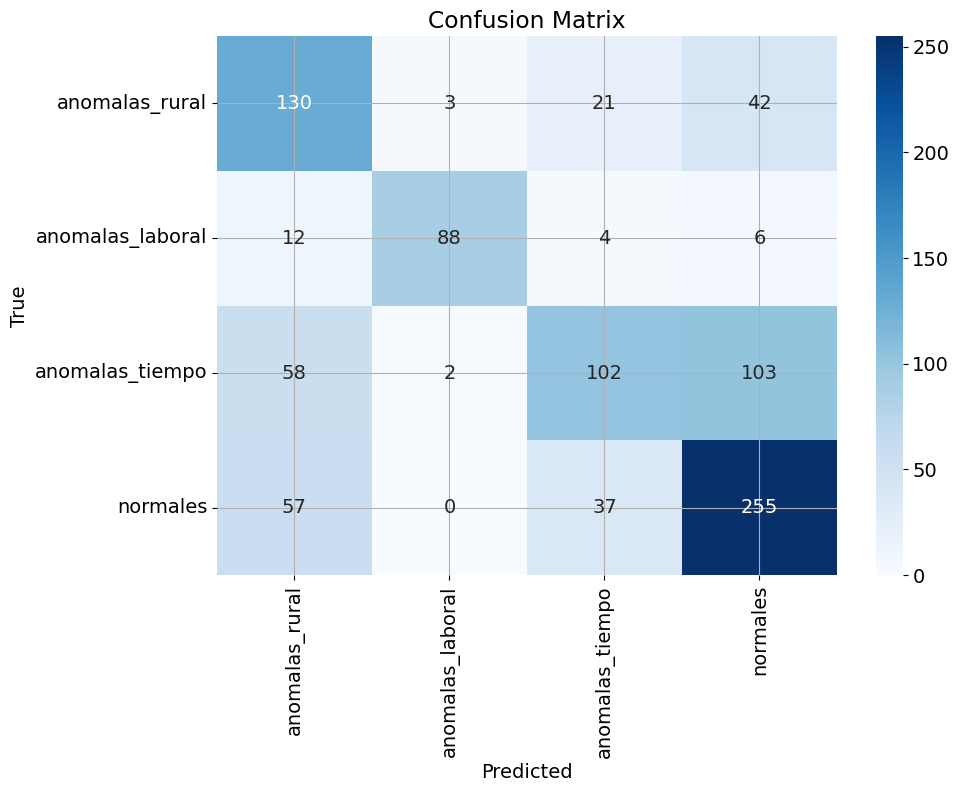

In [ ]:
# Calcular la matriz de confusión
y_pred = np.argmax(preds, axis=1)

cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión usando seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=CLASS_LABELS, yticklabels=CLASS_LABELS,,linewidths=0))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix INCEPTION')
plt.show()

REPORT

In [ ]:
# Obtener un reporte de clasificación que incluye precisión, recall y F1-score
# Convertir las probabilidades en etiquetas de clase
y_pred = np.argmax(preds, axis=1)

# Generar el reporte de clasificación
report = classification_report(y_test, y_pred, target_names=CLASS_LABELS)
print(report)

                  precision    recall  f1-score   support

anomalas_laboral       0.51      0.66      0.57       196
  anomalas_rural       0.95      0.80      0.87       110
 anomalas_tiempo       0.62      0.38      0.48       265
        normales       0.63      0.73      0.68       349

        accuracy                           0.62       920
       macro avg       0.68      0.64      0.65       920
    weighted avg       0.64      0.62      0.62       920



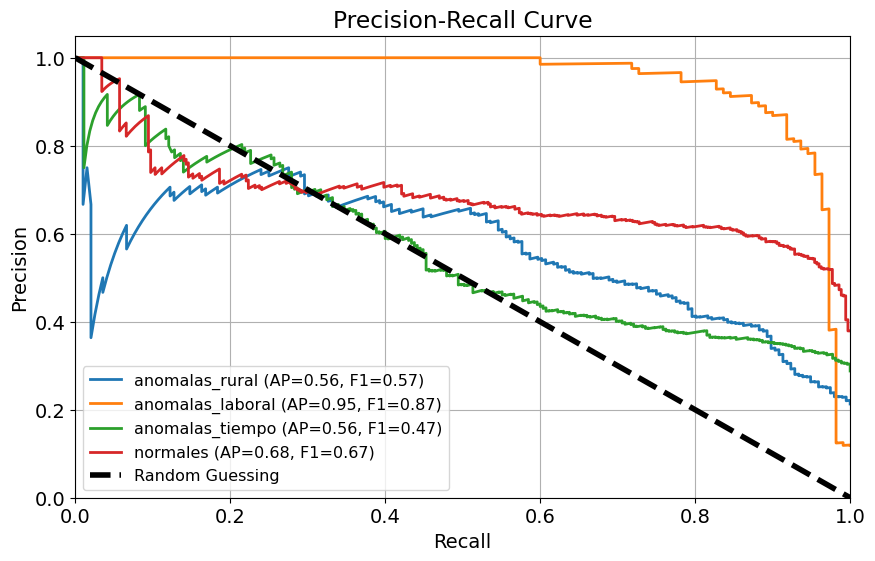

In [ ]:
fig, c_ax = plt.subplots(1,1, figsize = (10,6))


def multiclass_precision_recall_curve(y_test, y_pred):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    precision = dict()
    recall = dict()
    f1_scores = dict()
    average_precision = dict()
    for (idx, c_label) in enumerate(CLASS_LABELS):
        precision[idx], recall[idx], _ = precision_recall_curve(y_test[:,idx], y_pred[:,idx])
        average_precision[idx] = auc(recall[idx], precision[idx])
        f1_scores[idx] = f1_score(y_test[:,idx], np.round(y_pred[:,idx]))
        plt.plot(recall[idx], precision[idx], lw=2, label='%s (AP=%0.2f, F1=%0.2f)' % (c_label, average_precision[idx], f1_scores[idx]))
    plt.plot([0,1], [1,0], 'black',linestyle='dashed', lw=4, label = 'Random Guessing')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Curve INCEPTION')
    plt.legend(fontsize = 11.5, loc="lower left")
    plt.show()

multiclass_precision_recall_curve(y_test, preds)

**CURVA ROC vs CURVA PR**

- Curva PR o el Average Precision cuando tengamos problemas de datasets no balanceados, es decir, cuando la clase positiva ocurre pocas veces. Cuando hay pocos ejemplos positivos, la curva ROC o el ROC AUC puede dar un valor alto, sin embargo, la curva PR estará lejos de su valor óptimo, poniendo de manifiesto un indicador de precisión relacionado con la baja probabilidad de la clase positiva.

- Curva ROC y el ROC AUC cuando tengamos un dataset más balanceado o queramos poner de manifiesto un indicador más relacionado con falsas alarmas (falsos positivos).

**AVERAGE PRECISION vs F1-SCORE**

- Average Precision: Útil para evaluar la calidad de las clasificaciones positivas y negativas en todos los niveles de recall.

- F1-score: Útil como una métrica única que resume el equilibrio entre precisión y recall.

#### 5.2 DENSENET

115/115 [==============================] - 99s 828ms/step
ROC AUC score: 0.8303922495274101


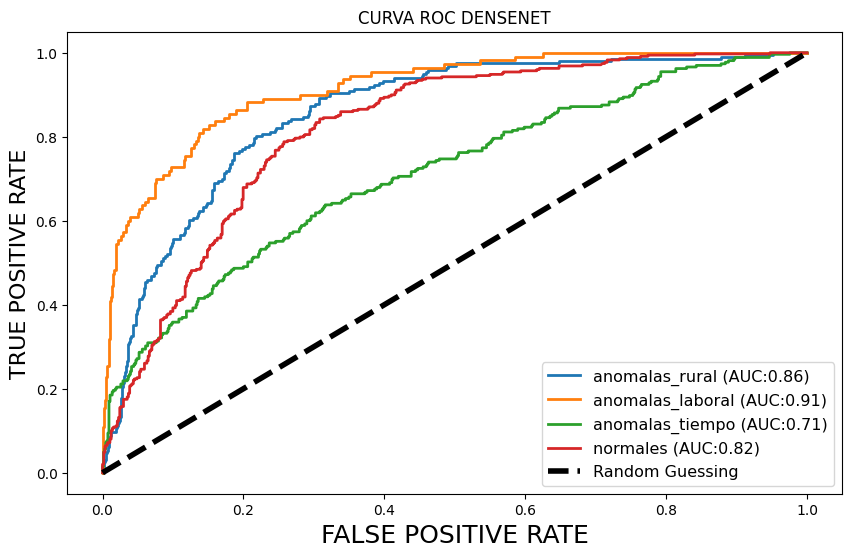

In [19]:
preds = model_densenet.predict(test_generator)
y_test = test_generator.classes
fig, c_ax = plt.subplots(1,1, figsize = (10,6))

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    for (idx, c_label) in enumerate(CLASS_LABELS):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr,lw=2, label = '%s (AUC:%0.2f)'  % (c_label, sklearn_auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'black',linestyle='dashed', lw=4, label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)

print('ROC AUC score:', multiclass_roc_auc_score(y_test , preds  , average = "micro"))
plt.xlabel('FALSE POSITIVE RATE', fontsize=18)
plt.ylabel('TRUE POSITIVE RATE', fontsize=16)
plt.legend(fontsize = 11.5)
plt.title("CURVA ROC DENSENET")
plt.show()

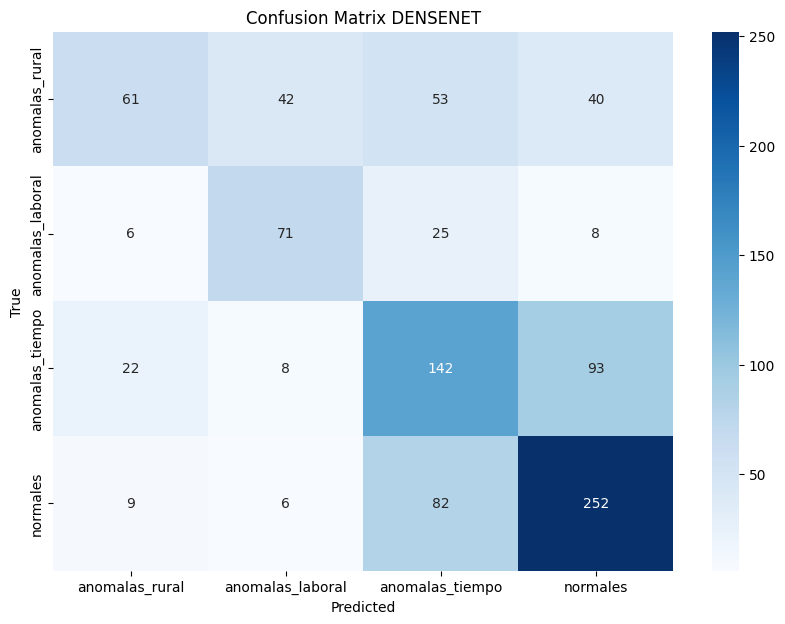

In [21]:
# Calcular la matriz de confusión
y_pred = np.argmax(preds, axis=1)

cm = confusion_matrix(y_test, y_pred)


# Visualizar la matriz de confusión usando seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=CLASS_LABELS, yticklabels=CLASS_LABELS)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix DENSENET')
plt.show()

In [ ]:
# Convertir las probabilidades en etiquetas de clase
y_pred = np.argmax(preds, axis=1)

# Generar el reporte de clasificación
report = classification_report(y_test, y_pred, target_names=CLASS_LABELS)
print(report)

                  precision    recall  f1-score   support

anomalas_laboral       0.61      0.52      0.56       196
  anomalas_rural       0.93      0.84      0.88       110
 anomalas_tiempo       0.51      0.46      0.49       265
        normales       0.64      0.76      0.69       349

        accuracy                           0.63       920
       macro avg       0.67      0.64      0.65       920
    weighted avg       0.63      0.63      0.63       920



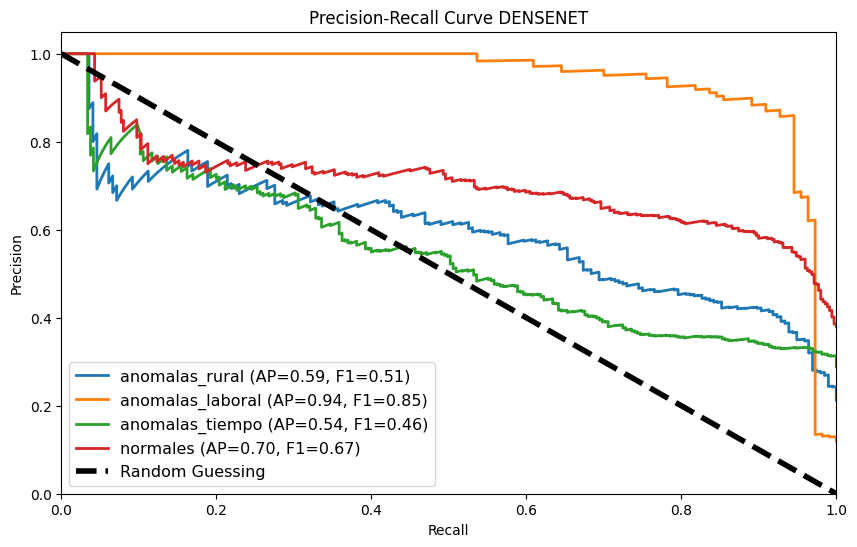

In [ ]:
fig, c_ax = plt.subplots(1,1, figsize = (10,6))


def multiclass_precision_recall_curve(y_test, y_pred):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    precision = dict()
    recall = dict()
    f1_scores = dict()
    average_precision = dict()
    for (idx, c_label) in enumerate(CLASS_LABELS):
        precision[idx], recall[idx], _ = precision_recall_curve(y_test[:,idx], y_pred[:,idx])
        average_precision[idx] = auc(recall[idx], precision[idx])
        f1_scores[idx] = f1_score(y_test[:,idx], np.round(y_pred[:,idx]))
        plt.plot(recall[idx], precision[idx], lw=2, label='%s (AP=%0.2f, F1=%0.2f)' % (c_label, average_precision[idx], f1_scores[idx]))
    plt.plot([0,1], [1,0], 'black',linestyle='dashed', lw=4, label = 'Random Guessing')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Curve DENSENET')
    plt.legend(fontsize = 11.5, loc="lower left")
    plt.show()

multiclass_precision_recall_curve(y_test, preds)

#### 5.3 VGG-16

29/29 [==============================] - 51s 2s/step
ROC AUC score: 0.8768816950220542


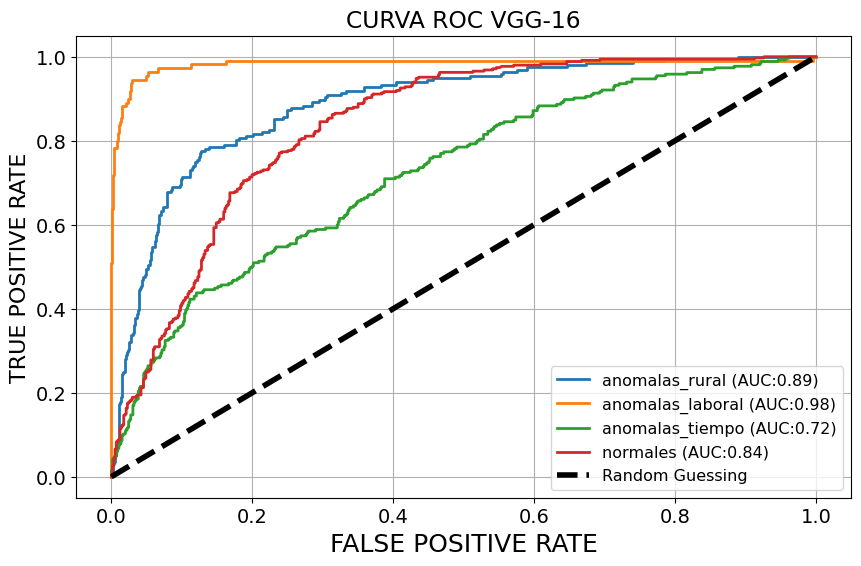

In [ ]:
preds = model_vgg.predict(test_generator)
y_test = test_generator.classes
fig, c_ax = plt.subplots(1,1, figsize = (10,6))

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    for (idx, c_label) in enumerate(CLASS_LABELS):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr,lw=2, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'black',linestyle='dashed', lw=4, label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)

print('ROC AUC score:', multiclass_roc_auc_score(y_test , preds  , average = "micro"))
plt.xlabel('FALSE POSITIVE RATE', fontsize=18)
plt.ylabel('TRUE POSITIVE RATE', fontsize=16)
plt.legend(fontsize = 11.5)
plt.title("CURVA ROC VGG-16")
plt.show()

115/115 [==============================] - 181s 2s/step


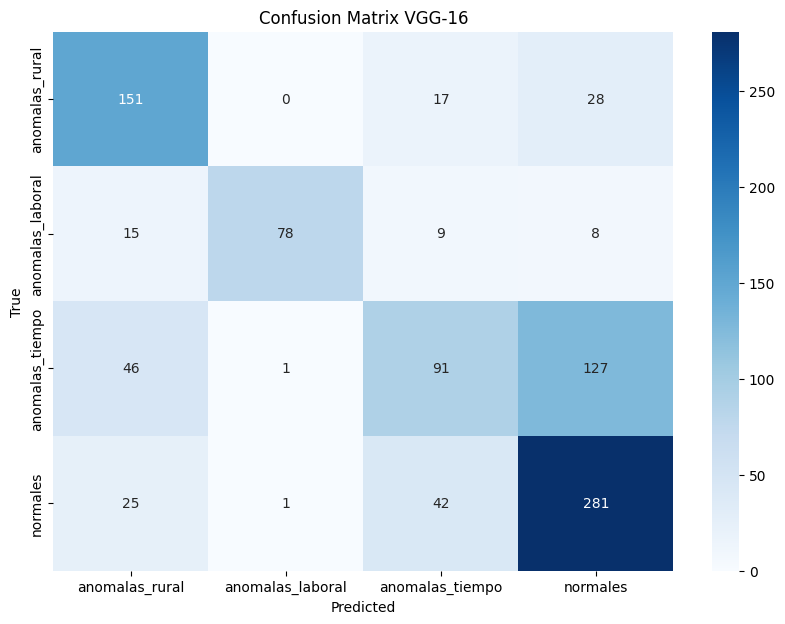

In [7]:
# Calcular la matriz de confusión
preds = model_vgg.predict(test_generator)
y_test = test_generator.classes
y_pred = np.argmax(preds, axis=1)

cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión usando seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=CLASS_LABELS, yticklabels=CLASS_LABELS,linewidths=0)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix VGG-16')
plt.show()

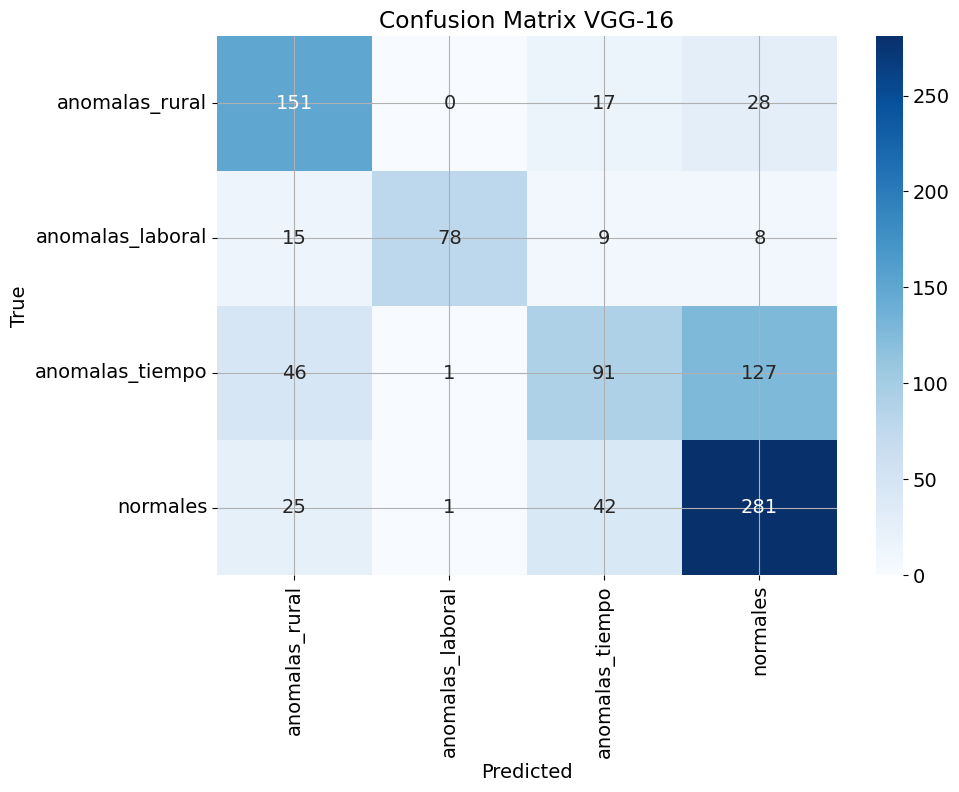

In [ ]:
# Calcular la matriz de confusión
y_pred = np.argmax(preds, axis=1)

cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión usando seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=CLASS_LABELS, yticklabels=CLASS_LABELS)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix VGG-16')
plt.show()

In [ ]:
# Convertir las probabilidades en etiquetas de clase
y_pred = np.argmax(preds, axis=1)

# Generar el reporte de clasificación
report = classification_report(y_test, y_pred, target_names=CLASS_LABELS)
print(report)

                  precision    recall  f1-score   support

anomalas_laboral       0.64      0.77      0.70       196
  anomalas_rural       0.97      0.71      0.82       110
 anomalas_tiempo       0.57      0.34      0.43       265
        normales       0.63      0.81      0.71       349

        accuracy                           0.65       920
       macro avg       0.70      0.66      0.66       920
    weighted avg       0.66      0.65      0.64       920



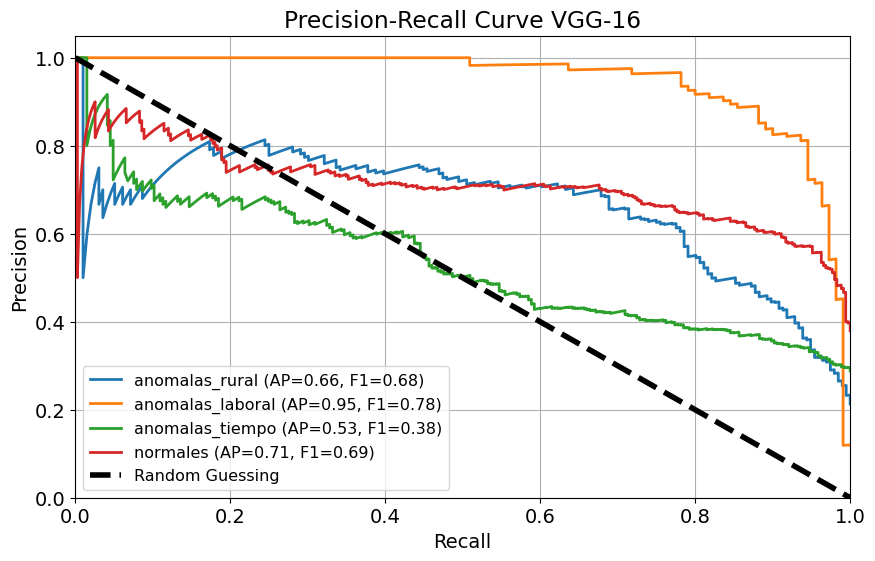

In [ ]:
fig, c_ax = plt.subplots(1,1, figsize = (10,6))


def multiclass_precision_recall_curve(y_test, y_pred):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    precision = dict()
    recall = dict()
    f1_scores = dict()
    average_precision = dict()
    for (idx, c_label) in enumerate(CLASS_LABELS):
        precision[idx], recall[idx], _ = precision_recall_curve(y_test[:,idx], y_pred[:,idx])
        average_precision[idx] = auc(recall[idx], precision[idx])
        f1_scores[idx] = f1_score(y_test[:,idx], np.round(y_pred[:,idx]))
        plt.plot(recall[idx], precision[idx], lw=2, label='%s (AP=%0.2f, F1=%0.2f)' % (c_label, average_precision[idx], f1_scores[idx]))
    plt.plot([0,1], [1,0], 'black',linestyle='dashed', lw=4, label = 'Random Guessing')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Curve VGG-16')
    plt.legend(fontsize = 11.5, loc="lower left")
    plt.show()

multiclass_precision_recall_curve(y_test, preds)

#### 5.4 VGG16 + GRU

(224, 4)
(224, 4)
(224, 4)
[[508 164]
 [164  60]]
ROC AUC score: 0.5119047619047619


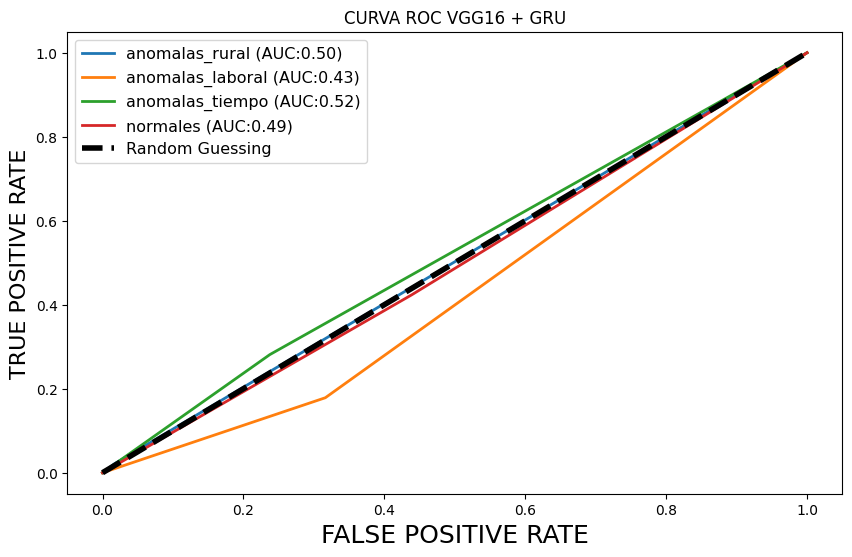

In [ ]:
preds = model_vgg16_gru_final.predict(test_seq_generator)
preds_one_hot = np.eye(NUM_CLASSES)[np.argmax(preds, axis=1)]
y_test = np.concatenate([test_seq_generator[i][1] for i in range(len(test_seq_generator))])
#y_test = np.concatenate([np.argmax(test_seq_generator[i][1], axis=1) for i in range(len(test_seq_generator))])

print(preds.shape)
print(preds_one_hot.shape)
print(y_test.shape)


fig, c_ax = plt.subplots(1,1, figsize = (10,6))

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = np.array(y_pred)
    for (idx, c_label) in enumerate(CLASS_LABELS):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr,lw=2, label = '%s (AUC:%0.2f)'  % (c_label, sklearn_auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'black',linestyle='dashed', lw=4, label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)

print('ROC AUC score:', multiclass_roc_auc_score(y_test , preds_one_hot  , average = "micro"))
plt.xlabel('FALSE POSITIVE RATE', fontsize=18)
plt.ylabel('TRUE POSITIVE RATE', fontsize=16)
plt.legend(fontsize = 11.5)
plt.title("CURVA ROC VGG16 + GRU")
plt.show()

86/86 [==============================] - 75s 872ms/step
(344, 4)
(344, 4)
ROC AUC score: 0.9221200648999459


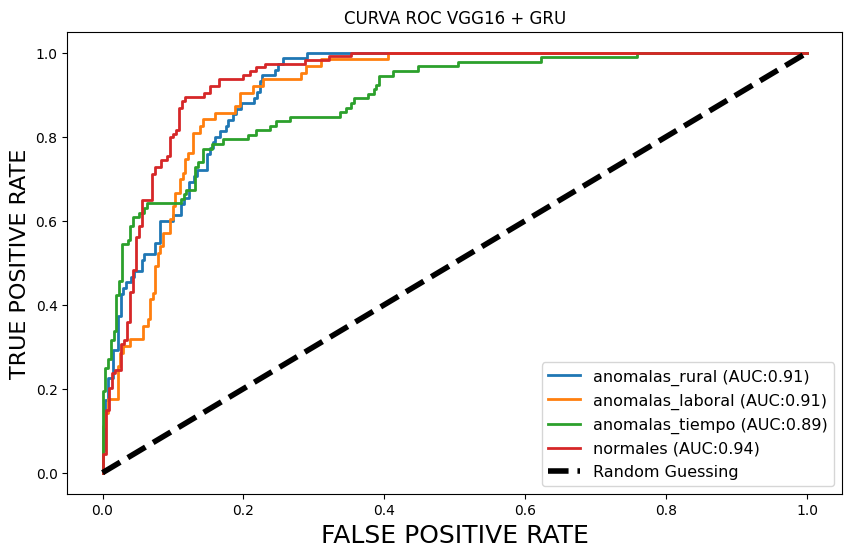

In [ ]:
preds = model_vgg16_gru_final.predict(test_seq_generator)
y_test = np.concatenate([test_seq_generator[i][1] for i in range(len(test_seq_generator))])
print(y_test.shape)
print(preds.shape)
fig, c_ax = plt.subplots(1,1, figsize = (10,6))

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = np.array(y_pred)
    for (idx, c_label) in enumerate(CLASS_LABELS):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr,lw=2, label = '%s (AUC:%0.2f)'  % (c_label, sklearn_auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'black',linestyle='dashed', lw=4, label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)

print('ROC AUC score:', multiclass_roc_auc_score(y_test , preds  , average = "micro"))
plt.xlabel('FALSE POSITIVE RATE', fontsize=18)
plt.ylabel('TRUE POSITIVE RATE', fontsize=16)
plt.legend(fontsize = 11.5)
plt.title("CURVA ROC VGG16 + GRU")
plt.show()

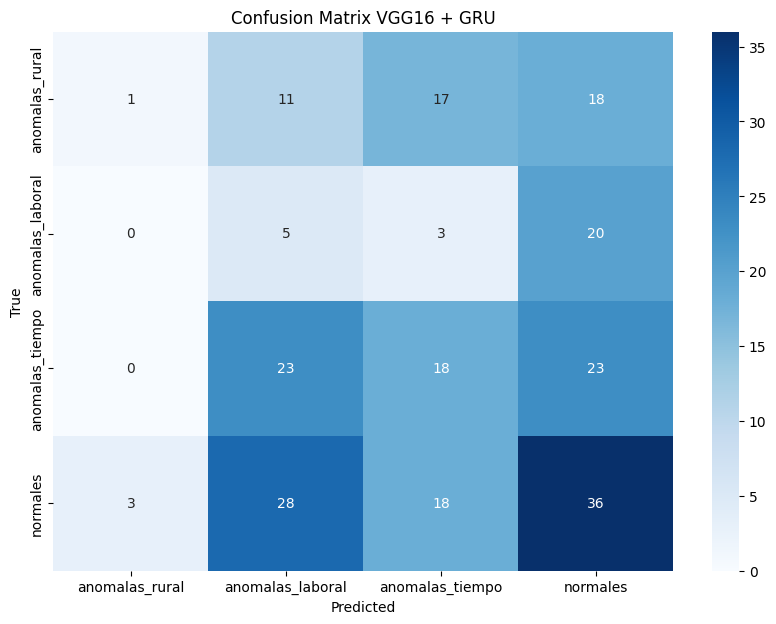

In [ ]:
# Calcular la matriz de confusión
y_pred = np.argmax(preds_one_hot, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_labels, y_pred)

# Visualizar la matriz de confusión usando seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=CLASS_LABELS, yticklabels=CLASS_LABELS)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix VGG16 + GRU')
plt.show()

In [ ]:
# Convertir las probabilidades en etiquetas de clase
y_pred = np.argmax(preds, axis=1)

# Las clases de tu problema (puedes obtener esto del generador o definirlo manualmente)
classes = list(test_seq_generator.class_indices.keys())  # ['Class 0', 'Class 1', 'Class 2', 'Class 3']

# Generar el reporte de clasificación
report = classification_report(y_test, y_pred, target_names=classes)
print(report)

                  precision    recall  f1-score   support

anomalas_laboral       0.00      0.00      0.00        47
  anomalas_rural       0.18      0.44      0.26        27
 anomalas_tiempo       0.29      0.24      0.26        66
        normales       0.40      0.48      0.44        84

        accuracy                           0.30       224
       macro avg       0.22      0.29      0.24       224
    weighted avg       0.26      0.30      0.27       224



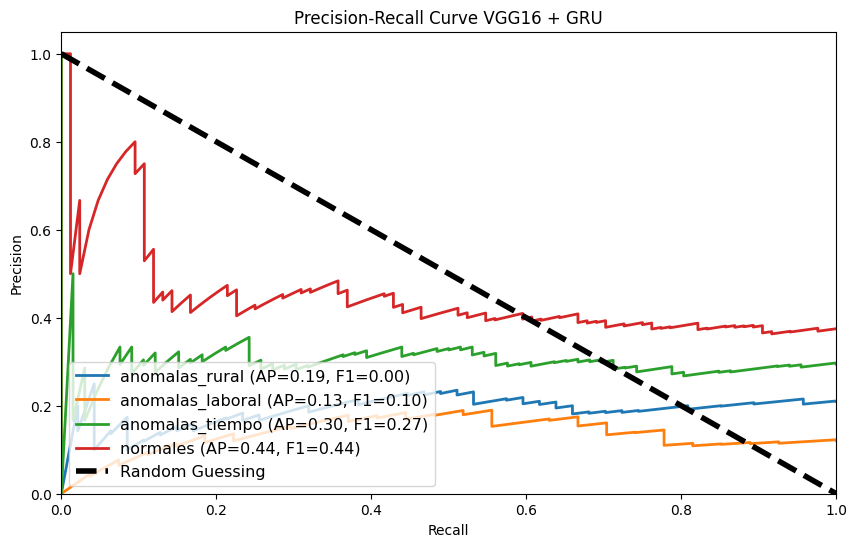

In [ ]:
fig, c_ax = plt.subplots(1,1, figsize = (10,6))


def multiclass_precision_recall_curve(y_test, y_pred):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    precision = dict()
    recall = dict()
    f1_scores = dict()
    average_precision = dict()
    for (idx, c_label) in enumerate(CLASS_LABELS):
        precision[idx], recall[idx], _ = precision_recall_curve(y_test[:,idx], y_pred[:,idx])
        average_precision[idx] = auc(recall[idx], precision[idx])
        f1_scores[idx] = f1_score(y_test[:,idx], np.round(y_pred[:,idx]))
        plt.plot(recall[idx], precision[idx], lw=2, label='%s (AP=%0.2f, F1=%0.2f)' % (c_label, average_precision[idx], f1_scores[idx]))
    plt.plot([0,1], [1,0], 'black',linestyle='dashed', lw=4, label = 'Random Guessing')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Curve VGG16 + GRU')
    plt.legend(fontsize = 11.5, loc="lower left")
    plt.show()

multiclass_precision_recall_curve(y_test, preds)

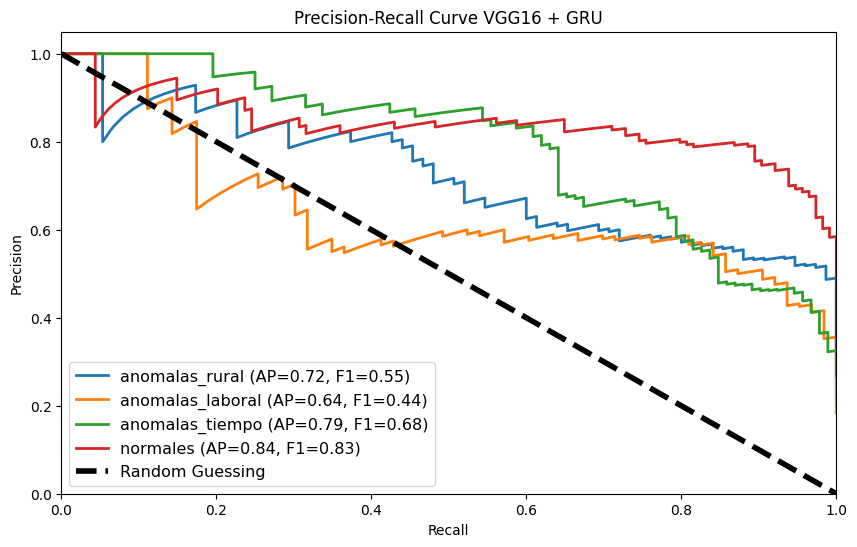

In [ ]:
fig, c_ax = plt.subplots(1,1, figsize = (10,6))


def multiclass_precision_recall_curve(y_test, y_pred):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    precision = dict()
    recall = dict()
    f1_scores = dict()
    average_precision = dict()
    for (idx, c_label) in enumerate(CLASS_LABELS):
        precision[idx], recall[idx], _ = precision_recall_curve(y_test[:,idx], y_pred[:,idx])
        average_precision[idx] = auc(recall[idx], precision[idx])
        f1_scores[idx] = f1_score(y_test[:,idx], np.round(y_pred[:,idx]))
        plt.plot(recall[idx], precision[idx], lw=2, label='%s (AP=%0.2f, F1=%0.2f)' % (c_label, average_precision[idx], f1_scores[idx]))
    plt.plot([0,1], [1,0], 'black',linestyle='dashed', lw=4, label = 'Random Guessing')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Curve VGG16 + GRU')
    plt.legend(fontsize = 11.5, loc="lower left")
    plt.show()

multiclass_precision_recall_curve(y_test, preds)

#### 5.5 VGG16 + LSTM

In [ ]:
model_vgg16_LSTM = tf.keras.models.load_model("modelos_trained/model_vgg16_lstm.h5")

with open("modelos_trained/model_vgg16_lstm.pkl", "rb") as f:
    history = pickle.load(f)

86/86 [==============================] - 76s 873ms/step
(344, 4)
(344, 4)
ROC AUC score: 0.5237600279430323


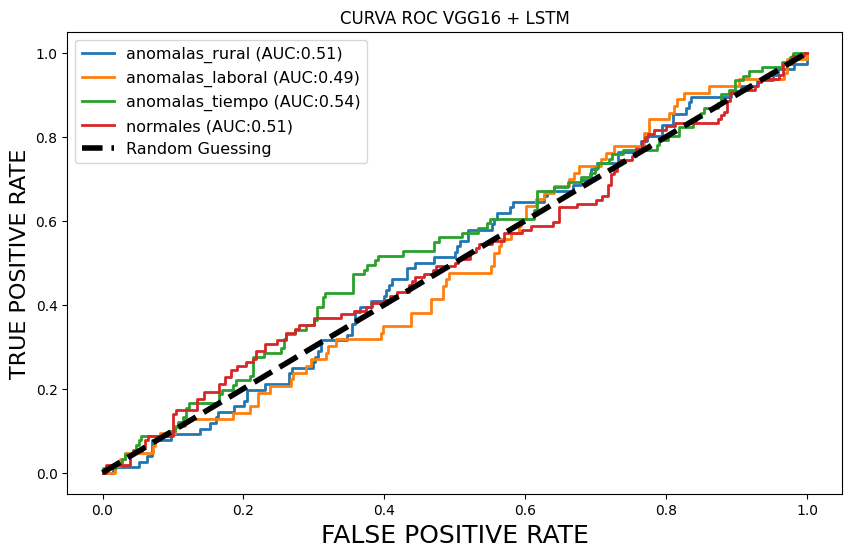

In [ ]:
preds = model_vgg16_LSTM.predict(test_seq_generator)
y_test = np.concatenate([test_seq_generator[i][1] for i in range(len(test_seq_generator))])
print(y_test.shape)
print(preds.shape)
fig, c_ax = plt.subplots(1,1, figsize = (10,6))

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    """
    Calcula la AUC-ROC para múltiples clases utilizando un esquema "one-vs-all" (OvA).

    Parámetros:
    y_test -- matriz de etiquetas reales (one-hot encoded).
    y_pred -- matriz de predicciones (probabilidades).
    average -- tipo de promedio para calcular el AUC-ROC final (por defecto: "macro").

    Retorna:
    AUC-ROC promedio.
    """
    # lb = LabelBinarizer()
    # lb.fit(y_test)
    # y_test = lb.transform(y_test)
    y_pred = np.array(y_pred)
    for (idx, c_label) in enumerate(CLASS_LABELS):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr,lw=2, label = '%s (AUC:%0.2f)'  % (c_label, sklearn_auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'black',linestyle='dashed', lw=4, label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)

print('ROC AUC score:', multiclass_roc_auc_score(y_test , preds  , average = "micro"))
plt.xlabel('FALSE POSITIVE RATE', fontsize=18)
plt.ylabel('TRUE POSITIVE RATE', fontsize=16)
plt.legend(fontsize = 11.5)
plt.title("CURVA ROC VGG16 + LSTM")
plt.show()

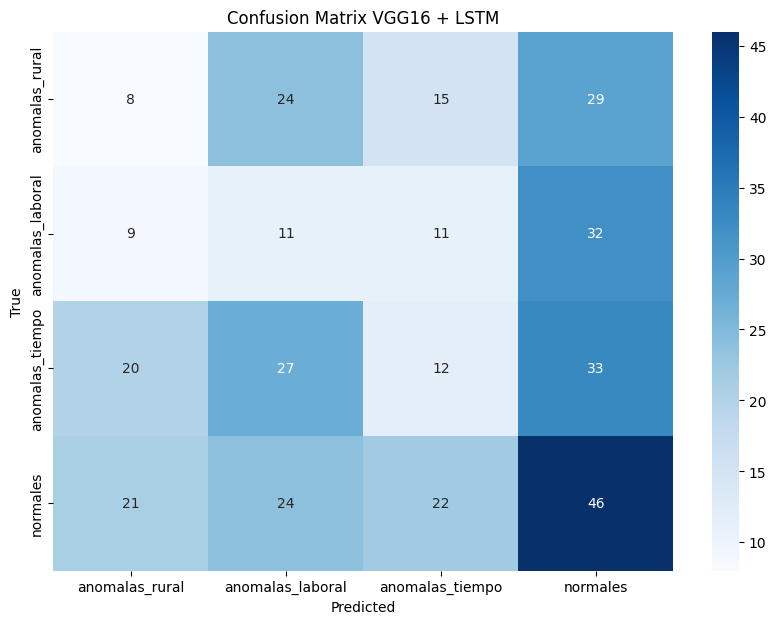

In [ ]:
# Calcular la matriz de confusión
y_pred = np.argmax(preds, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_labels, y_pred)

# Visualizar la matriz de confusión usando seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=CLASS_LABELS, yticklabels=CLASS_LABELS)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix VGG16 + LSTM')
plt.show()

In [ ]:
# Convertir las probabilidades en etiquetas de clase
y_pred = np.argmax(preds, axis=1)

# Las clases de tu problema (puedes obtener esto del generador o definirlo manualmente)
classes = list(test_seq_generator.class_indices.keys())  # ['Class 0', 'Class 1', 'Class 2', 'Class 3']

# Generar el reporte de clasificación
report = classification_report(y_test_labels, y_pred, target_names=classes)
print(report)

                  precision    recall  f1-score   support

anomalas_laboral       0.14      0.11      0.12        76
  anomalas_rural       0.13      0.17      0.15        63
 anomalas_tiempo       0.20      0.13      0.16        92
        normales       0.33      0.41      0.36       113

        accuracy                           0.22       344
       macro avg       0.20      0.20      0.20       344
    weighted avg       0.22      0.22      0.22       344



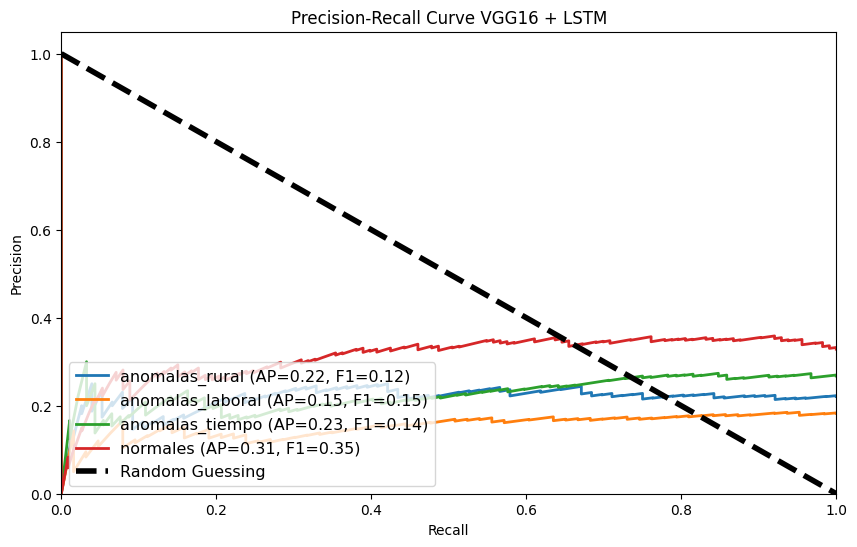

In [ ]:
fig, c_ax = plt.subplots(1,1, figsize = (10,6))


def multiclass_precision_recall_curve(y_test, y_pred):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    precision = dict()
    recall = dict()
    f1_scores = dict()
    average_precision = dict()
    for (idx, c_label) in enumerate(CLASS_LABELS):
        precision[idx], recall[idx], _ = precision_recall_curve(y_test[:,idx], y_pred[:,idx])
        average_precision[idx] = auc(recall[idx], precision[idx])
        f1_scores[idx] = f1_score(y_test[:,idx], np.round(y_pred[:,idx]))
        plt.plot(recall[idx], precision[idx], lw=2, label='%s (AP=%0.2f, F1=%0.2f)' % (c_label, average_precision[idx], f1_scores[idx]))
    plt.plot([0,1], [1,0], 'black',linestyle='dashed', lw=4, label = 'Random Guessing')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Curve VGG16 + LSTM')
    plt.legend(fontsize = 11.5, loc="lower left")
    plt.show()

multiclass_precision_recall_curve(y_test, preds)

#### 5.6 VGG16 + 2 LSTM

In [10]:
model_vgg16_2lstm = tf.keras.models.load_model("modelos_trained/model_vgg16_2lstm_4clases_8num_timesteps_8batch_size.h5")
#prueba = tf.keras.models.load_model("modelos_trained/prueba.h5")

In [ ]:
# Evaluar el modelo
y_pred = model_vgg16_2lstm.predict(val_seq_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Obtener las etiquetas verdaderas del generador de prueba
y_true = np.argmax(np.concatenate([val_seq_generator[i][1] for i in range(len(val_seq_generator))]), axis=1)

# Reporte de clasificación
print(classification_report(y_true, y_pred_classes))

# Calcular AUC
y_true_bin = np.concatenate([val_seq_generator[i][1] for i in range(len(val_seq_generator))])
roc_auc = roc_auc_score(y_true_bin, y_pred, average='macro', multi_class='ovo')
print('ROC AUC:', roc_auc)

43/43 [==============================] - 81s 2s/step
              precision    recall  f1-score   support

           0       0.29      0.51      0.37        76
           1       0.00      0.00      0.00        62
           2       0.20      0.11      0.14        92
           3       0.38      0.54      0.45       114

    accuracy                           0.32       344
   macro avg       0.22      0.29      0.24       344
weighted avg       0.25      0.32      0.27       344

ROC AUC: 0.5168637592959716


43/43 [==============================] - 88s 2s/step
(344, 4)
(344, 4)
ROC AUC score: 0.4936790156841536


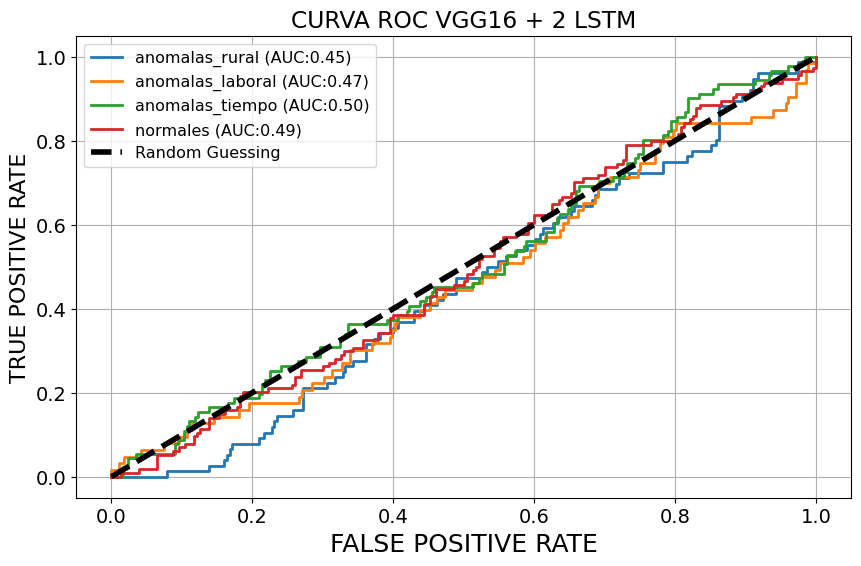

In [ ]:
preds = model_vgg16_2lstm.predict(test_seq_generator)
y_test = np.concatenate([test_seq_generator[i][1] for i in range(len(test_seq_generator))])
#y_test = test_generator.classes
print(y_test.shape)
print(preds.shape)
fig, c_ax = plt.subplots(1,1, figsize = (10,6))

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    # lb = LabelBinarizer()
    # lb.fit(y_test)
    # y_test = lb.transform(y_test)
    y_pred = np.array(y_pred)
    for (idx, c_label) in enumerate(CLASS_LABELS):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr,lw=2, label = '%s (AUC:%0.2f)'  % (c_label, sklearn_auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'black',linestyle='dashed', lw=4, label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)

print('ROC AUC score:', multiclass_roc_auc_score(y_test , preds  , average = "micro"))
plt.xlabel('FALSE POSITIVE RATE', fontsize=18)
plt.ylabel('TRUE POSITIVE RATE', fontsize=16)
plt.legend(fontsize = 11.5)
plt.title("CURVA ROC VGG16 + 2 LSTM")
plt.show()

28/28 [==============================] - 185s 6s/step


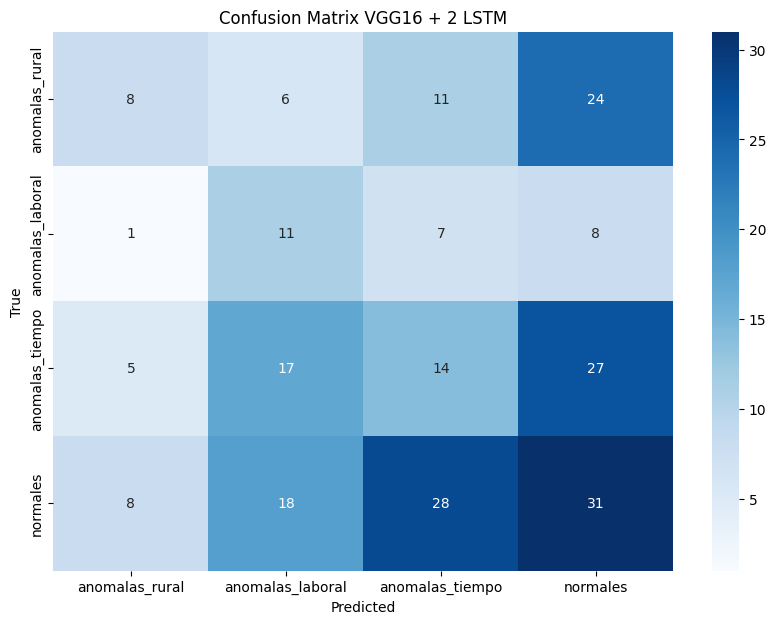

In [13]:
# Calcular la matriz de confusión
preds = model_vgg16_2lstm.predict(test_seq_generator)
y_test = np.concatenate([test_seq_generator[i][1] for i in range(len(test_seq_generator))])
y_pred = np.argmax(preds, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_labels, y_pred)

# Visualizar la matriz de confusión usando seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=CLASS_LABELS, yticklabels=CLASS_LABELS,linewidths=0)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix VGG16 + 2 LSTM')
plt.show()

In [ ]:
# Convertir las probabilidades en etiquetas de clase
y_pred = np.argmax(preds, axis=1)

# Las clases de tu problema (puedes obtener esto del generador o definirlo manualmente)
classes = list(test_seq_generator.class_indices.keys())  # ['Class 0', 'Class 1', 'Class 2', 'Class 3']

# Generar el reporte de clasificación
report = classification_report(y_test_labels, y_pred, target_names=classes)
print(report)

                  precision    recall  f1-score   support

anomalas_laboral       0.17      0.12      0.14        76
  anomalas_rural       0.17      0.23      0.19        62
 anomalas_tiempo       0.26      0.27      0.27        92
        normales       0.35      0.35      0.35       114

        accuracy                           0.26       344
       macro avg       0.24      0.24      0.24       344
    weighted avg       0.26      0.26      0.25       344



TypeError: 'list' object is not callable

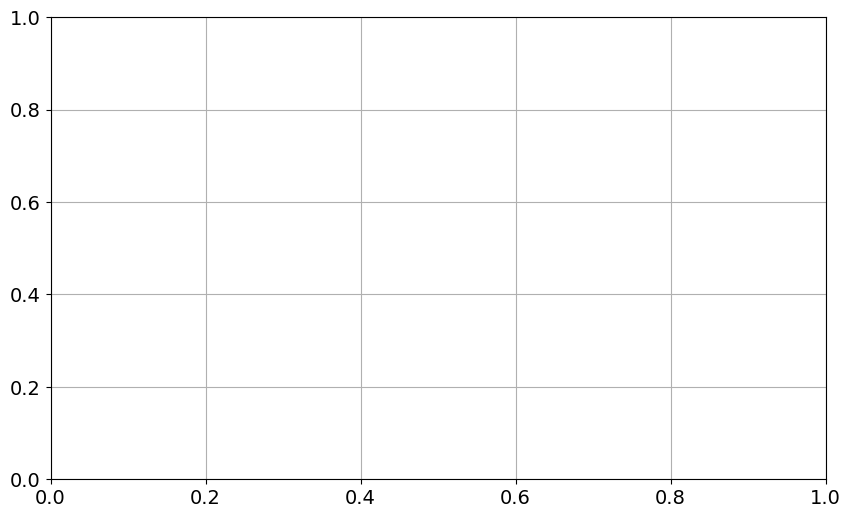

In [ ]:
fig, c_ax = plt.subplots(1,1, figsize = (10,6))


def multiclass_precision_recall_curve(y_test, y_pred):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    precision = dict()
    recall = dict()
    f1_scores = dict()
    average_precision = dict()
    for (idx, c_label) in enumerate(CLASS_LABELS):
        precision[idx], recall[idx], _ = precision_recall_curve(y_test[:,idx], y_pred[:,idx])
        average_precision[idx] = auc(recall[idx], precision[idx])
        f1_scores[idx] = f1_score(y_test[:,idx], np.round(y_pred[:,idx]))
        plt.plot(recall[idx], precision[idx], lw=2, label='%s (AP=%0.2f, F1=%0.2f)' % (c_label, average_precision[idx], f1_scores[idx]))
    plt.plot([0,1], [1,0], 'black',linestyle='dashed', lw=4, label = 'Random Guessing')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Curve VGG16 + LSTM')
    plt.legend(fontsize = 11.5, loc="lower left")
    plt.show()

multiclass_precision_recall_curve(y_test, preds)

#### 5.7 AUTOENCODERS

##### 5.7.1 AUTOENCODER 5k

In [15]:
autoencoder_5k = tf.keras.models.load_model('modelos_trained/autoencoder_5k_256dim.h5')

In [8]:
with open("modelos_trained/autoencoder_5k_256dim.pkl", "rb") as f:
    history = pickle.load(f)

In [9]:
def get_images(generator, num_batches):
    images = []
    for _ in range(num_batches):
        batch = next(generator)[0]
        images.extend(batch)
    return np.array(images)

# Specify the number of batches you want to get from each generator
num_batches = 15

# Get the images
train_normal_images = get_images(train_normal_generator, num_batches)
test_normal_images = get_images(test_normal_generator, num_batches)
anomalous_images = get_images(anomalous_generator, num_batches)

10/10 [==============================] - 0s 24ms/step


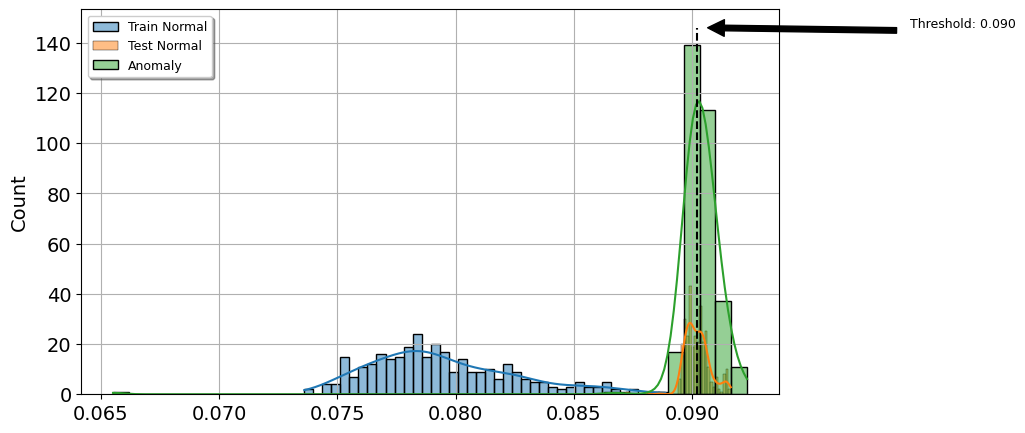

In [34]:
def predict(model, data):
    reconstructions = model.predict(data)
    reconstruction_error = np.mean(np.abs(data - reconstructions), axis=(1,2,3))
    return reconstructions, reconstruction_error

train_prediction, train_loss = predict(autoencoder_5k, train_normal_images)
test_prediction, test_loss = predict(autoencoder_5k, test_normal_images)
anomaly_prediction, anomaly_loss = predict(autoencoder_5k, anomalous_images)

# Calculate the threshold
#threshold = np.mean(train_loss) + np.std(train_loss)
#threshold = np.percentile(train_loss, 95)
threshold = 0.090195
# Plotting
bins = 40
plt.figure(figsize=(9, 5), dpi=100)
sns.histplot(np.clip(train_loss, 0, 0.5), bins=bins, kde=True, label="Train Normal")
sns.histplot(np.clip(test_loss, 0, 0.5), bins=bins, kde=True, label="Test Normal")
sns.histplot(np.clip(anomaly_loss, 0, 0.5), bins=bins, kde=True, label="Anomaly")

ax = plt.gca()  # Get the current Axes
ylim = ax.get_ylim()
plt.vlines(threshold, 0, ylim[-1], color="k", ls="--")
plt.annotate(f"Threshold: {threshold:.3f}", xy=(threshold, ylim[-1]), xytext=(threshold+0.009, ylim[-1]),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=9)
plt.legend(shadow=True, frameon=True, facecolor="inherit", loc="best", fontsize=9)
plt.show()

In [35]:
def evaluate_model(model, data):
    pred, loss = predict(model, data)
    if id(data) == id(anomalous_images):
        accuracy = np.sum(loss > threshold)/len(data)
    else:
        accuracy = np.sum(loss <= threshold)/len(data)
    return f"Accuracy: {accuracy:.2%}"

In [36]:
print("Training", evaluate_model(autoencoder_5k, train_normal_images))
print("Testing", evaluate_model(autoencoder_5k, test_normal_images))
print("Anomaly", evaluate_model(autoencoder_5k, anomalous_images))

10/10 [==============================] - 0s 41ms/step
Training Accuracy: 100.00%
10/10 [==============================] - 0s 22ms/step
Testing Accuracy: 53.00%
10/10 [==============================] - 0s 23ms/step
Anomaly Accuracy: 59.06%


##### 5.7.2 AUTOENCODER 300k

In [ ]:
autoencoder_regularizer = tf.keras.models.load_model('/content/autoencoder_300kparams_64batch.h5')

with open("/content/autoencoder_300kparams_64batch.pkl", "rb") as f:
    history = pickle.load(f)

In [ ]:
def get_images(generator, num_batches):
    images = []
    for _ in range(num_batches):
        batch = next(generator)[0]
        images.extend(batch)
    return np.array(images)

# Specify the number of batches you want to get from each generator
num_batches = 10

# Get the images
train_normal_images = get_images(train_normal_generator, num_batches)
test_normal_images = get_images(test_normal_generator, num_batches)
anomalous_images = get_images(anomalous_generator, num_batches)

In [ ]:
def predict(model, data):
    reconstructions = model.predict(data)
    reconstruction_error = np.mean(np.abs(data - reconstructions), axis=(1,2,3))
    return reconstructions, reconstruction_error

train_prediction, train_loss = predict(autoencoder_regularizer, train_normal_images)
test_prediction, test_loss = predict(autoencoder_regularizer, test_normal_images)
anomaly_prediction, anomaly_loss = predict(autoencoder_regularizer, anomalous_images)

# Calculate the threshold
#threshold = np.mean(train_loss) + np.std(train_loss)
threshold = np.percentile(train_loss, 95)
threshold = 0.0525
# Plotting
bins = 40
plt.figure(figsize=(9, 5), dpi=100)
sns.histplot(np.clip(train_loss, 0, 0.5), bins=bins, kde=True, label="Train Normal")
sns.histplot(np.clip(test_loss, 0, 0.5), bins=bins, kde=True, label="Test Normal")
sns.histplot(np.clip(anomaly_loss, 0, 0.5), bins=bins, kde=True, label="Anomaly")

ax = plt.gca()  # Get the current Axes
ylim = ax.get_ylim()
plt.vlines(threshold, 0, ylim[-1], color="k", ls="--")
plt.annotate(f"Threshold: {threshold:.3f}", xy=(threshold, ylim[-1]), xytext=(threshold+0.009, ylim[-1]),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=9)
plt.legend(shadow=True, frameon=True, facecolor="inherit", loc="best", fontsize=9)
plt.show()

In [ ]:
def evaluate_model(model, data):
    pred, loss = predict(model, data)
    if id(data) == id(anomalous_images):
        accuracy = np.sum(loss > threshold)/len(data)
    else:
        accuracy = np.sum(loss <= threshold)/len(data)
    return f"Accuracy: {accuracy:.2%}"

In [ ]:
print("Training", evaluate_model(autoencoder_regularizer, train_normal_images))
print("Testing", evaluate_model(autoencoder_regularizer, test_normal_images))
print("Anomaly", evaluate_model(autoencoder_regularizer, anomalous_images))

#### 5.8 UNET

In [7]:
unet = tf.keras.models.load_model('modelos_trained/unet_16batch_256dim.h5', compile=False)

###### 5.8.1 USANDO ESTRATEGIA PROPIA OPTIMIZAMOS UMBRAL DE ERROR DE RECONSTRUCCION CON CONJUNTO DE TRAIN PARA MAXIMIZAR ACCURACY

In [20]:
# Obtener las imágenes de prueba y sus reconstrucciones
train_normal_images = next(train_normal_generator)[0]

reconstructed_normals = autoencoder.predict(train_normal_images)

1/1 [==============================] - 0s 43ms/step


In [21]:
from sklearn.metrics import mean_squared_error

# Función para calcular el error de reconstrucción
def reconstruction_error(original, reconstructed):
    return np.mean(np.square(original - reconstructed), axis=(1, 2, 3))

# Calcular el error de reconstrucción para imágenes normales y anómalas
normal_errors = reconstruction_error(train_normal_images, reconstructed_normals)
normal_errors

array([0.00432165, 0.00311026, 0.00242227, 0.00282678, 0.00271253,
       0.00471869, 0.00348728, 0.00637886], dtype=float32)

In [22]:
# Calcular el percentil 95 de los errores de reconstrucción normales
threshold_initial = np.percentile(normal_errors, 95)
print(f'Umbral inicial basado en el percentil 95 de los errores normales: {threshold_initial}')

Umbral inicial basado en el percentil 95 de los errores normales: 0.005797799373976885


In [23]:
# Detectar anomalías en las imágenes de prueba
def detect_anomalies(errors, threshold):
    anomalies = errors > threshold
    return anomalies

anomalies = detect_anomalies(normal_errors, threshold_initial)
print(f'Número de anomalías detectadas: {np.sum(anomalies)}')

Número de anomalías detectadas: 1


EVALUAMOS CON DATOS DE TEST Y ANOMALIAS


In [25]:
# Obtener las imágenes de prueba y sus reconstrucciones
test_normal_images = next(test_normal_generator)[0]
anomalous_images = np.concatenate([next(anomalous_generator)[0] for _ in range(anomalous_generator.samples // BATCH_SIZE)])

reconstructed_normals_test = autoencoder.predict(test_normal_images)
reconstructed_anomalous = autoencoder.predict(anomalous_images)

18/18 [==============================] - 1s 60ms/step


In [26]:
from sklearn.metrics import mean_squared_error

# Función para calcular el error de reconstrucción
# def reconstruction_error(original, reconstructed):
#     return np.mean(np.square(original - reconstructed), axis=(1, 2, 3))

# Calcular el error de reconstrucción para imágenes normales y anómalas
test_normal_errors = reconstruction_error(test_normal_images, reconstructed_normals_test)
anomalous_errors = reconstruction_error(anomalous_images, reconstructed_anomalous)

In [27]:
print(f'Errores de reconstrucción normales: {test_normal_errors[:10]}')
print(f'Errores de reconstrucción anómalos: {anomalous_errors[:10]}')

Errores de reconstrucción normales: [0.01022825 0.01024995 0.01034116 0.0102688  0.01035586 0.01041267
 0.01028104 0.01033427]
Errores de reconstrucción anómalos: [0.00967573 0.0093605  0.01013993 0.00931909 0.009422   0.00944415
 0.00936276 0.00971595 0.00974035 0.00993421]


In [28]:
# Detectar anomalías en las imágenes de prueba

anomalies = detect_anomalies(anomalous_errors, threshold_initial)
print(f'Número de anomalías detectadas: {np.sum(anomalies)}')

Número de anomalías detectadas: 563


###### 5.8.2 METRICAS COMO EL DATASET DE KAGGLE

In [8]:
def get_images(generator, num_batches):
    images = []
    for _ in range(num_batches):
        batch = next(generator)[0]
        images.extend(batch)
    return np.array(images)

# Specify the number of batches you want to get from each generator
num_batches = 10

# Get the images
train_normal_images = get_images(train_normal_generator, num_batches)
test_normal_images = get_images(test_normal_generator, num_batches)
anomalous_images = get_images(anomalous_generator, num_batches)

3/3 [==============================] - 45s 14s/step


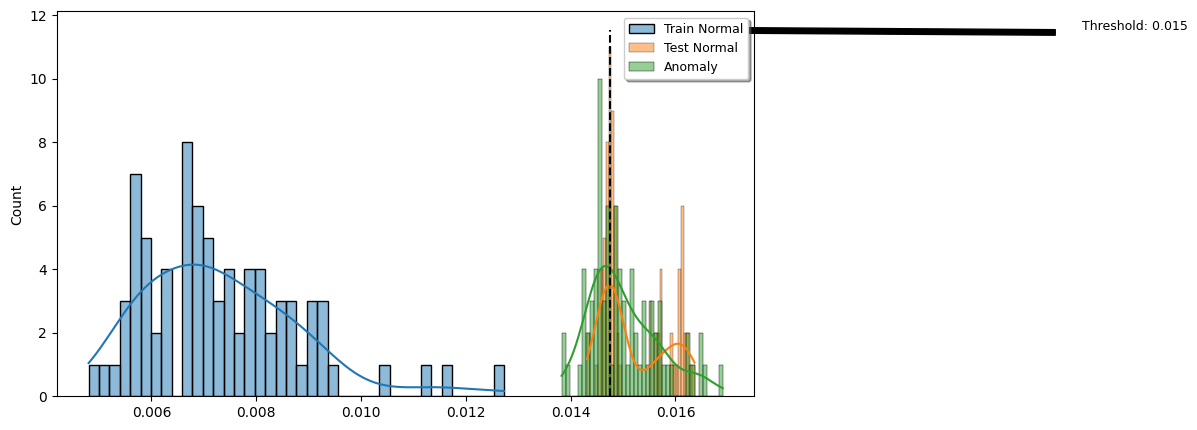

In [15]:
def predict(model, data):
    reconstructions = model.predict(data)
    reconstruction_error = np.mean(np.abs(data - reconstructions), axis=(1,2,3))
    return reconstructions, reconstruction_error

train_prediction, train_loss = predict(unet, train_normal_images)
test_prediction, test_loss = predict(unet, test_normal_images)
anomaly_prediction, anomaly_loss = predict(unet, anomalous_images)

# Calculate the threshold
#threshold = np.mean(train_loss) + np.std(train_loss)
#threshold = np.percentile(train_loss, 95)
threshold = 0.01475
# Plotting
bins = 40
plt.figure(figsize=(9, 5), dpi=100)
sns.histplot(np.clip(train_loss, 0, 0.5), bins=bins, kde=True, label="Train Normal")
sns.histplot(np.clip(test_loss, 0, 0.5), bins=bins, kde=True, label="Test Normal")
sns.histplot(np.clip(anomaly_loss, 0, 0.5), bins=bins, kde=True, label="Anomaly")

ax = plt.gca()  # Get the current Axes
ylim = ax.get_ylim()
plt.vlines(threshold, 0, ylim[-1], color="k", ls="--")
plt.annotate(f"Threshold: {threshold:.3f}", xy=(threshold, ylim[-1]), xytext=(threshold+0.009, ylim[-1]),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=9)
plt.legend(shadow=True, frameon=True, facecolor="inherit", loc="best", fontsize=9)
plt.show()

1/1 [==============================] - 5s 5s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 5s 5s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 2s 2s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 5s 5s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


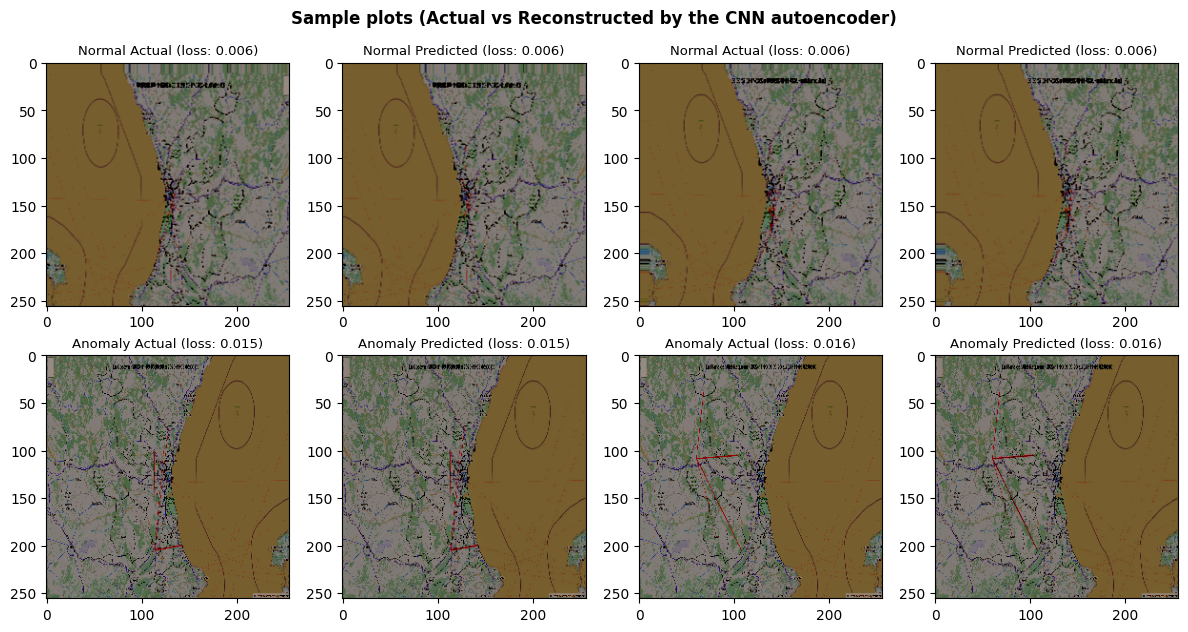

In [ ]:
def plot_examples(model, data, ax, title):
    images, _ = data  # Unpack the images and ignore the labels
    pred, loss = predict(model, images)
    ax[0].imshow(images[0], cmap='gray')  # Plot the actual image
    ax[0].set_title(f"{title} Actual (loss: {loss[0]:.3f})", fontsize=9.5)
    ax[1].imshow(pred[0], cmap='gray')  # Plot the predicted image
    ax[1].set_title(f"{title} Predicted (loss: {loss[0]:.3f})", fontsize=9.5)

fig, axes = plt.subplots(2, 4, figsize=(12, 6), facecolor="w")  # Create only the necessary axes

for i in range(2):
    data = next(train_normal_generator)
    plot_examples(unet, data, ax=axes[0, i*2:i*2+2], title="Normal")  # Pass a pair of axes

for i in range(2):
    data = next(anomalous_generator)
    plot_examples(unet, data, ax=axes[1, i*2:i*2+2], title="Anomaly")  # Pass a pair of axes

plt.tight_layout()
fig.suptitle("Sample plots (Actual vs Reconstructed by the CNN autoencoder)", y=1.04, weight="bold")
fig.savefig("autoencoder.png", dpi=500)
plt.show()

MODEL EVALUATION

In [13]:
def evaluate_model(model, data):
    pred, loss = predict(model, data)
    if id(data) == id(anomalous_images):
        accuracy = np.sum(loss > threshold)/len(data)
    else:
        accuracy = np.sum(loss <= threshold)/len(data)
    return f"Accuracy: {accuracy:.2%}"

In [16]:
print("Training", evaluate_model(unet, train_normal_images))
print("Testing", evaluate_model(unet, test_normal_images))
print("Anomaly", evaluate_model(unet, anomalous_images))

3/3 [==============================] - 46s 14s/step
Training Accuracy: 100.00%
3/3 [==============================] - 46s 14s/step
Testing Accuracy: 31.25%
3/3 [==============================] - 46s 14s/step
Anomaly Accuracy: 55.00%


In [ ]:
anomalous_rural_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=True,
    color_mode="rgb",
    classes=["anomalas_rural"],  # Only images from the "anomalas_rural" class
    seed=SEED
)

anomalous_laboral_generator  = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=True,
    color_mode="rgb",
    classes=["anomalas_laboral"],  # Only images from the "anomalas_laboral" class
    seed=SEED
)

anomalous_tiempo_generator =  test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=True,
    color_mode="rgb",
    classes=["anomalas_tiempo"],  # Only images from the "anomalas_tiempo" class
    seed=SEED
)

Found 110 images belonging to 1 classes.


Found 196 images belonging to 1 classes.
Found 265 images belonging to 1 classes.


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

# Calculate the binary labels
y_true = np.concatenate([np.zeros(len(test_loss)), np.ones(len(anomaly_loss))])
y_pred = np.concatenate([test_loss, anomaly_loss]) > threshold

# Calculate the classification metrics
report = classification_report(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred)

print(report)
print("AUC-ROC:", roc_auc)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         8
         1.0       0.99      1.00      0.99       568

    accuracy                           0.99       576
   macro avg       0.49      0.50      0.50       576
weighted avg       0.97      0.99      0.98       576

AUC-ROC: 0.5


In [ ]:
from sklearn.metrics import mean_squared_error

def calculate_reconstruction_error(model, generator):
    errors = []
    for i in range(len(generator)):
        # Get the original images
        original_images = generator[i][0]

        # Get the reconstructed images
        reconstructed_images = model.predict_on_batch(original_images)

        # Calculate the reconstruction error for each image
        batch_errors = [mean_squared_error(original.flatten(), reconstructed.flatten())
                        for original, reconstructed in zip(original_images, reconstructed_images)]
        errors.extend(batch_errors)

    return errors

def prepare_labels(model, test_generator, anomaly_generator):
    # Calculate reconstruction errors for the test dataset
    test_errors = calculate_reconstruction_error(model, test_generator)

    # Calculate reconstruction errors for the anomaly dataset
    anomaly_errors = calculate_reconstruction_error(model, anomaly_generator)

    return test_errors, anomaly_errors

errores_test, errores_anomalias_test = prepare_labels(unet, test_normal_generator, anomalous_rural_generator)

KeyboardInterrupt: 

### 6. Anomalib

In [ ]:
from anomalib import TaskType
from anomalib.data import MVTec, Folder
from anomalib.data.utils import read_image
from anomalib.deploy import OpenVINOInferencer, ExportType
from anomalib.engine import Engine
from anomalib.models import Padim, Dfm, Patchcore
from pathlib import Path
from PIL import Image
import numpy as np
# import ImageVisualizer
from anomalib.visualize import ImageVisualizer
from anomalib.data.utils import read_image
from PIL import Image
import numpy as np


ModuleNotFoundError: No module named 'anomalib.visualize'

In [ ]:
Path.cwd()

WindowsPath('c:/Users/Alex/Desktop/GCD/Curso 4/CUATRIMESTRE 2/TFG')

In [ ]:
datamodule = Folder(
    name="open",
    root=Path.cwd() / "mapas/datos_noviembre",
    normal_dir="normales",
    abnormal_dir="anomalas_rural",
    task=TaskType.CLASSIFICATION,
)
datamodule.prepare_data()  # Create train/val/test/predic dataloaders
datamodule.setup()  # Split the data to train/val/test/prediction sets.


i, data = next(enumerate(datamodule.val_dataloader()))
print(data.keys())

dict_keys(['image_path', 'label', 'image'])


In [ ]:
# Initialize counters
normal_count = 0
abnormal_count = 0

# Iterate over the dataloaders
for dataloader in [datamodule.train_dataloader(), datamodule.val_dataloader(), datamodule.test_dataloader()]:
    for _, data in enumerate(dataloader):
        # Check if the label is normal or abnormal and increment the corresponding counter
        labels = data['label']
        normal_count += (labels == 0).sum().item()  # Assuming 0 is the label for normal
        abnormal_count += (labels == 1).sum().item()  # Assuming 1 is the label for abnormal

# Print the counts
print(f"Number of normal images: {normal_count}")
print(f"Number of abnormal images: {abnormal_count}")

Number of normal images: 2327
Number of abnormal images: 727


In [ ]:
# Get a batch of data
i, data = next(enumerate(datamodule.train_dataloader()))

# Unpack the data
images = data['image']

# Print the shape of the first image
print(f"Shape of the first image: {images[0].shape}")

# Print the shape of all images in the batch
print(f"Shape of the image batch: {images.shape}")

Shape of the first image: torch.Size([3, 768, 1366])
Shape of the image batch: torch.Size([32, 3, 768, 1366])


In [ ]:


# Specify the path to your image
image_path = 'mapas/datos_noviembre/normales/El_Camp_de_Morvedre_2023-11-04T00_00_00.png'

# Load the image
image = Image.open(image_path)

# Convert the image to a numpy array and print its shape
image_array = np.array(image)
print(f"Shape of the original image: {image_array.shape}")

# Now print the shape of the image after using the Folder class
print(f"Shape of the image after using the Folder class: {images[0].shape}")

Shape of the original image: (768, 1366, 4)
Shape of the image after using the Folder class: torch.Size([3, 768, 1366])


In [ ]:

# Cargar el modelo
# model_padim = Padim()

model_padim = Padim(
    backbone="resnet18",
    pre_trained=True,
)
# model_dfm = Dfm(
#     backbone="resnet50",
#     pre_trained=True
# )


# model = Patchcore(
#     backbone="resnet18",
#     pre_trained=True
# )

In [ ]:
# from anomalib.engine import Engine
# from anomalib.utils.normalization import min_max
# from torchmetrics import Accuracy, AUROC, F1Score,AveragePrecision
# from torchmetrics.classification import MulticlassPrecisionRecallCurve, MulticlassConfusionMatrix, MulticlassROC, MulticlassF1Score,MulticlassAUROC

# image_metrics = ["AUROC", "F1Score","AUPR"]
# pixel_metrics = ["AUROC", "F1Score","AUPR"]

# engine = Engine(
#     #normalization=min_max,
#     #threshold = "f1_adaptive_threshold",
#     accelerator="gpu",  # \<"cpu", "gpu", "tpu", "ipu", "hpu", "auto">,
#     devices=1,
#     logger=False,
#     task=TaskType.CLASSIFICATION,
#     num_sanity_val_steps=0,
#     val_check_interval=1.0
# )
engine = Engine(task=TaskType.CLASSIFICATION)
engine.fit(model=model_padim, datamodule=datamodule)

Trainer already configured with model summary callbacks: [<class 'lightning.pytorch.callbacks.rich_model_summary.RichModelSummary'>]. Skipping setting a default `ModelSummary` callback.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
`Trainer(val_check_interval=1.0)` was configured so validation will run at the end of the training epoch..
F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
c:\Users\Alex\miniconda3\envs\anomalib_v2\lib\site-packages\lightning\pytorch\core\optimizer.py:181: `LightningModule.configure_optimizers` returned `None`, this fit will run with no optimizer


┏━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name                  ┃ Type                     ┃ Params ┃
┡━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ model                 │ PadimModel               │  2.8 M │
│ 1 │ _transform            │ Compose                  │      0 │
│ 2 │ normalization_metrics │ MinMax                   │      0 │
│ 3 │ image_threshold       │ F1AdaptiveThreshold      │      0 │
│ 4 │ pixel_threshold       │ F1AdaptiveThreshold      │      0 │
│ 5 │ image_metrics         │ AnomalibMetricCollection │      0 │
│ 6 │ pixel_metrics         │ AnomalibMetricCollection │      0 │
└───┴───────────────────────┴──────────────────────────┴────────┘

Trainable params: 2.8 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 2.8 M                                                                                                
Total estimated model params size (MB): 11

c:\Users\Alex\miniconda3\envs\anomalib_v2\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'train_dataloader' to speed up the dataloader worker initialization.


Output()

c:\Users\Alex\miniconda3\envs\anomalib_v2\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker initialization.


c:\Users\Alex\miniconda3\envs\anomalib_v2\lib\site-packages\lightning\pytorch\loops\optimization\automatic.py:132: 
`training_step` returned `None`. If this was on purpose, ignore this warning...

c:\Users\Alex\miniconda3\envs\anomalib_v2\lib\site-packages\anomalib\models\components\filters\blur.py:91: 
UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor 
Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at 
..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  output = F.conv2d(input_tensor, self.kernel, groups=self.channels, padding=0, stride=1)

`Trainer.fit` stopped: `max_epochs=1` reached.


In [ ]:
# load best model from checkpoint before evaluating
test_padim = engine.test(
    model=model_padim,
    datamodule=datamodule,
    ckpt_path=engine.trainer.checkpoint_callback.best_model_path,
)

F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead
Restoring states from the checkpoint path at C:\Users\Alex\Desktop\GCD\Curso 4\CUATRIMESTRE 2\TFG\results\Padim\open\v1\weights\lightning\model.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at C:\Users\Alex\Desktop\GCD\Curso 4\CUATRIMESTRE 2\TFG\results\Padim\open\v1\weights\lightning\model.ckpt
c:\Users\Alex\miniconda3\envs\anomalib_v2\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:436: Consider setting `persistent_workers=True` in 'test_dataloader' to speed up the dataloader worker initialization.


Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │    0.9943876266479492     │
│       image_F1Score       │    0.9890710115432739     │
└───────────────────────────┴───────────────────────────┘

In [ ]:
print(test_padim)

[{'image_AUROC': 0.9943876266479492, 'image_F1Score': 0.9890710115432739}]


In [ ]:
print(test_padim)

[{'image_AUROC': 0.9853558540344238, 'image_F1Score': 0.9836956262588501}]


In [ ]:
print(test_dfm)

[{'image_AUROC': 0.8819832801818848, 'image_F1Score': 0.9638158082962036}]


OPEN VINO MODEL

In [ ]:
engine.export(model=model_padim,export_type=ExportType.OPENVINO)

INFO:nncf:NNCF initialized successfully. Supported frameworks detected: torch, onnx, openvino


c:\Users\Alex\miniconda3\envs\anomalib_v2\lib\site-packages\torch\onnx\_internal\jit_utils.py:307: UserWarning: Constant folding - Only steps=1 can be constant folded for opset >= 10 onnx::Slice op. Constant folding not applied. (Triggered internally at ..\torch\csrc\jit\passes\onnx\constant_fold.cpp:181.)
  _C._jit_pass_onnx_node_shape_type_inference(node, params_dict, opset_version)
c:\Users\Alex\miniconda3\envs\anomalib_v2\lib\site-packages\torch\onnx\utils.py:702: UserWarning: Constant folding - Only steps=1 can be constant folded for opset >= 10 onnx::Slice op. Constant folding not applied. (Triggered internally at ..\torch\csrc\jit\passes\onnx\constant_fold.cpp:181.)
  _C._jit_pass_onnx_graph_shape_type_inference(
c:\Users\Alex\miniconda3\envs\anomalib_v2\lib\site-packages\torch\onnx\utils.py:1208: UserWarning: Constant folding - Only steps=1 can be constant folded for opset >= 10 onnx::Slice op. Constant folding not applied. (Triggered internally at ..\torch\csrc\jit\passes\onnx

WindowsPath('C:/Users/Alex/Desktop/GCD/Curso 4/CUATRIMESTRE 2/TFG/results/Padim/open/latest/weights/openvino/model.xml')

In [ ]:
# Get a batch of data
i, data = next(enumerate(datamodule.test_dataloader()))

# Unpack the data
images_test = data['image']

# Cojemos la primera imagen:
imagen_test = np.array(images_test[0])

# Normalize the first image
imagen_test = imagen_test / 255.0

# Print the shape of the first image
print(f"Shape of the first image on test: {imagen_test.shape}")

# Print the shape of all images in the batch
print(f"Shape of the image batch on test : {images_test.shape}")

print(min(imagen_test.flatten()), max(imagen_test.flatten()))
print(imagen_test)

Shape of the first image on test: (3, 256, 256)
Shape of the image batch on test : torch.Size([32, 3, 256, 256])
-0.006158276 0.010352943
[[[0.0069437  0.00513911 0.00653276 ... 0.00297615 0.003111   0.003111  ]
  [0.00605453 0.00553973 0.00629936 ... 0.0030961  0.003111   0.003111  ]
  [0.00452699 0.00524623 0.0074136  ... 0.00309359 0.003111   0.003111  ]
  ...
  [0.0044067  0.00460713 0.00564503 ... 0.00387151 0.00370654 0.00699523]
  [0.00441442 0.00450969 0.00514312 ... 0.00357568 0.0038502  0.00668392]
  [0.00443263 0.00444769 0.00511289 ... 0.00687713 0.00684075 0.00749705]]

 [[0.00802592 0.00730661 0.00785783 ... 0.00627578 0.00650299 0.006503  ]
  [0.00766711 0.00746278 0.00776654 ... 0.00647795 0.006503   0.006503  ]
  [0.00704748 0.00733715 0.00821177 ... 0.00647409 0.006503   0.006503  ]
  ...
  [0.00699367 0.00708937 0.0075026  ... 0.00484825 0.00467293 0.00817774]
  [0.00699762 0.00704314 0.00728554 ... 0.00453247 0.00482644 0.00784757]
  [0.00700692 0.00701128 0.0072866

In [ ]:
## Cargamos una imagen desde local

# Specify the path to your image
normal_image = 'mapas/datos_noviembre/normales/L\'Horta_Nord_2023-11-05T17_00_00.png'
anomal_image = 'mapas/datos_noviembre/anomalas_rural/La_Vall_d\'Albaida_2023-11-10T04_00_00.png'

In [ ]:
normal_image = (read_image(normal_image))
anomal_image = (read_image(anomal_image))

#normalizamos

# imagen_normal = imagen_normal / 255.0
# imagen_anomala = imagen_anomala / 255.0
print(normal_image.shape)
print(anomal_image.shape)

print(min(normal_image.flatten()), max(normal_image.flatten()))

(768, 1366, 3)
(768, 1366, 3)
0.0 1.0


In [ ]:
output_path = Path(engine.trainer.default_root_dir)
print(output_path)

C:\Users\Alex\Desktop\GCD\Curso 4\CUATRIMESTRE 2\TFG\results\Padim\open\latest


In [ ]:
openvino_model_path = output_path / "weights" / "openvino" / "model.bin"
metadata = output_path / "weights" / "openvino" / "metadata.json"
print(openvino_model_path.exists(), metadata.exists())

True True


In [ ]:
inferencer = OpenVINOInferencer(
    path=openvino_model_path,  # Path to the OpenVINO IR model.
    metadata=metadata,  # Path to the metadata file.
    device="CPU",  # We would like to run it on an Intel CPU.
)

In [ ]:
print("Shape of the image transposed for using it to predict with openVINO ",imagen_test.shape)

# transpose

imagen_test = np.transpose(imagen_test, (2, 1, 0))

Shape of the image transposed for using it to predict with openVINO  (256, 256, 3)


Predecimos la clase de la imagen:


In [ ]:
# Realiza la inferencia
predictions = inferencer.predict(image=imagen_test)

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\arithm.cpp:650: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'cv::arithm_op'


In [ ]:
print(predictions.pred_score, predictions.pred_label)

1.0 LabelName.ABNORMAL


Vemos resultados de inferencia para clasificación

In [ ]:
# Visualiza las predicciones
visualizer = ImageVisualizer(mode=VisualizationMode.FULL, task=TaskType.CLASSIFICATION)
output_image = visualizer.visualize_image(predictions)
Image.fromarray(output_image)

NameError: name 'ImageVisualizer' is not defined

In [ ]:
import cv2
import numpy as np
from pathlib import Path

def preprocess_image(image, size=(224, 224)):
    # Redimensionar la imagen
    resized_image = cv2.resize(image, size)
    # Normalizar la imagen
    normalized_image = resized_image / 255.0  # Asumiendo que el modelo espera valores en el rango [0, 1]
    return normalized_image

# Configuración del datamodule
datamodule = Folder(
    name="abejas",
    root=Path.cwd() / "mapas/datos_noviembre",
    normal_dir="normales",
    abnormal_dir="anomalas_rural",
    task=TaskType.CLASSIFICATION,
)
datamodule.prepare_data()  # Crear los dataloaders de entrenamiento, validación, test y predicción
datamodule.setup()  # Dividir los datos en conjuntos de entrenamiento, validación, test y predicción

# Entrenamiento del modelo
model_padim_final = padim.Padim(backbone="resnet18", pre_trained=True)
engine = Engine(task=TaskType.CLASSIFICATION)
engine.fit(model=model_padim_final, datamodule=datamodule)

# Test del modelo
test_padim = engine.test(
    model=model_padim_final,
    datamodule=datamodule,
    ckpt_path=engine.trainer.checkpoint_callback.best_model_path,
)

# Exportación a OpenVINO
engine.export(model=model_padim_final, export_type=ExportType.OPENVINO)

# Inicializar el inferenciador de OpenVINO
output_path = Path(engine.trainer.default_root_dir)
openvino_model_path = output_path / "weights" / "openvino" / "model.bin"
metadata = output_path / "weights" / "openvino" / "metadata.json"
inferencer = OpenVINOInferencer(
    path=openvino_model_path,
    metadata=metadata,
    device="CPU",
)

# Obtener todas las rutas de las imágenes y etiquetas
all_image_paths = []
all_labels = []
for i, data in enumerate(datamodule.val_dataloader()):
    all_image_paths.extend(data["image_path"])
    all_labels.extend(data["label"])

# Obtener una imagen normal
imagen_anomala = all_image_paths[500]
imagen_anomala = read_image(path=imagen_anomala)

print(imagen_anomala["image_path"])

# Preprocesar la imagen
imagen_anomala_preprocesada = preprocess_image(imagen_anomala, size=(224, 224))

# Verificar la imagen preprocesada
print("Dimensiones de la imagen preprocesada:", imagen_anomala_preprocesada.shape)
print("Valores mínimos y máximos de la imagen preprocesada:", imagen_anomala_preprocesada.min(), imagen_anomala_preprocesada.max())

# Convertir la imagen preprocesada a formato adecuado para OpenVINO (NCHW: Batch, Channels, Height, Width)
imagen_anomala_preprocesada = np.transpose(imagen_anomala_preprocesada, (2, 0, 1))  # Convertir de HWC a CHW
imagen_anomala_preprocesada = np.expand_dims(imagen_anomala_preprocesada, axis=0)  # Añadir dimensión batch

# Verificar el formato de la imagen preprocesada
print("Formato final de la imagen preprocesada:", imagen_anomala_preprocesada.shape)

# Realizar la inferencia
predictions = inferencer.predict(image=imagen_anomala_preprocesada)

# Imprimir los resultados de la inferencia
print("Puntuación de la predicción:", predictions.pred_score)
print("Etiqueta de la predicción:", predictions.pred_label)
print("Detalles de la predicción:", predictions)


Dimensiones de la imagen preprocesada: (224, 224, 3)
Valores mínimos y máximos de la imagen preprocesada: 0.0 0.00392156862745098
Formato final de la imagen preprocesada: (1, 3, 224, 224)


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\arithm.cpp:650: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'cv::arithm_op'


### 7. AUTOENCODERS CONVOLUCIONALES

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random

In [ ]:
# get current path of the notebook:

import os
os.getcwd()

'c:\\Users\\Alex\\Desktop\\GCD\\Curso 4\\CUATRIMESTRE 2\\TFG'

In [ ]:
#Size of our input images
SIZE = 256

#############################################################################
#Define generators for training, validation and also anomaly data.

batch_size = 128
datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    directory='mapas/datos_listos/train/noooormales/',
    target_size=(SIZE, SIZE),
    batch_size=batch_size,
    class_mode='input'
    )

validation_generator = datagen.flow_from_directory(
    directory='mapas/datos_listos/val/nooormales',
    target_size=(SIZE, SIZE),
    batch_size=batch_size,
    class_mode='input'
    )

anomaly_generator = datagen.flow_from_directory(
    directory='mapas/datos_listos/train/anooomalas_rural',
    target_size=(SIZE, SIZE),
    batch_size=batch_size,
    class_mode='input'
)

Found 2133 images belonging to 1 classes.
Found 457 images belonging to 1 classes.
Found 1163 images belonging to 1 classes.


In [ ]:
#Try to make the bottleneck layer size as small as possible to make it easy for
#density calculations and also picking appropriate thresholds.
#Encoder
LR= 0.1

model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))

#Decoder
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))

model.add(Conv2D(3, (3, 3), activation='sigmoid', padding='same'))

model.compile(optimizer=tf.keras.optimizers.Adam(LR), loss='mean_squared_error', metrics=['mse','accuracy',tf.keras.metrics.AUC()])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 256, 256, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 64)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 128, 128, 32)      18464     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 64, 64, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 16)      

In [ ]:
#Fit the model.
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=70)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.1, patience=3, min_lr=1e-9)
callbacks = [early_stopping,reduce_lr]


history = model.fit(
        train_generator,
        steps_per_epoch= 500 // batch_size,
        epochs=1000,
        validation_data=validation_generator,
        validation_steps=75 // batch_size,
        shuffle = True,
        callbacks = callbacks)


Epoch 1/1000


ResourceExhaustedError: Graph execution error:

OOM when allocating tensor with shape[128,32,128,128] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node gradient_tape/sequential_1/conv2d_12/Conv2D/Conv2DBackpropFilter-0-TransposeNHWCToNCHW-LayoutOptimizer}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_1627]

In [ ]:
model.save("modelos_trained/model_autoencoder.h5")

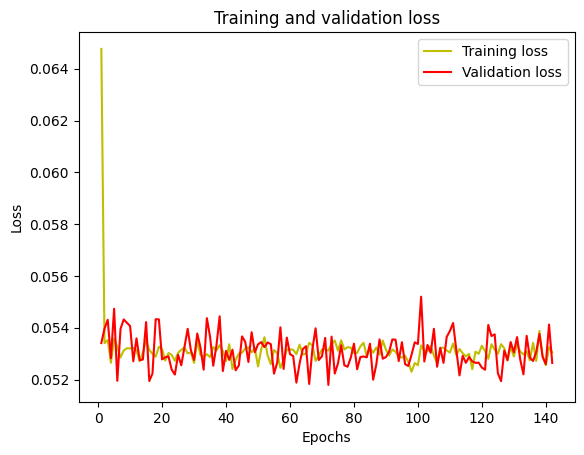

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Get all batches generated by the datagen and pick a batch for prediction
#Just to test the model.
data_batch = []  #Capture all training batches as a numpy array
img_num = 0
while img_num <= train_generator.batch_index:   #gets each generated batch of size batch_size
    data = train_generator.next()
    data_batch.append(data[0])
    img_num = img_num + 1

predicted = model.predict(data_batch[0])  #Predict on the first batch of images

2/2 [==============================] - 1s 8ms/step


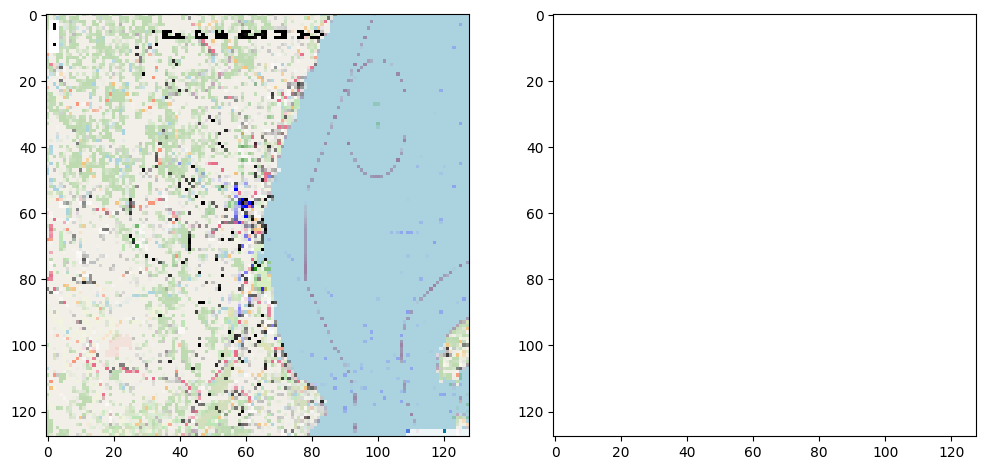

In [ ]:
#Sanity check, view few images and corresponding reconstructions
image_number = random.randint(0, predicted.shape[0])
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(data_batch[0][image_number])
plt.subplot(122)
plt.imshow(predicted[image_number])
plt.show()

In [ ]:
#Let us examine the reconstruction error between our validation data (good/normal images)
# and the anomaly images
validation_error = model.evaluate_generator(validation_generator)
anomaly_error = model.evaluate_generator(anomaly_generator)

print("Recon. error for the validation (normal) data is: ", validation_error)
print("Recon. error for the anomaly data is: ", anomaly_error)

C:\Users\Alex\AppData\Local\Temp\ipykernel_11472\2468543786.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  validation_error = model.evaluate_generator(validation_generator)
C:\Users\Alex\AppData\Local\Temp\ipykernel_11472\2468543786.py:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  anomaly_error = model.evaluate_generator(anomaly_generator)


Recon. error for the validation (normal) data is:  [0.05306289717555046, 0.05306289717555046, 0.37227746844291687, 0.5]
Recon. error for the anomaly data is:  [0.052097804844379425, 0.052097804844379425, 0.37491801381111145, 0.5]


In [ ]:
#Let us extract (or build) the encoder network, with trained weights.
#This is used to get the compressed output (latent space) of the input image.
#The compressed output is then used to calculate the KDE

encoder_model = Sequential()
encoder_model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3), weights=model.layers[0].get_weights()) )
encoder_model.add(MaxPooling2D((2, 2), padding='same'))
encoder_model.add(Conv2D(32, (3, 3), activation='relu', padding='same', weights=model.layers[2].get_weights()))
encoder_model.add(MaxPooling2D((2, 2), padding='same'))
encoder_model.add(Conv2D(16, (3, 3), activation='relu', padding='same', weights=model.layers[4].get_weights()))
encoder_model.add(MaxPooling2D((2, 2), padding='same'))
encoder_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 32, 32, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 16)      

In [ ]:
########################################################
# Calculate KDE using sklearn
from sklearn.neighbors import KernelDensity

#Get encoded output of input images = Latent space
encoded_images = encoder_model.predict_generator(train_generator)

# Flatten the encoder output because KDE from sklearn takes 1D vectors as input
encoder_output_shape = encoder_model.output_shape #Here, we have 16x16x16
out_vector_shape = encoder_output_shape[1]*encoder_output_shape[2]*encoder_output_shape[3]

encoded_images_vector = [np.reshape(img, (out_vector_shape)) for img in encoded_images]

#Fit KDE to the image latent data
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(encoded_images_vector)

#Calculate density and reconstruction error to find their means values for
#good and anomaly images.
#We use these mean and sigma to set thresholds.
def calc_density_and_recon_error(batch_images):

    density_list=[]
    recon_error_list=[]
    for im in range(0, batch_images.shape[0]-1):

        img  = batch_images[im]
        img = img[np.newaxis, :,:,:]
        encoded_img = encoder_model.predict([[img]]) # Create a compressed version of the image using the encoder
        encoded_img = [np.reshape(img, (out_vector_shape)) for img in encoded_img] # Flatten the compressed image
        density = kde.score_samples(encoded_img)[0] # get a density score for the new image
        reconstruction = model.predict([[img]])
        reconstruction_error = model.evaluate([reconstruction],[[img]], batch_size = 1)[0]
        density_list.append(density)
        recon_error_list.append(reconstruction_error)

    average_density = np.mean(np.array(density_list))
    stdev_density = np.std(np.array(density_list))

    average_recon_error = np.mean(np.array(recon_error_list))
    stdev_recon_error = np.std(np.array(recon_error_list))

    return average_density, stdev_density, average_recon_error, stdev_recon_error

#Get average and std dev. of density and recon. error for uninfected and anomaly (parasited) images.
#For this let us generate a batch of images for each.
train_batch = train_generator.next()[0]
anomaly_batch = anomaly_generator.next()[0]

uninfected_values = calc_density_and_recon_error(train_batch)
anomaly_values = calc_density_and_recon_error(anomaly_batch)

C:\Users\Alex\AppData\Local\Temp\ipykernel_11472\3483831194.py:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  encoded_images = encoder_model.predict_generator(train_generator)


1/1 [==============================] - 0s 39ms/step - loss: 0.0504 - mse: 0.0504 - accuracy: 0.3724 - auc: 0.5000


In [ ]:
from PIL import Image
#Now, input unknown images and sort as Good or Anomaly
def check_anomaly(img_path):
    density_threshold = 2500 #Set this value based on the above exercise
    reconstruction_error_threshold = 0.004 # Set this value based on the above exercise
    img  = Image.open(img_path)
    img = np.array(img.resize((128,128)),Image.ANTIALIAS)
    plt.imshow(img)
    img = img / 255.
    img = img[np.newaxis, :,:,:]
    encoded_img = encoder_model.predict([[img]])
    encoded_img = [np.reshape(img, (out_vector_shape)) for img in encoded_img]
    density = kde.score_samples(encoded_img)[0]

    reconstruction = model.predict([[img]])
    reconstruction_error = model.evaluate([reconstruction],[[img]], batch_size = 1)[0]

    if density < density_threshold or reconstruction_error > reconstruction_error_threshold:
        print("The image is an anomaly")

    else:
        print("The image is NOT an anomaly")


#Load a couple of test images and verify whether they are reported as anomalies.
import glob
anomalias_laboral_file_paths = glob.glob('mapas/datos_listos/test/anomalas_rural/*')
normal_file_paths = glob.glob('mapas/datos_listos/test/normales/*')

#Anomaly image verification
num=random.randint(0,len(anomalias_laboral_file_paths)-1)
check_anomaly(anomalias_laboral_file_paths[num])

#Good/normal image verification
num=random.randint(0,len(normal_file_paths)-1)
check_anomaly(normal_file_paths[num])

AttributeError: module 'PIL.Image' has no attribute 'ANTIALIAS'

### 8 CNN + RNN

Este apartado se centra en tener en cuenta la temporalidad de los mapas usando una red recurrente.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, TimeDistributed, Flatten
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.metrics import AUC


In [ ]:
import numpy as np
from tensorflow.keras.utils import Sequence
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os
import tensorflow as tf

class SequenceDataGenerator(Sequence):
    def __init__(self, image_generator, directory, batch_size, target_size, preprocess_fun, num_timesteps):
        self.image_generator = image_generator.flow_from_directory(directory,
                                                                   target_size=target_size,
                                                                   batch_size=1,  # Inicialmente 1, luego agrupar en secuencias
                                                                   shuffle=False,
                                                                   color_mode='rgb',
                                                                   class_mode='categorical')
        self.batch_size = batch_size
        self.num_timesteps = num_timesteps
        self.target_size = target_size
        self.preprocess_fun = preprocess_fun
        self.directory = directory
        self.class_indices = self.image_generator.class_indices

        # Indexando los archivos y etiquetas
        self.file_paths = []
        self.labels = []
        for class_dir in os.listdir(directory):
            class_path = os.path.join(directory, class_dir)
            if os.path.isdir(class_path):
                for fname in os.listdir(class_path):
                    self.file_paths.append(os.path.join(class_path, fname))
                    self.labels.append(self.class_indices[class_dir])

        # Asegúrate de que el número de imágenes es múltiplo de num_timesteps
        self.file_paths = self.file_paths[:len(self.file_paths) - len(self.file_paths) % self.num_timesteps]
        self.labels = self.labels[:len(self.labels) - len(self.labels) % self.num_timesteps]

        self.on_epoch_end()

    def __len__(self):
        return len(self.file_paths) // (self.batch_size * self.num_timesteps)

    def __getitem__(self, index):
        # Generar índices para el batch
        indices = self.indices[index * self.batch_size:(index + 1) * self.batch_size]

        # Generar datos
        X, y = self.__data_generation(indices)

        # Imprimir dimensiones de X e y
        #print(f'Batch index: {index}, X shape: {X.shape}, y shape: {y.shape}')

        return X, y

    def on_epoch_end(self):
        self.indices = np.arange(len(self.file_paths) // self.num_timesteps)
        np.random.shuffle(self.indices)

    def __data_generation(self, indices):
        # Generar datos para el batch
        X = np.empty((self.batch_size, self.num_timesteps, *self.target_size, 3))
        y = np.empty((self.batch_size), dtype=int)

        for i, idx in enumerate(indices):
            for t in range(self.num_timesteps):
                img_index = idx * self.num_timesteps + t
                if img_index < len(self.file_paths):  # Comprobar límites de índices
                    img_path = self.file_paths[img_index]
                    img = load_img(img_path, target_size=self.target_size)
                    img = img_to_array(img)
                    img = self.preprocess_fun(img)
                    X[i, t,] = img

            y[i] = self.labels[idx * self.num_timesteps]

        y = tf.keras.utils.to_categorical(y, num_classes=len(self.class_indices))

        # Imprimir las formas de los datos generados
        #print(f'Generated X shape: {X.shape}, y shape: {y.shape}')

        return X, y
# Parámetros
target_size = (IMG_HEIGHT, IMG_WIDTH)
batch_size = 4
num_timesteps = 10

train_seq_generator = SequenceDataGenerator(train_datagen, train_dir, batch_size, target_size, preprocess_fun, num_timesteps)
val_seq_generator = SequenceDataGenerator(val_datagen, val_dir, batch_size, target_size, preprocess_fun, num_timesteps)
test_seq_generator = SequenceDataGenerator(test_datagen, test_dir, batch_size, target_size, preprocess_fun, num_timesteps)

Found 6439 images belonging to 4 classes.
Found 1380 images belonging to 4 classes.
Found 1382 images belonging to 4 classes.


In [ ]:
# Prueba del generador de secuencias
for i in range(3):
    X, y = train_seq_generator[i]
    print(f'Generator output - X shape: {X.shape}, y shape: {y.shape}')

Generator output - X shape: (4, 10, 256, 256, 3), y shape: (4, 4)
Generator output - X shape: (4, 10, 256, 256, 3), y shape: (4, 4)
Generator output - X shape: (4, 10, 256, 256, 3), y shape: (4, 4)


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GRU, Dropout

# Datos de ejemplo
num_timesteps = 10  # Número de fotogramas por secuencia
img_height, img_width, channels = 256, 256,3  # Reducción del tamaño de las imágenes
num_classes = 4  # Número de clases

# Parámetros del modelo
input_shape = (num_timesteps, img_height, img_width, channels)

# Modelo CNN preentrenado más ligero
cnn_base = VGG16(include_top=False, weights='imagenet', input_shape=(img_height, img_width, channels))
for layer in cnn_base.layers:
    layer.trainable = False

# Entrada del modelo
video_input = Input(shape=input_shape)

# Aplicar CNN a cada fotograma
cnn_features = TimeDistributed(cnn_base)(video_input)
cnn_features = TimeDistributed(Flatten())(cnn_features)

# RNN/GRU para capturar la temporalidad
gru_out = GRU(8, return_sequences=False)(cnn_features)  # Reducir el tamaño de la capa GRU
gru_out = Dropout(0.3)(gru_out)  # Añadir Dropout

# Capa de salida
output = Dense(num_classes, activation='softmax')(gru_out)

# Definir el modelo
model_gru = Model(inputs=video_input, outputs=output)

# Compilar el modelo
model_gru.compile(optimizer=Adam(learning_rate=0.1),  # Reducir la tasa de aprendizaje
              loss='categorical_crossentropy',
              metrics=['accuracy',
                       AUC(name='auroc', curve='ROC'),
                       AUC(name='auprc', curve='PR')])

model_gru.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 10, 256, 256, 3)  0         
                             ]                                   
                                                                 
 time_distributed_6 (TimeDis  (None, 10, 8, 8, 512)    14714688  
 tributed)                                                       
                                                                 
 time_distributed_7 (TimeDis  (None, 10, 32768)        0         
 tributed)                                                       
                                                                 
 gru_3 (GRU)                 (None, 8)                 786672    
                                                                 
 dropout_3 (Dropout)         (None, 8)                 0         
                                                           

In [ ]:
from tensorflow.keras.layers import Lambda

# Datos de ejemplo
num_timesteps = 10  # Número de fotogramas por secuencia
img_height, img_width, channels = 256, 256, 3 #########################################################CAMBIAR!!!!!!
num_classes = 4  # Número de clases

# Parámetros del modelo
input_shape = (num_timesteps, img_height, img_width, channels)

# Función para imprimir las dimensiones
def print_shape(tensor, name):
    print(f'{name} shape: {tensor.shape}')
    return tensor

# Modelo CNN preentrenado
cnn_base = VGG16(include_top=False, weights='imagenet', input_shape=(img_height, img_width, channels))
for layer in cnn_base.layers:
    layer.trainable = False

# Entrada del modelo
video_input = Input(shape=input_shape)

# Aplicar CNN a cada fotograma
cnn_features = TimeDistributed(cnn_base)(video_input)
cnn_features = TimeDistributed(Flatten())(cnn_features)

#cnn_features = Lambda(lambda x: print_shape(x, 'CNN Features'))(cnn_features)

# RNN/LSTM para capturar la temporalidad
lstm_out = LSTM(128, return_sequences=False)(cnn_features)
output = Dense(num_classes, activation='softmax')(lstm_out)

#lstm_out = Lambda(lambda x: print_shape(x, 'LSTM Output'))(lstm_out)


model = Model(inputs=video_input, outputs=output)

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy',
                                                                                            AUC(name='auroc', curve='ROC'),
                                                                                            AUC(name='auprc', curve='PR'),])

model.summary()

Model: "model_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_64 (InputLayer)       [(None, 24, 128, 128, 3)  0         
                             ]                                   
                                                                 
 time_distributed_62 (TimeDi  (None, 24, 4, 4, 512)    14714688  
 stributed)                                                      
                                                                 
 time_distributed_63 (TimeDi  (None, 24, 8192)         0         
 stributed)                                                      
                                                                 
 lstm_19 (LSTM)              (None, 128)               4260352   
                                                                 
 dense_31 (Dense)            (None, 4)                 516       
                                                          

In [ ]:
# Entrenamiento del modelo
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=6)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.1, patience=2, min_lr=1e-9)
callbacks = [early_stopping,reduce_lr]


history = model_gru.fit(
    train_seq_generator,
    epochs=epochs,
    validation_data=val_seq_generator,
    callbacks = callbacks
)

Epoch 1/50
80/80 [==============================] - 474s 6s/step - loss: 4.7778 - accuracy: 0.2734 - auroc: 0.5335 - auprc: 0.2685 - val_loss: 1.6404 - val_accuracy: 0.3382 - val_auroc: 0.5959 - val_auprc: 0.3423 - lr: 0.1000
Epoch 2/50
80/80 [==============================] - 466s 6s/step - loss: 4.5432 - accuracy: 0.2656 - auroc: 0.5200 - auprc: 0.2612 - val_loss: 7.9074 - val_accuracy: 0.2647 - val_auroc: 0.5609 - val_auprc: 0.2843 - lr: 0.1000
Epoch 3/50
80/80 [==============================] - 450s 6s/step - loss: 4.0189 - accuracy: 0.2781 - auroc: 0.5277 - auprc: 0.2710 - val_loss: 2.1582 - val_accuracy: 0.3382 - val_auroc: 0.6015 - val_auprc: 0.3286 - lr: 0.1000
Epoch 4/50
26/80 [========>.....................] - ETA: 4:07 - loss: 3.7464 - accuracy: 0.2308 - auroc: 0.5334 - auprc: 0.2724

KeyboardInterrupt: 

In [ ]:
# Guarda el modelo entrenado
model.save('cnn_lstm_21epoch_4BatchSize.h5')

import json
import pandas as pd
# Guardar el historial en un archivo JSON
history_dict = {key: [float(value) for value in values] for key, values in history.history.items()}

# Guardar el historial en un archivo JSON
with open('training_history.json', 'w') as f:
    json.dump(history_dict, f)

# Guardar el historial en un archivo CSV
history_df = pd.DataFrame(history_dict)
history_df.to_csv('training_history.csv', index=False)

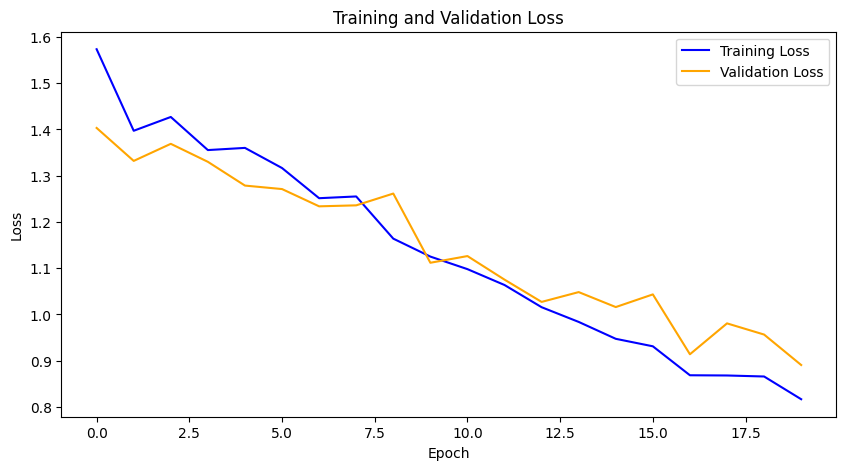

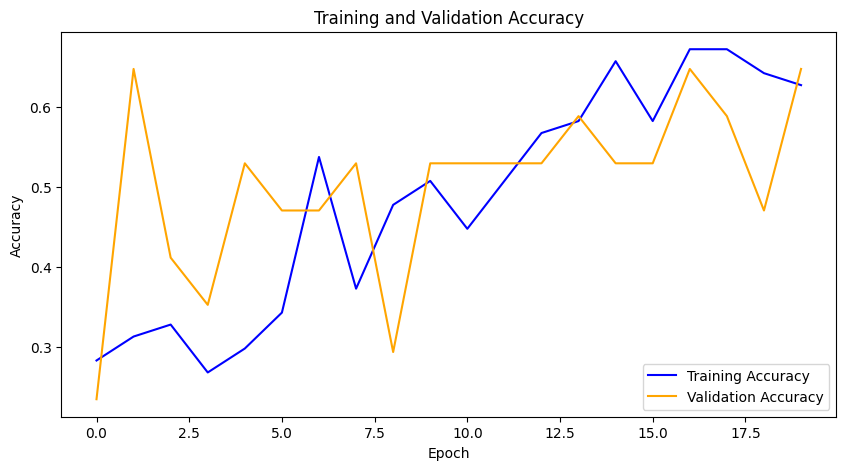

In [ ]:
import matplotlib.pyplot as plt

# Obtener las métricas de entrenamiento y validación del objeto history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plotear la pérdida
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotear la precisión
plt.figure(figsize=(10, 5))
plt.plot(train_acc, label='Training Accuracy', color='blue')
plt.plot(val_acc, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Evaluación del modelo
loss, accuracy = model.evaluate(X_val_rescaled, y_val)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

ResourceExhaustedError: Graph execution error:

Detected at node 'model/time_distributed/vgg16/block1_conv1/Relu' defined at (most recent call last):
    File "c:\Users\Alex\miniconda3\envs\py310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\Alex\miniconda3\envs\py310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
      app.launch_new_instance()
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
      app.start()
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\ipykernel\kernelapp.py", line 739, in start
      self.io_loop.start()
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\Alex\miniconda3\envs\py310\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "c:\Users\Alex\miniconda3\envs\py310\lib\asyncio\base_events.py", line 1909, in _run_once
      handle._run()
    File "c:\Users\Alex\miniconda3\envs\py310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue
      await self.process_one()
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\ipykernel\kernelbase.py", line 534, in process_one
      await dispatch(*args)
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell
      await result
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\ipykernel\ipkernel.py", line 359, in execute_request
      await super().execute_request(stream, ident, parent)
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\ipykernel\kernelbase.py", line 778, in execute_request
      reply_content = await reply_content
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\ipykernel\ipkernel.py", line 446, in do_execute
      res = shell.run_cell(
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell
      result = self._run_cell(
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell
      result = runner(coro)
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Alex\AppData\Local\Temp\ipykernel_10896\3344181482.py", line 2, in <module>
      loss, accuracy = model.evaluate(X_val, y_val)
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\keras\engine\training.py", line 1947, in evaluate
      tmp_logs = self.test_function(iterator)
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\keras\engine\training.py", line 1727, in test_function
      return step_function(self, iterator)
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\keras\engine\training.py", line 1713, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\keras\engine\training.py", line 1701, in run_step
      outputs = model.test_step(data)
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\keras\engine\training.py", line 1665, in test_step
      y_pred = self(x, training=False)
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\keras\layers\rnn\time_distributed.py", line 252, in call
      y = self.layer(inputs, **kwargs)
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\keras\layers\convolutional\base_conv.py", line 314, in call
      return self.activation(outputs)
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\keras\activations.py", line 317, in relu
      return backend.relu(
    File "c:\Users\Alex\miniconda3\envs\py310\lib\site-packages\keras\backend.py", line 5366, in relu
      x = tf.nn.relu(x)
Node: 'model/time_distributed/vgg16/block1_conv1/Relu'
OOM when allocating tensor with shape[408,64,224,224] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node model/time_distributed/vgg16/block1_conv1/Relu}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_test_function_12341]